In [3]:
from F1_library import libraryF1dataNotebook as libraryDataF1
import pandas as pd
import numpy as np
import fastf1 as ff1

# FORMULA 1 SINGAPORE AIRLINES SINGAPORE GRAND PRIX 2025
The Marina Bay Street Circuit (otherwise known as the Singapore Street Circuit) is a street circuit around Marina Bay, Singapore, encompassing the planning areas of Downtown Core (Turns 4 to 19) and Kallang (Turns 1 to 3).

It is the venue for the Singapore Grand Prix. The track is 4.940 km (3.070 mi) long in a harbourside location similar in style to the Circuit de Monaco and the Valencia Street Circuit.

The circuit was designed by KBR, and is a modification of the original one first proposed by Hermann Tilke. The circuit has a FIA Grade 1 license. The circuit holds a unique record of having at least one safety car appearance in every race to date. There has been a total of 24 safety car deployments in fourteen races.
Source: Wikipedia

## Obtain session information

In [4]:
libraryDataF1.obtain_information('sessions',year=2025,country_acronym='SGP')

meeting_key  session_key    location                 date_start  \
0         1270         9889  Marina Bay  2025-10-03T09:30:00+00:00   
1         1270         9890  Marina Bay  2025-10-03T13:00:00+00:00   
2         1270         9891  Marina Bay  2025-10-04T09:30:00+00:00   
3         1270         9892  Marina Bay  2025-10-04T13:00:00+00:00   

                    date_end session_type session_name  country_key  \
0  2025-10-03T10:30:00+00:00     Practice   Practice 1          157   
1  2025-10-03T14:00:00+00:00     Practice   Practice 2          157   
2  2025-10-04T10:30:00+00:00     Practice   Practice 3          157   
3  2025-10-04T14:00:00+00:00   Qualifying   Qualifying          157   

  country_code country_name  circuit_key circuit_short_name gmt_offset  year  
0          SGP    Singapore           61          Singapore   08:00:00  2025  
1          SGP    Singapore           61          Singapore   08:00:00  2025  
2          SGP    Singapore           61          Singapore   08:00:00  2025  
3          SGP    Singapore           61          Singapore   08:00:00  2025

core           INFO 	Loading data for Singapore Grand Prix - Practice 1 [v3.3.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	No cached data found for weather_data. Loading data...
_api           INFO 	Fetching weather data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for race_cont

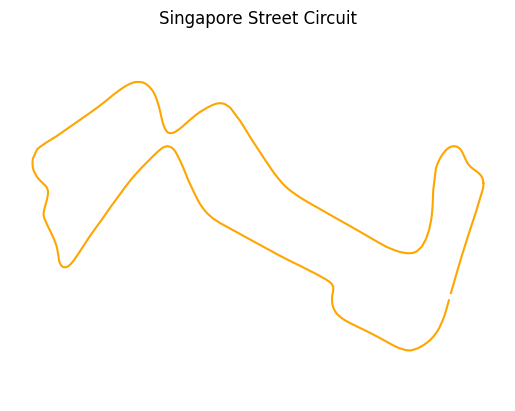

In [6]:
session = ff1.get_session(2025, 18, 'FP1')
session.load()

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

circuit_info = session.get_circuit_info()
libraryDataF1.draw_track(circuit_info,pos,"Singapore Street Circuit")

## Free Practice 1
### Obtain setup

In [7]:
practice = libraryDataF1.obtain_information('laps',session_key=9889)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9889)
drivers = libraryDataF1.obtain_information('drivers',session_key=9889)

In [8]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap

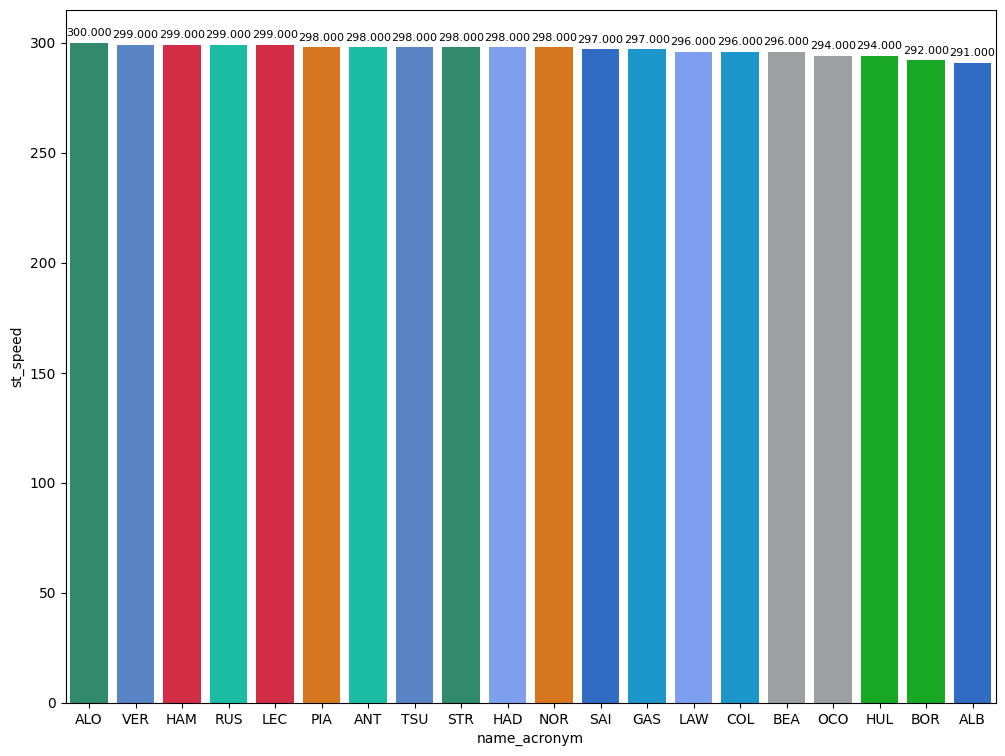

In [9]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

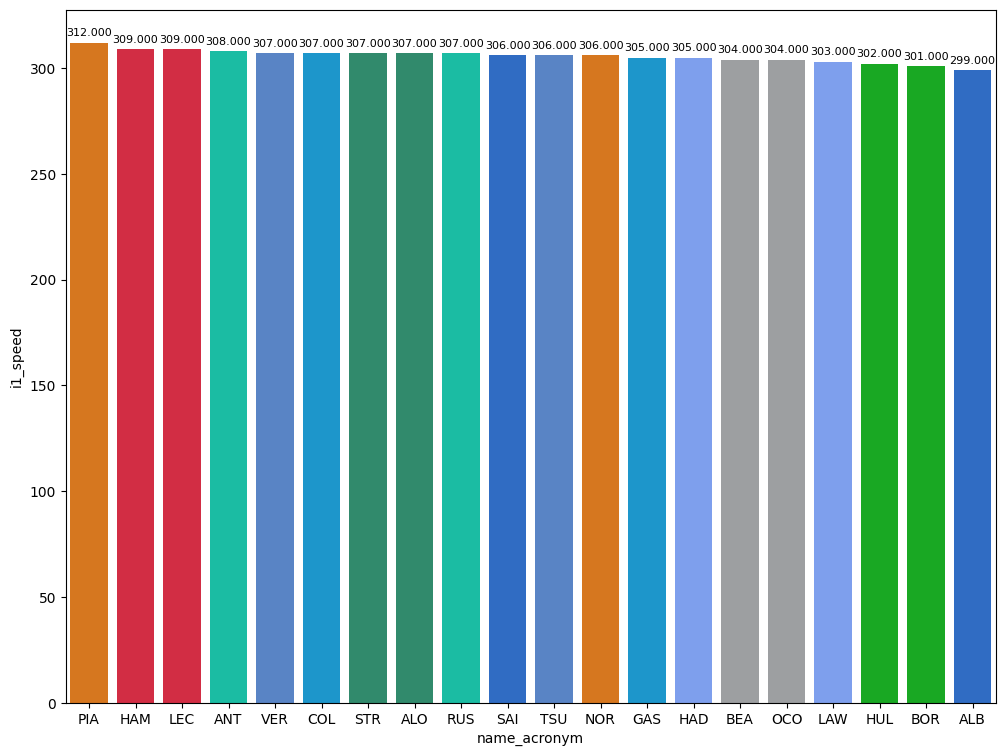

In [10]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

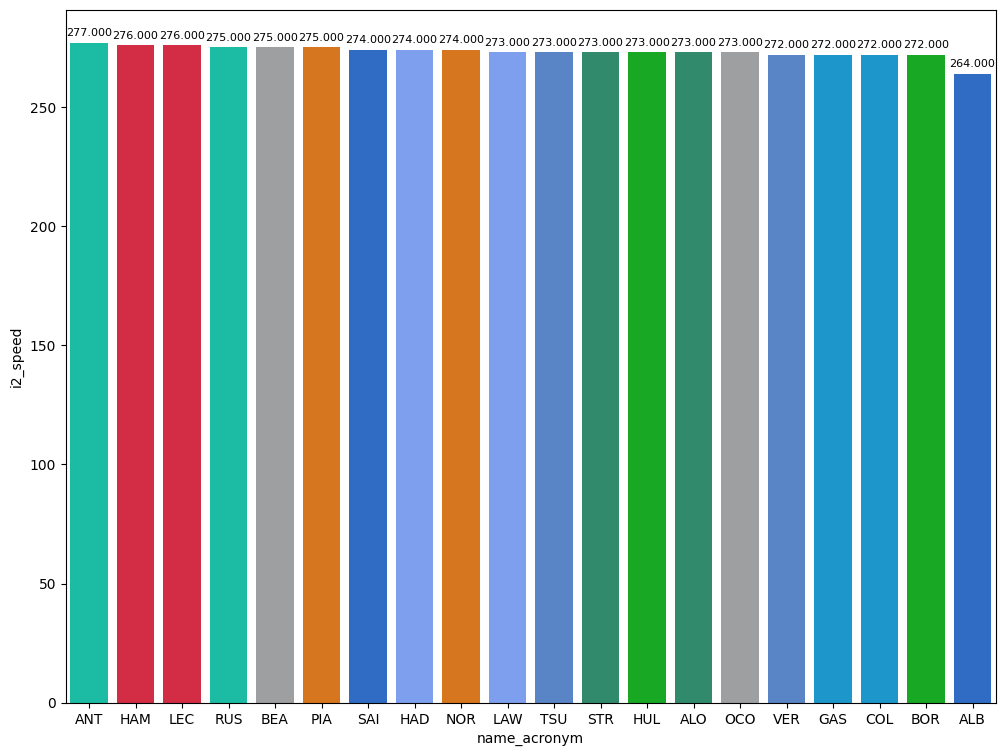

In [11]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [12]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

full_name compound  duration_sector_1  duration_sector_2  \
157     Lando NORRIS     HARD             27.421             38.926   
210     Carlos SAINZ   MEDIUM             27.326             38.495   
343  Fernando ALONSO     SOFT             27.042             38.247   

     duration_sector_3  lap_duration  
157             26.146        92.493  
210             25.991        91.812  
343             25.827        91.116

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session.

In [13]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


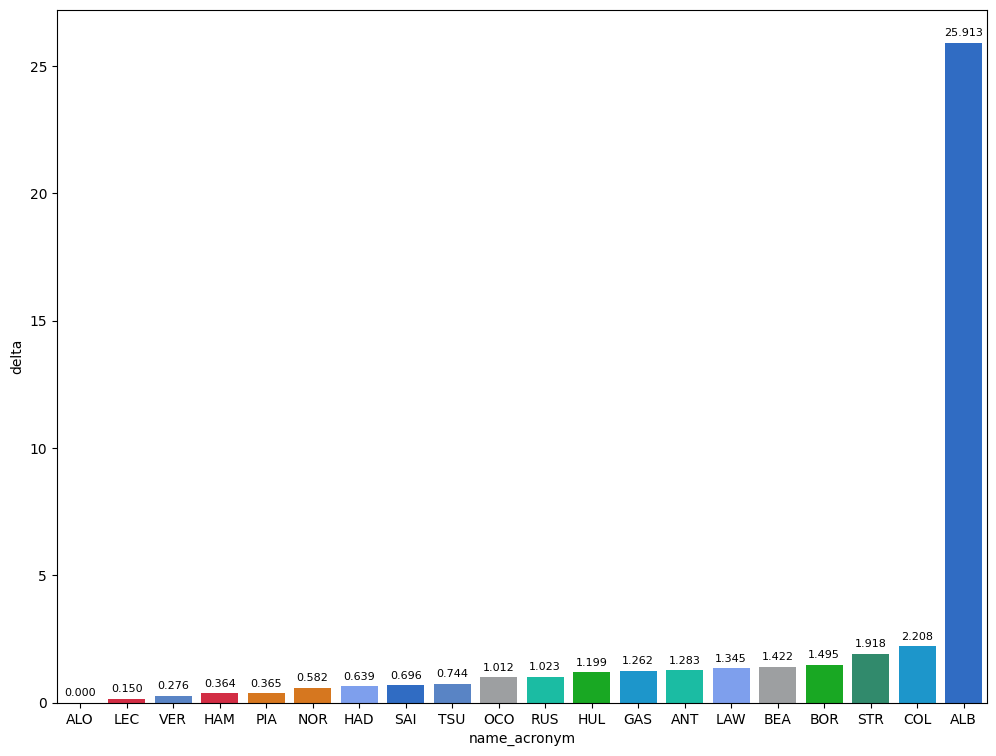

In [14]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.

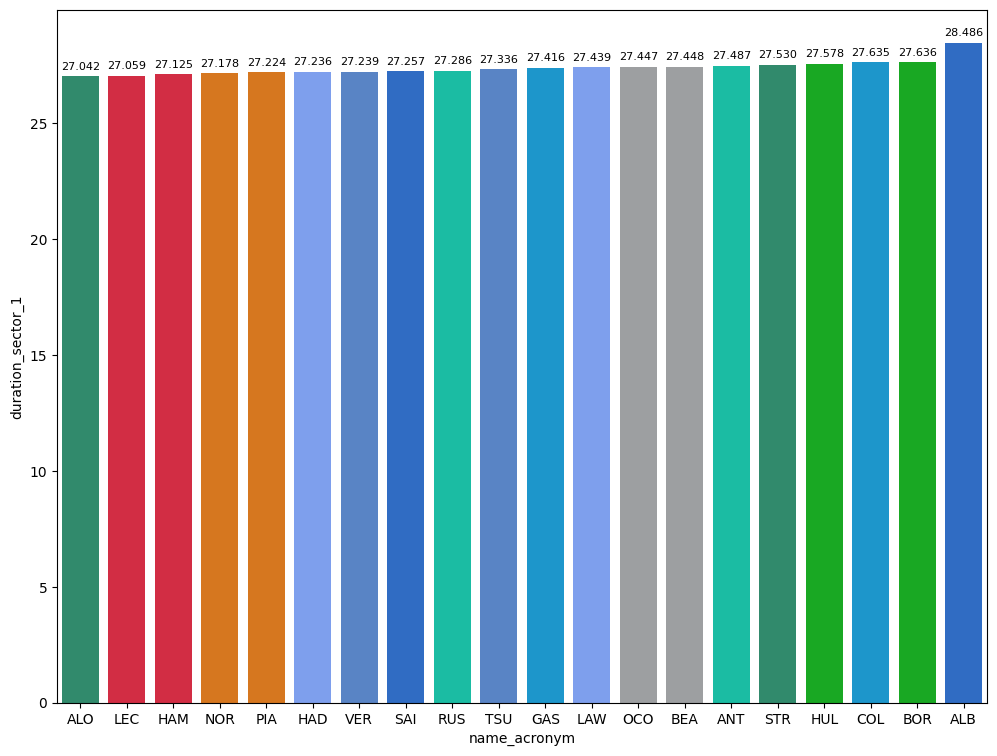

In [15]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin().dropna()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

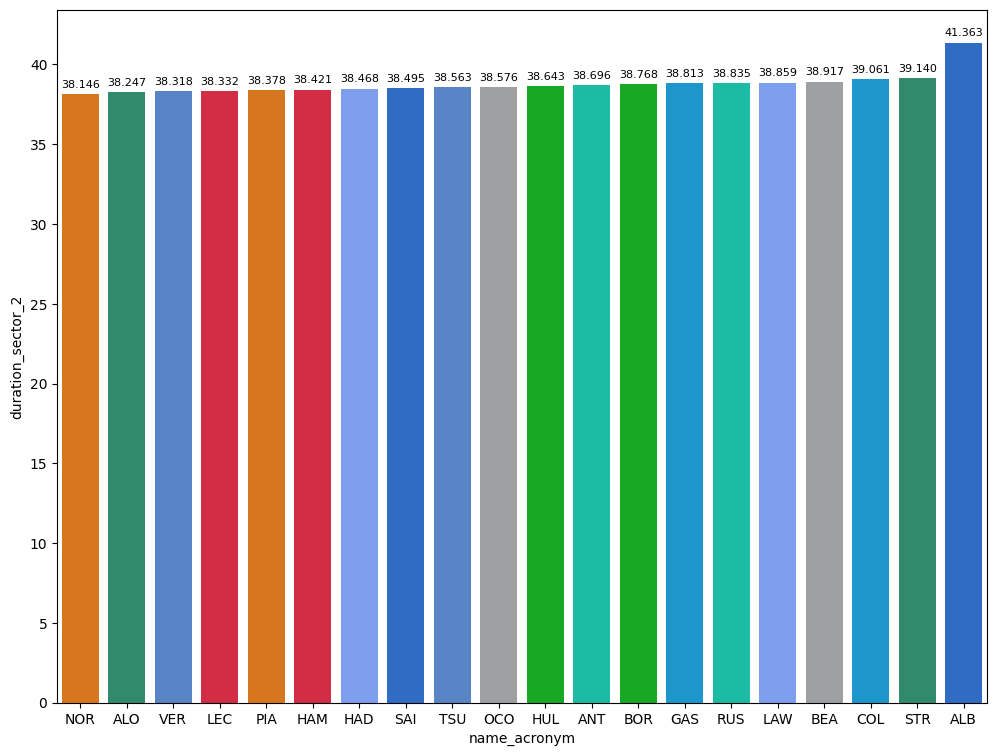

In [16]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin().dropna()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

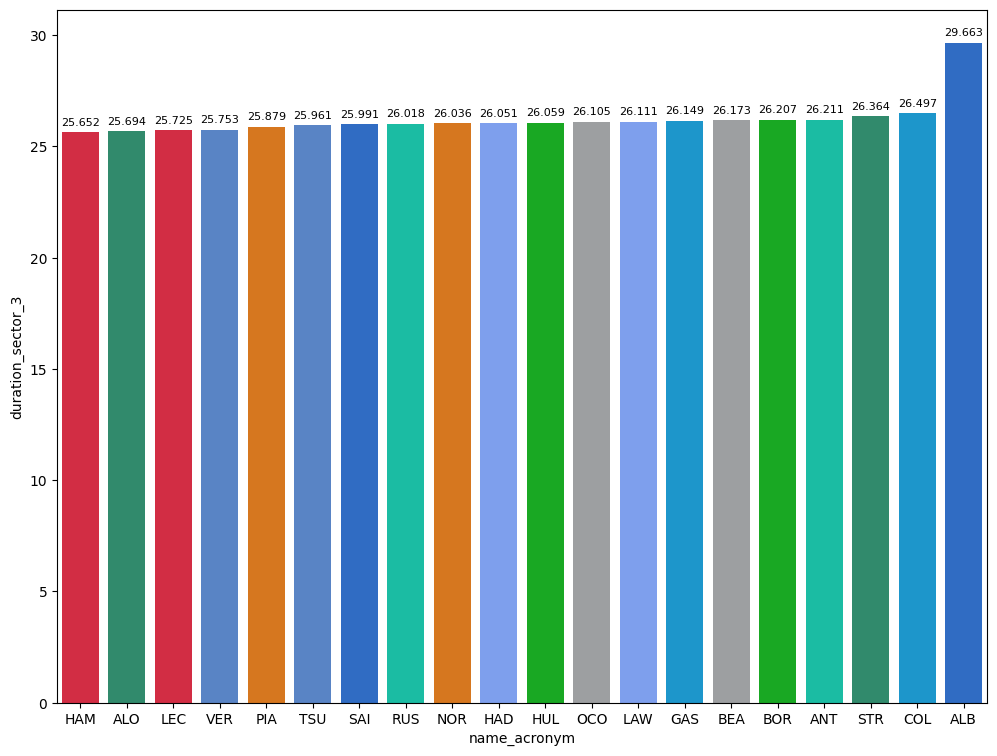

In [17]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin().dropna()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [18]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False and lap_duration > 96 and lap_duration <=99").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
compound              
HARD         97.074512
SOFT         97.192778
MEDIUM       97.390769

## Free Practice 2
### Obtain setup

In [19]:
practice = libraryDataF1.obtain_information('laps',session_key=9890)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9890)
drivers = libraryDataF1.obtain_information('drivers',session_key=9890)

In [20]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap

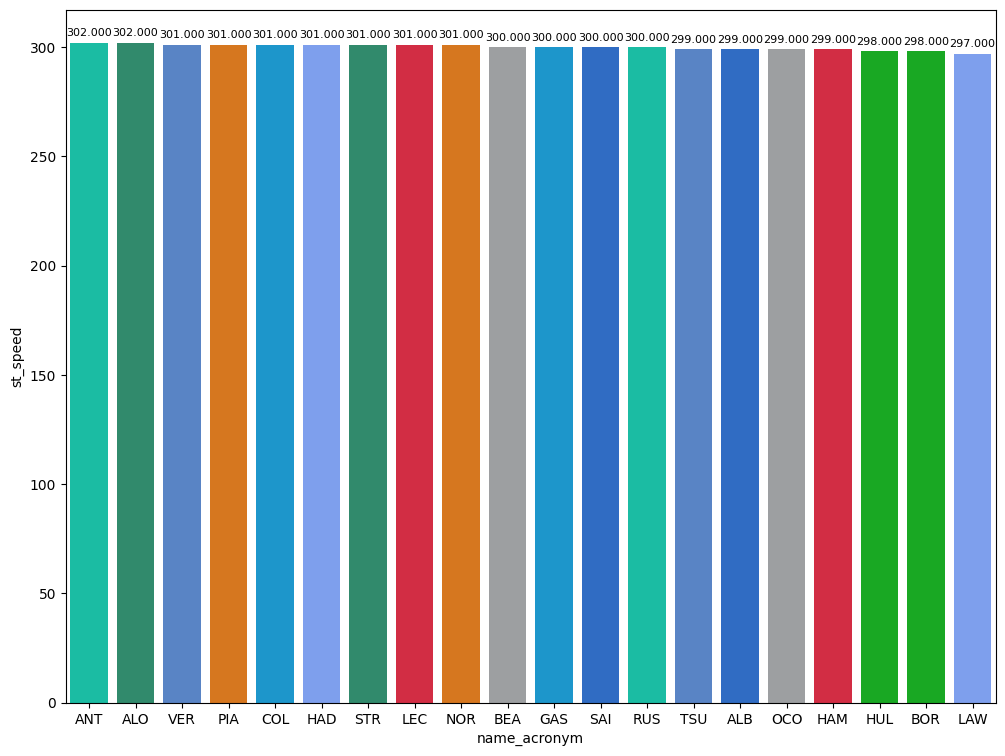

In [21]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

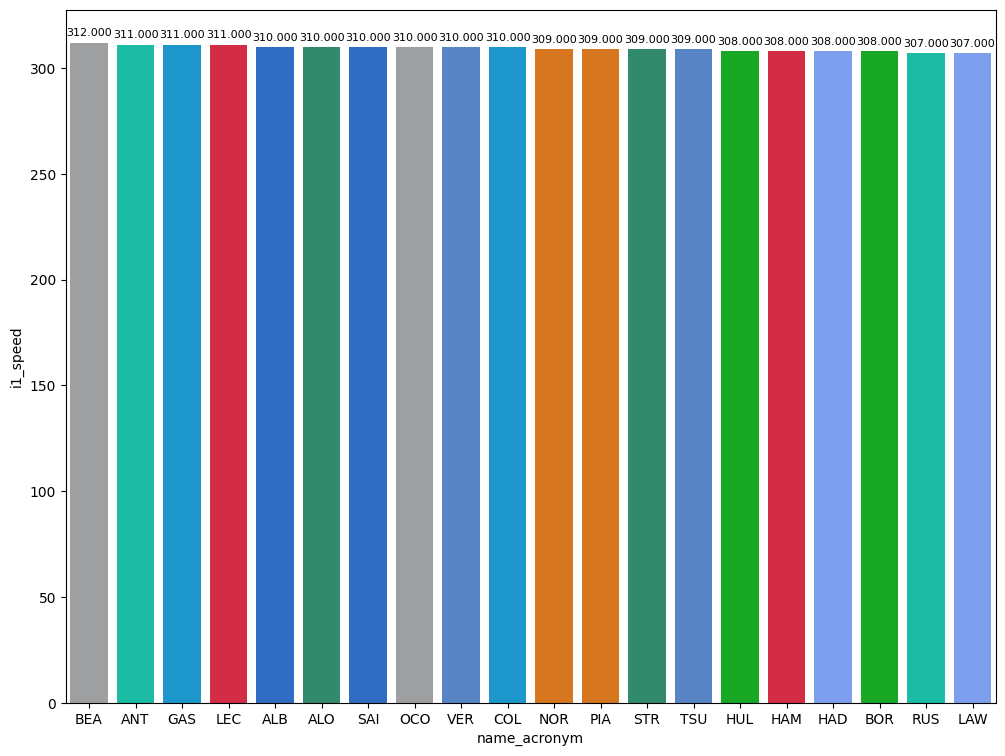

In [22]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

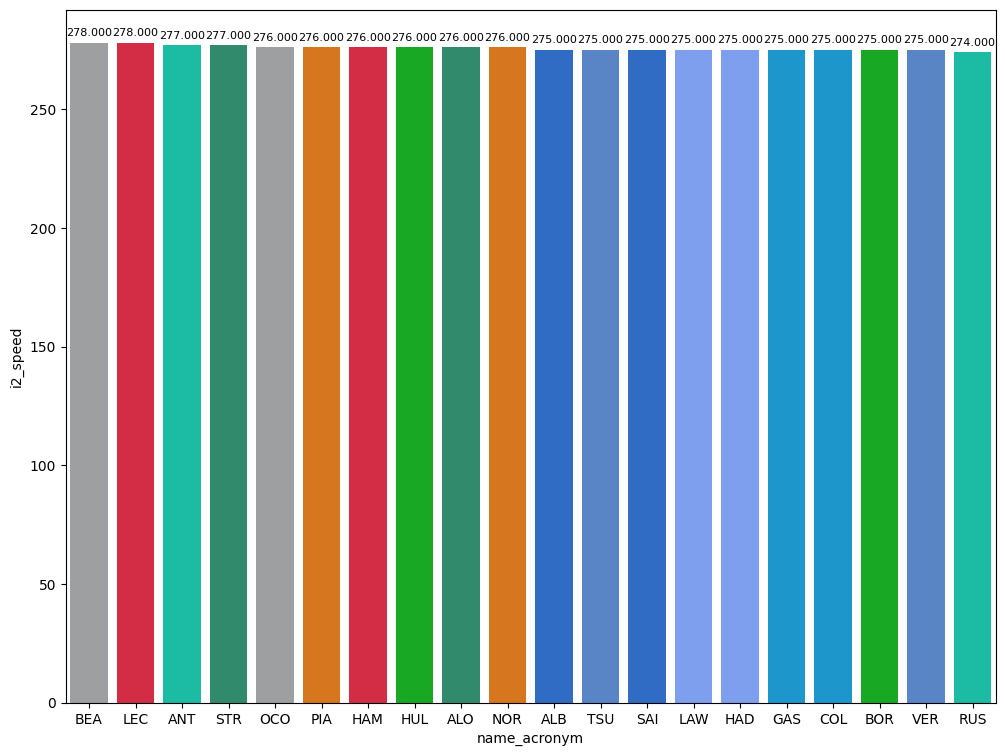

In [23]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [24]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

full_name compound  duration_sector_1  duration_sector_2  \
111  Fernando ALONSO     HARD             27.422             38.922   
166   Lewis HAMILTON   MEDIUM             27.046             38.581   
251    Oscar PIASTRI     SOFT             27.013             38.019   

     duration_sector_3  lap_duration  
111             25.909        92.253  
166             25.864        91.491  
251             25.682        90.714

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session.Due to changing conditions, only a part of the free practice were important and this part will be taken into consideration.

In [25]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


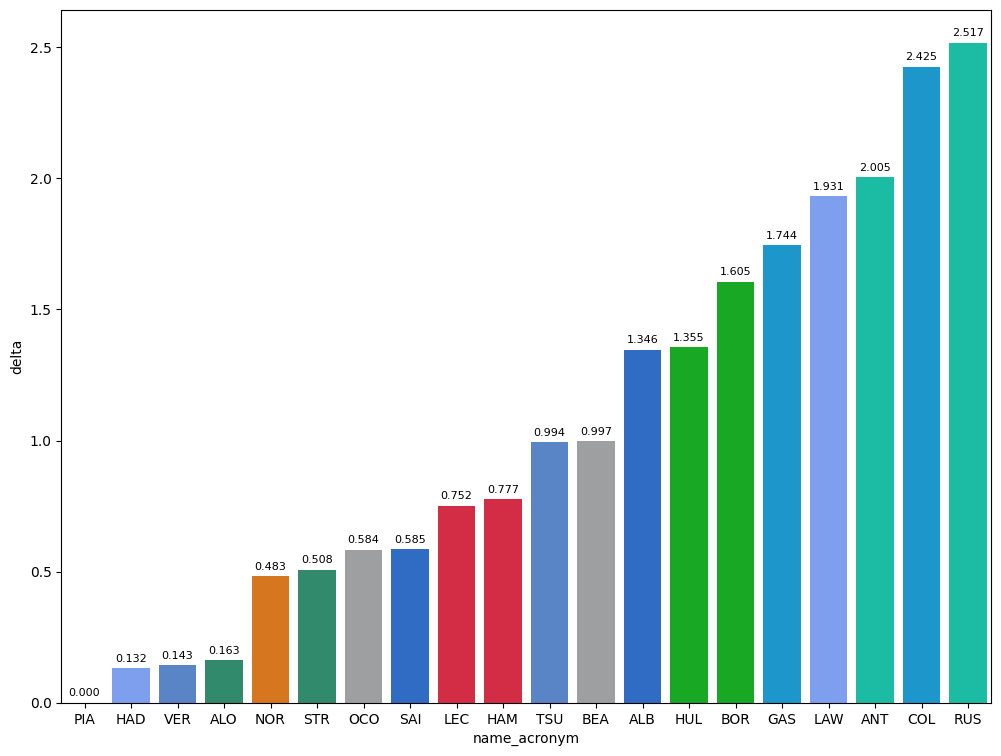

In [26]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.

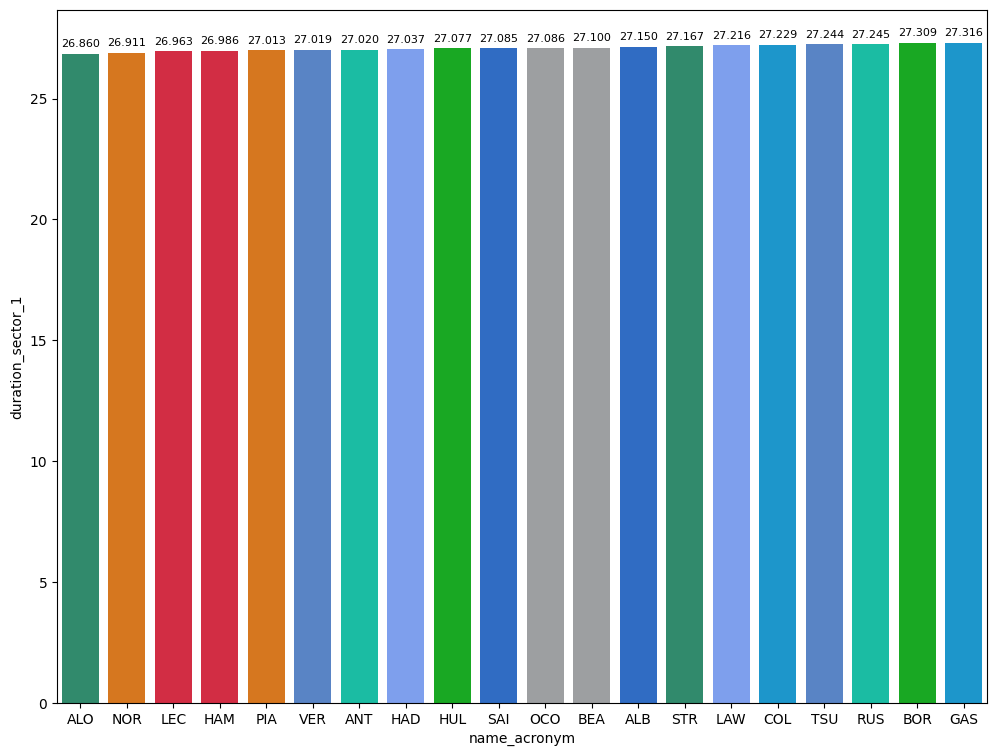

In [27]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin().dropna()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

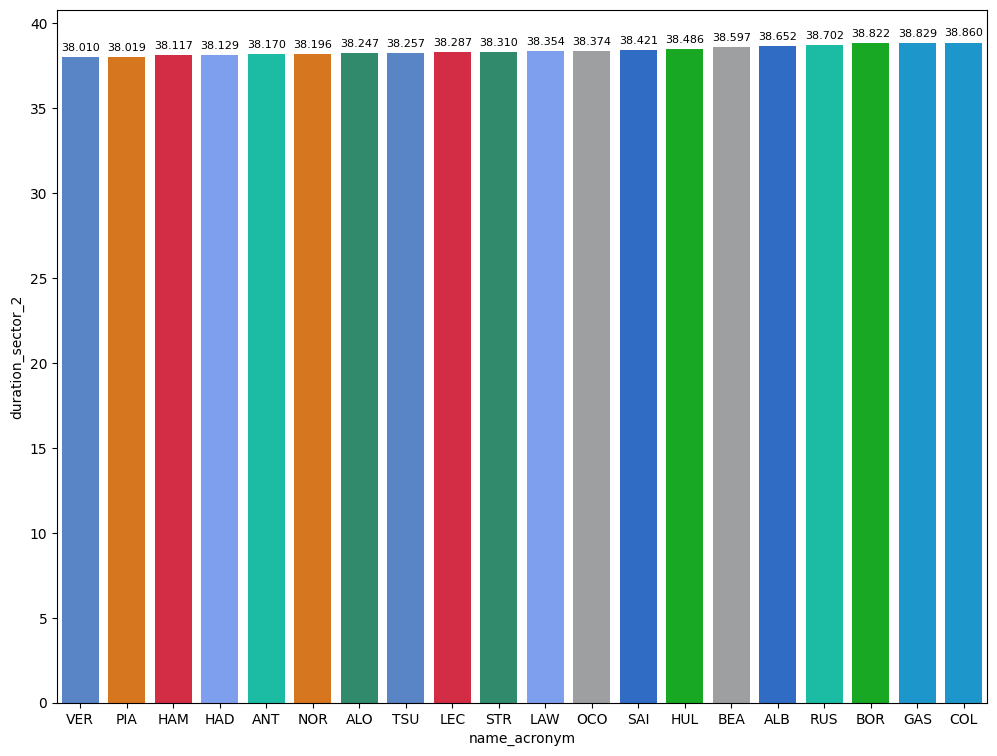

In [28]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin().dropna()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

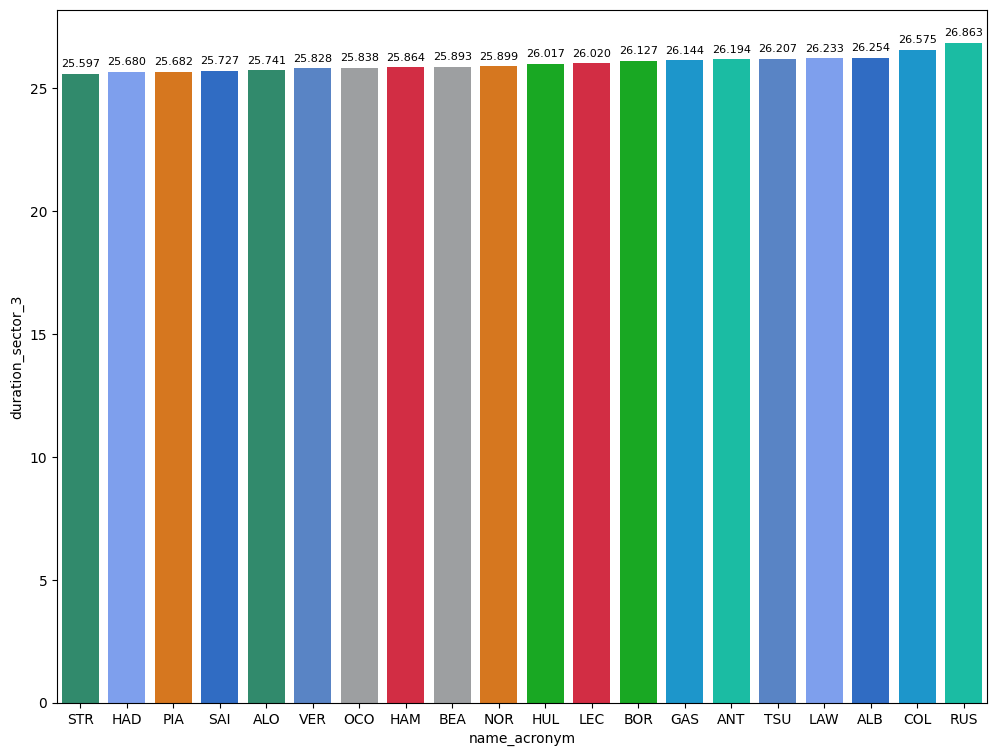

In [29]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin().dropna()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [30]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration>96.5 and lap_duration <=100.3").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
compound              
SOFT         97.410500
MEDIUM       97.814143

### Long runs

In [31]:
MINIMUN_SECONDS = 93
MAXIMUM_SECONDS = 96

#### Red Bull Racing

In [32]:
stintInformation.query('driver_number == 1 or driver_number == 22')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
4          1270         9890             1             22          1        5   
27         1270         9890             1              1          1        8   
29         1270         9890             2             22          6        8   
41         1270         9890             2              1          9       10   
46         1270         9890             3             22          9       10   
54         1270         9890             4             22         11       14   
62         1270         9890             5             22         15       18   
64         1270         9890             3              1         11       19   

   compound  tyre_age_at_start  
4    MEDIUM                  0  
27   MEDIUM                  0  
29   MEDIUM                  0  
41     SOFT                  0  
46     SOFT                  0  
54     SOFT                  2  
62   MEDIUM                  0  
64     SOFT                  2

In [33]:
data = libraryDataF1.getinfolongruns(jointables2,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
24   Max VERSTAPPEN   MEDIUM  2025-10-03T13:04:37.289000+00:00           2   
263  Max VERSTAPPEN     SOFT  2025-10-03T13:54:09.188000+00:00          14   
277  Max VERSTAPPEN     SOFT  2025-10-03T13:55:44.266000+00:00          15   
290  Max VERSTAPPEN     SOFT  2025-10-03T13:57:18.585000+00:00          16   
306  Max VERSTAPPEN     SOFT  2025-10-03T13:58:52.905000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
24              27.630             39.119             26.379        93.128  
263             28.295             39.939             26.848        95.082  
277             28.077             39.492             26.766        94.335  
290             27.986             39.798             26.482        94.266  
306             27.888             39.198             26.534        93.620

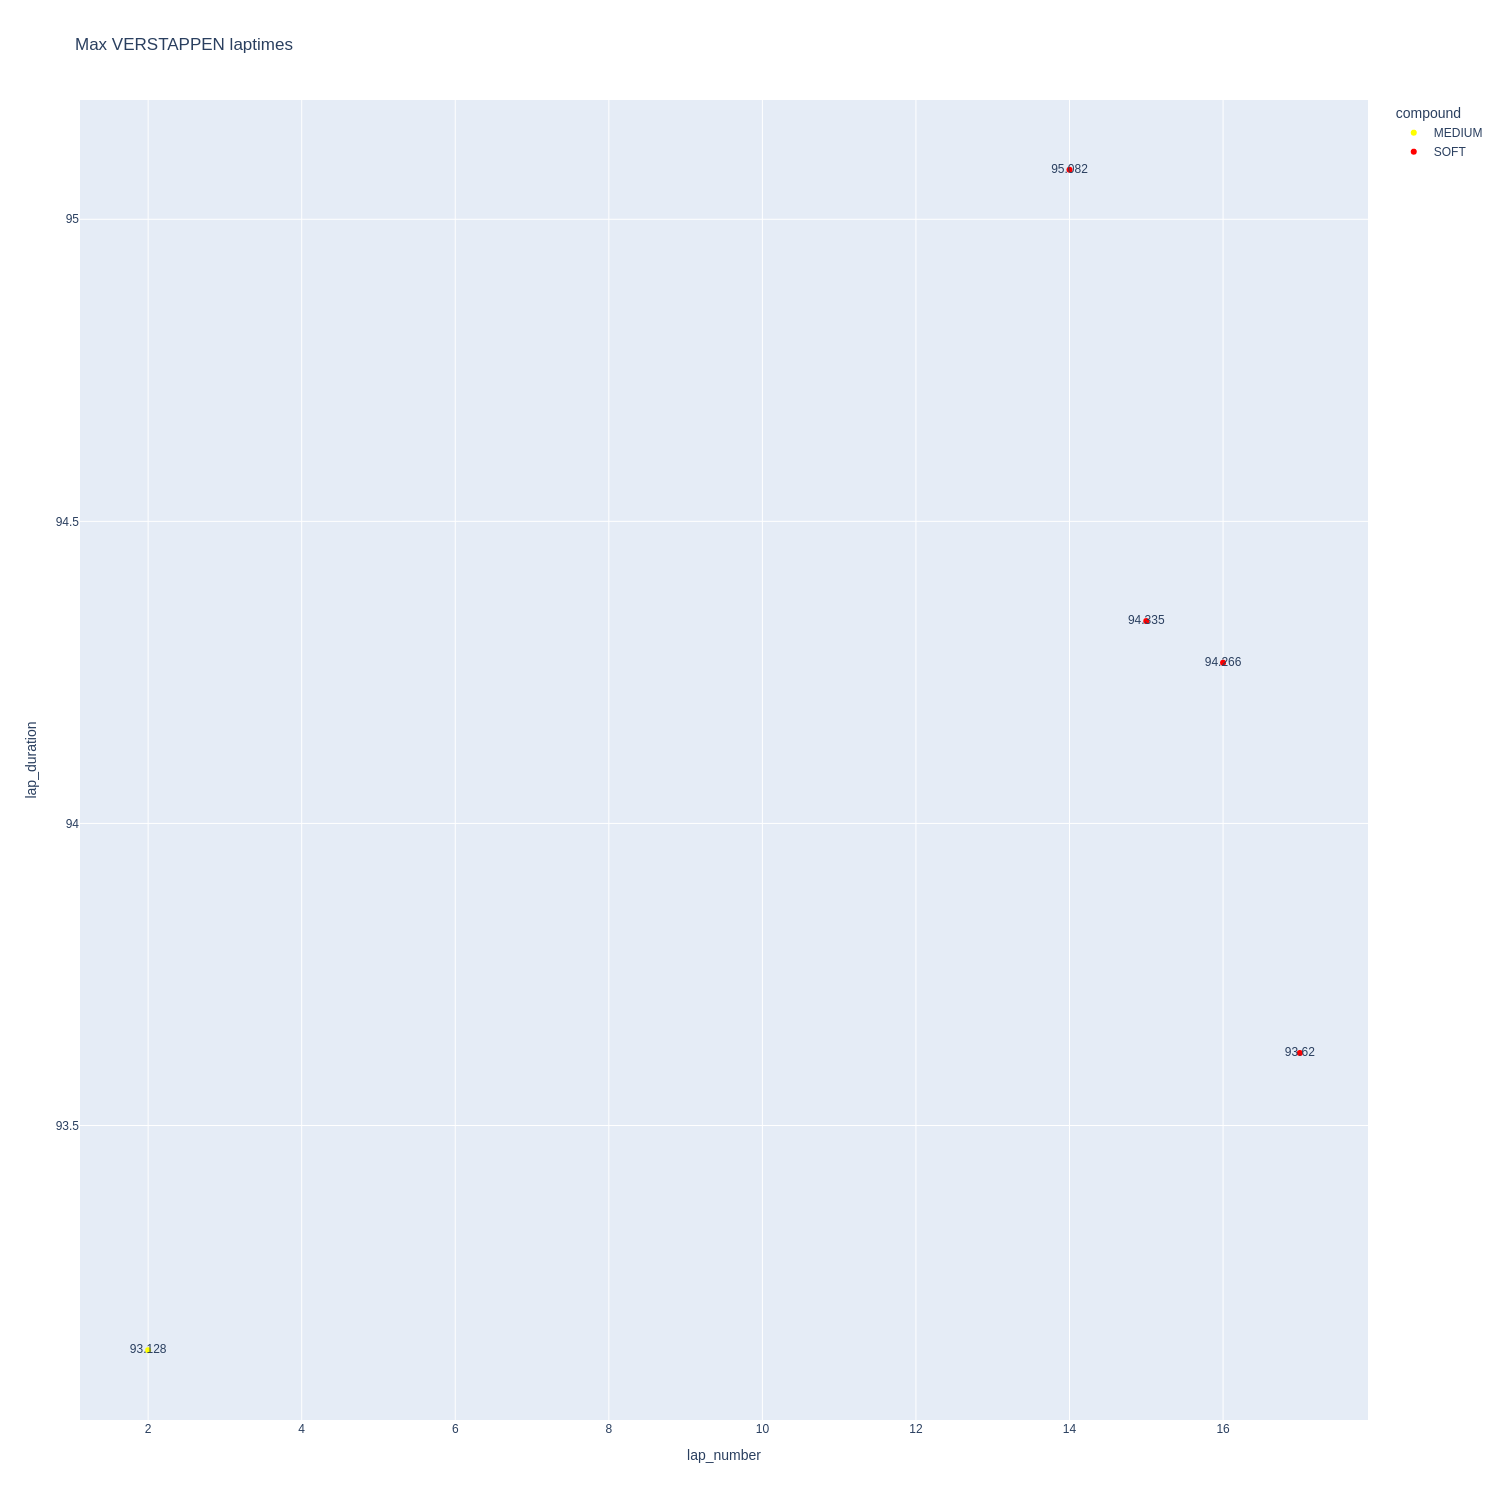

In [34]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

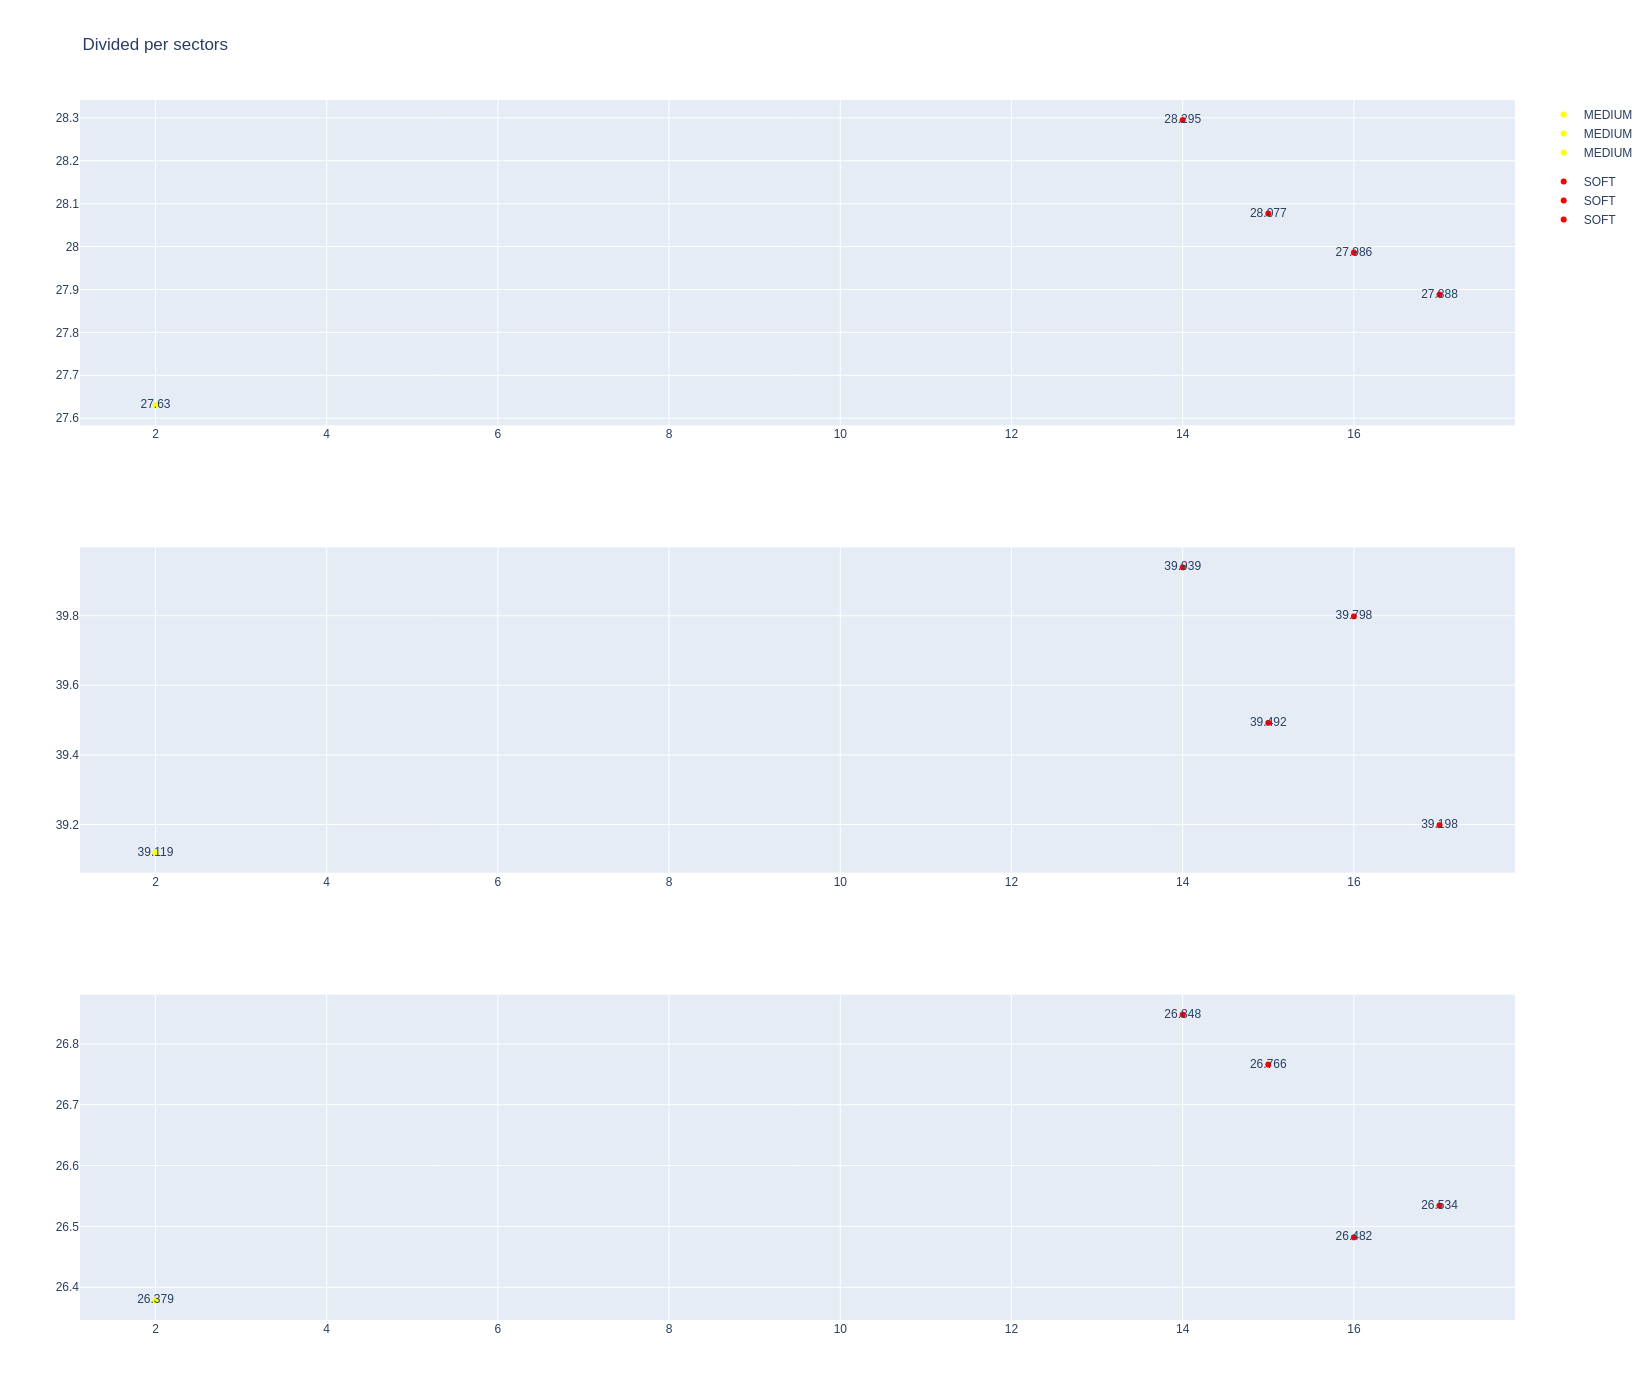

In [35]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [36]:
data = libraryDataF1.getinfolongruns(jointables2,22,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
34   Yuki TSUNODA   MEDIUM  2025-10-03T13:05:42.129000+00:00           2   
75   Yuki TSUNODA   MEDIUM  2025-10-03T13:09:53.936000+00:00           4   
307  Yuki TSUNODA   MEDIUM  2025-10-03T13:58:56.654000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
34              27.928             39.481             26.719        94.128  
75              27.671             39.152             26.310        93.133  
307             28.565             40.323             26.818        95.706

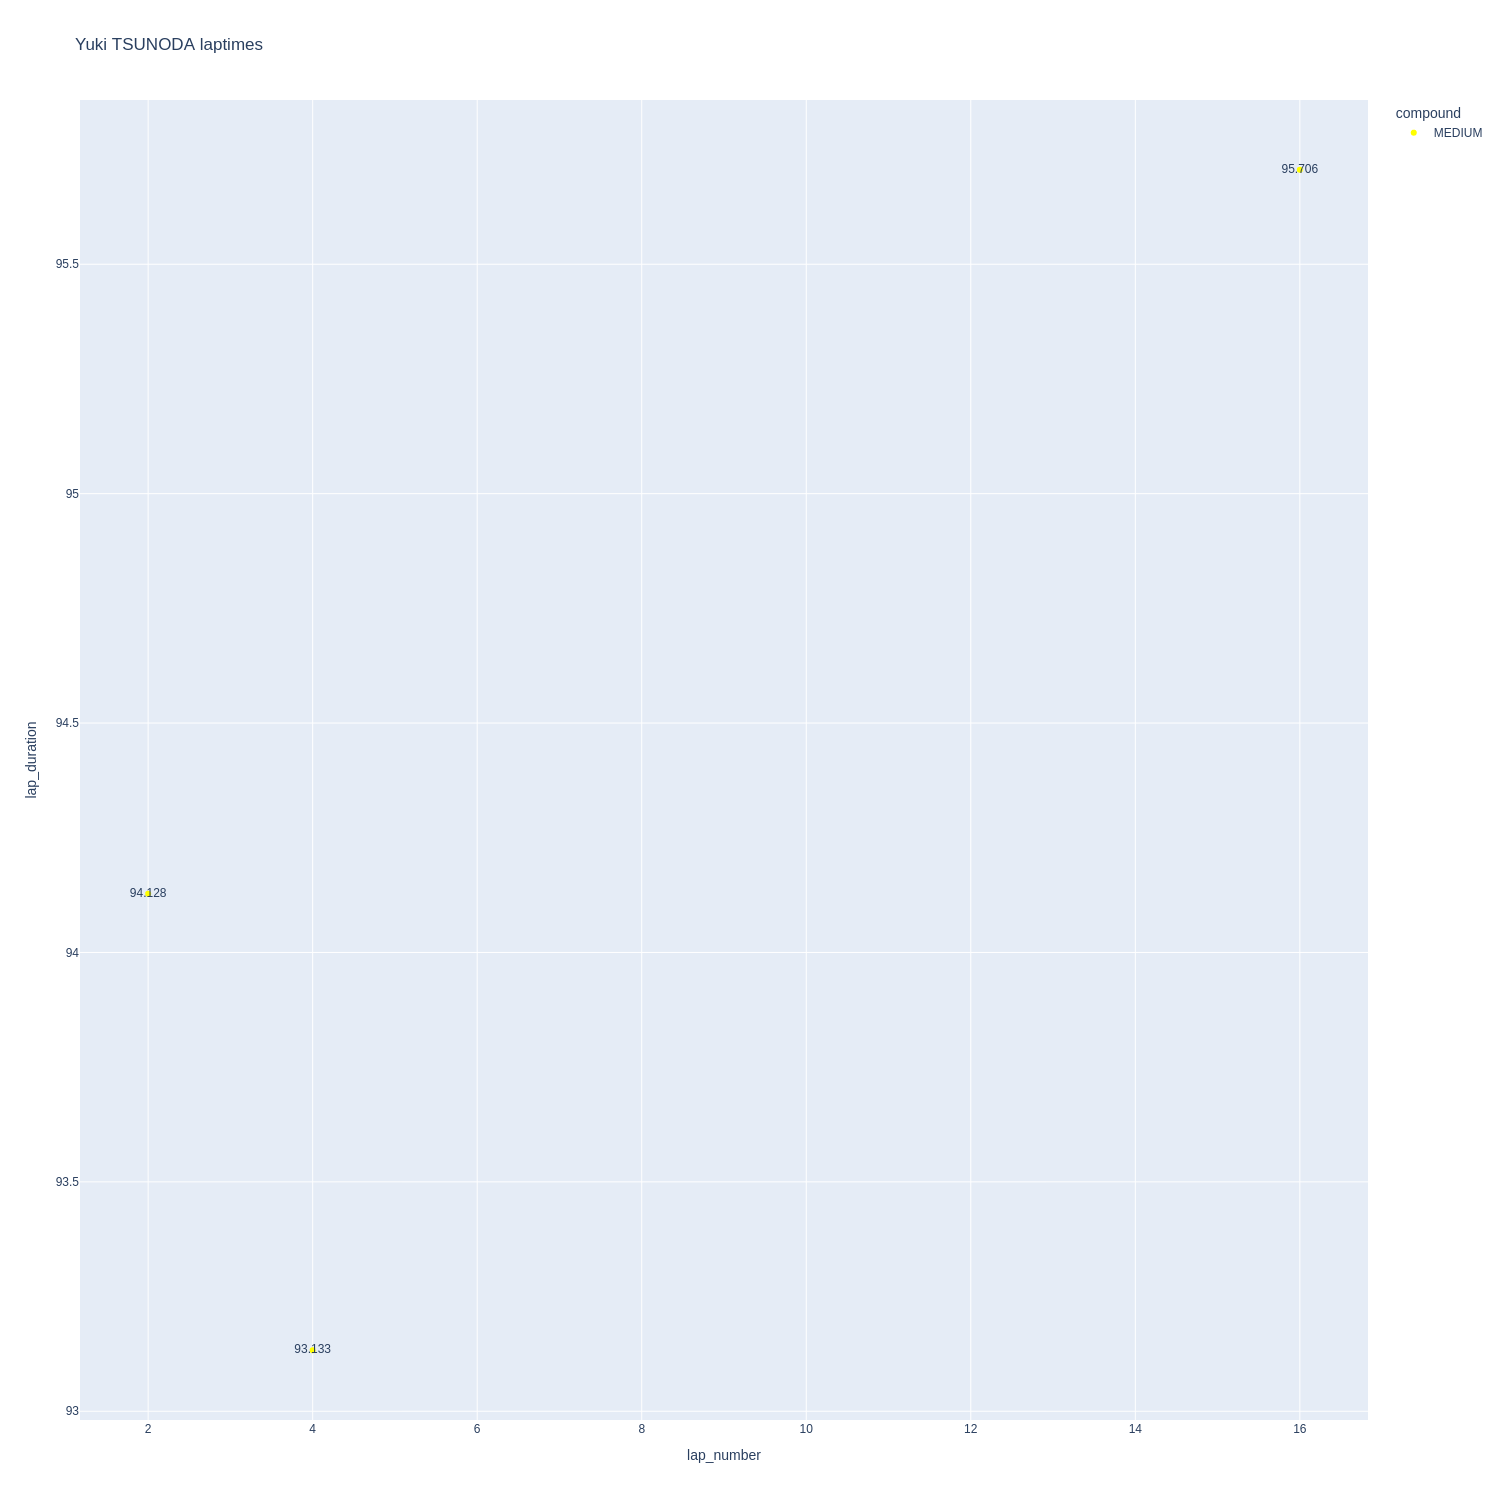

In [37]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

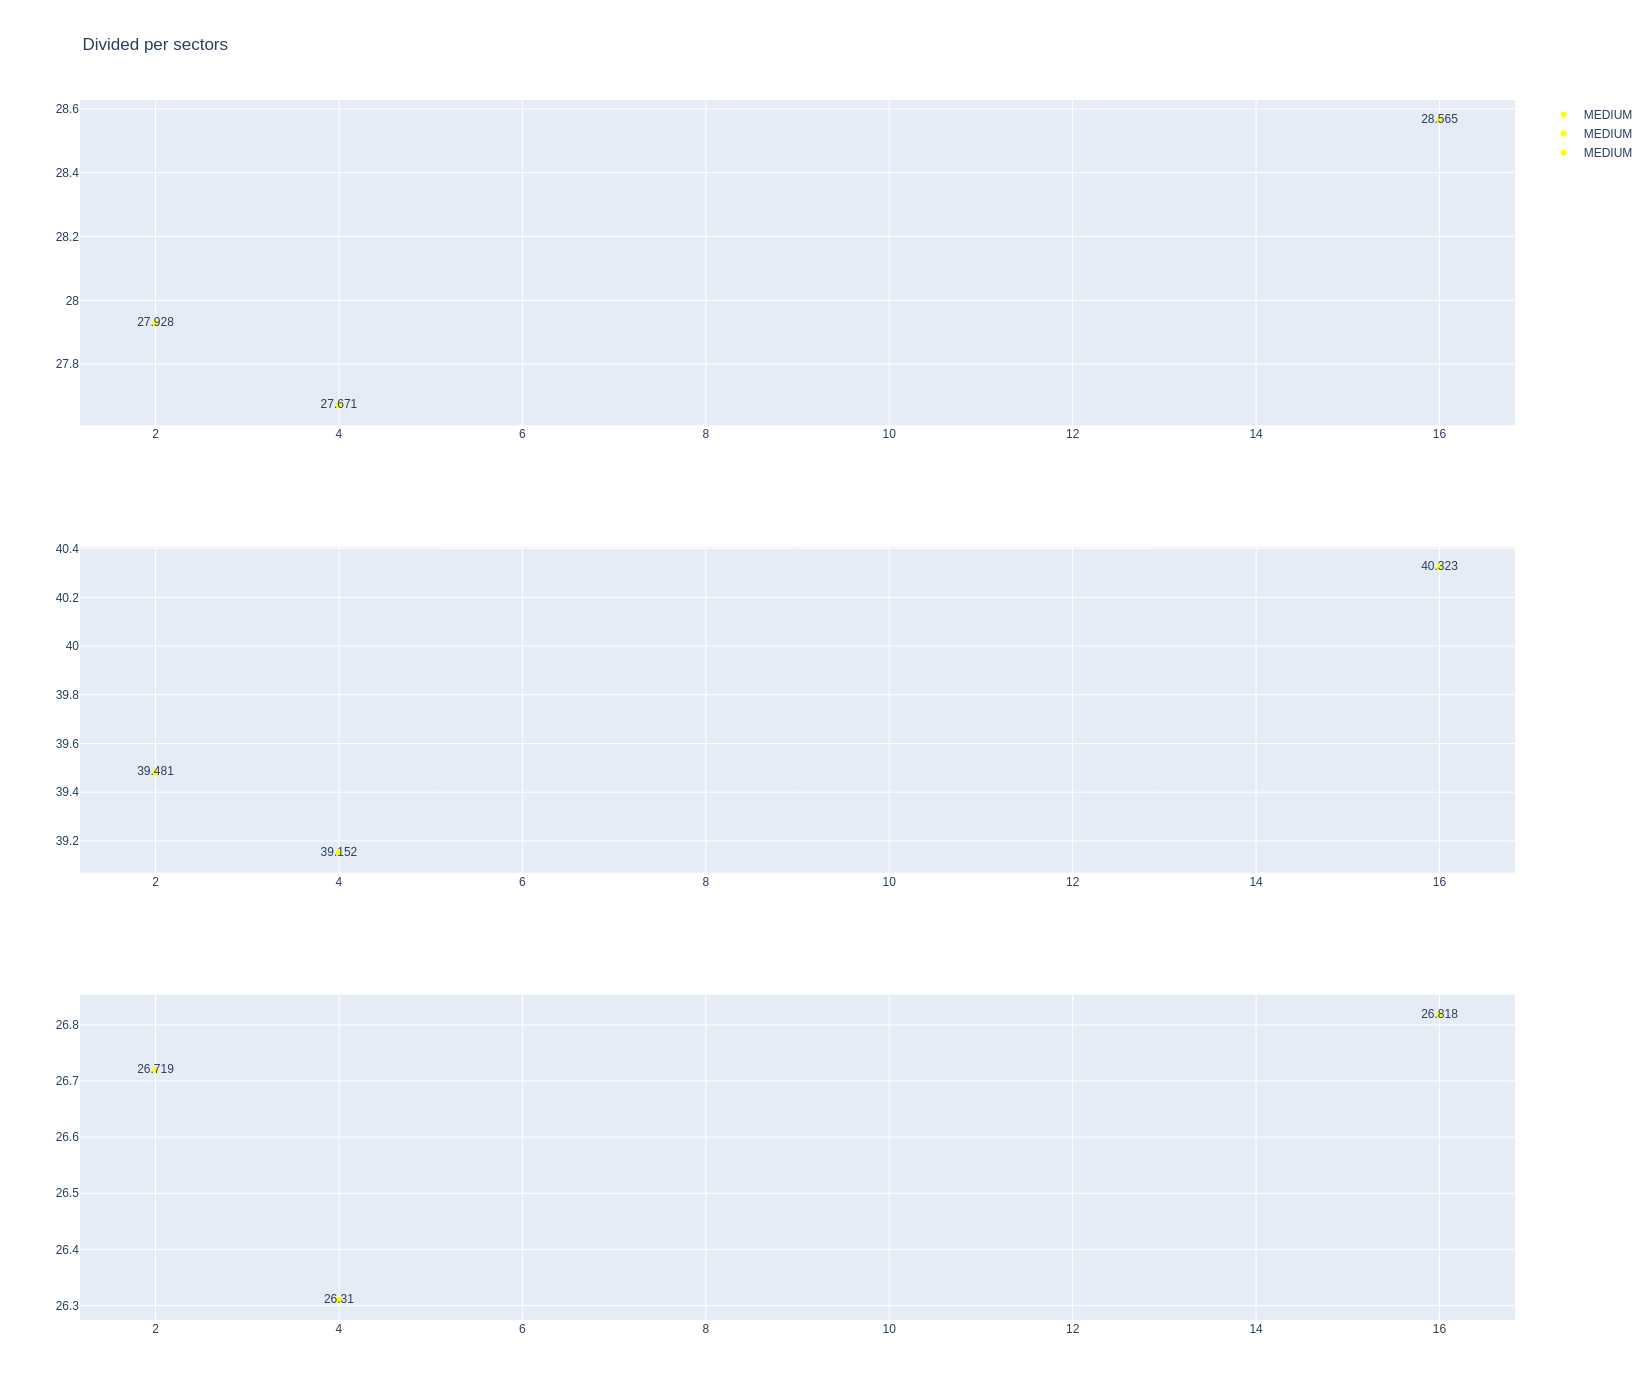

In [38]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [39]:
stintInformation.query('driver_number == 44 or driver_number == 16')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
3          1270         9890             1             44          1        4   
8          1270         9890             1             16          1        6   
11         1270         9890             2             16          7        7   
12         1270         9890             2             44          5        7   
44         1270         9890             3             16          8       10   
47         1270         9890             3             44          8       10   
52         1270         9890             4             44         11       12   
53         1270         9890             4             16         11       13   
56         1270         9890             5             44         13       17   
72         1270         9890             5             16         14       18   

   compound  tyre_age_at_start  
3    MEDIUM                  0  
8    MEDIUM                  0  
11   MEDIUM                  6  
12   MEDIUM                  4  
44   MEDIUM                  7  
47   MEDIUM                  7  
52     SOFT                  0  
53     SOFT                  0  
56     SOFT                  2  
72     SOFT                  0

In [40]:
data = libraryDataF1.getinfolongruns(jointables2,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
45  Charles LECLERC   MEDIUM  2025-10-03T13:06:25.784000+00:00           2   

    duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
45             27.675             39.238              26.29        93.203

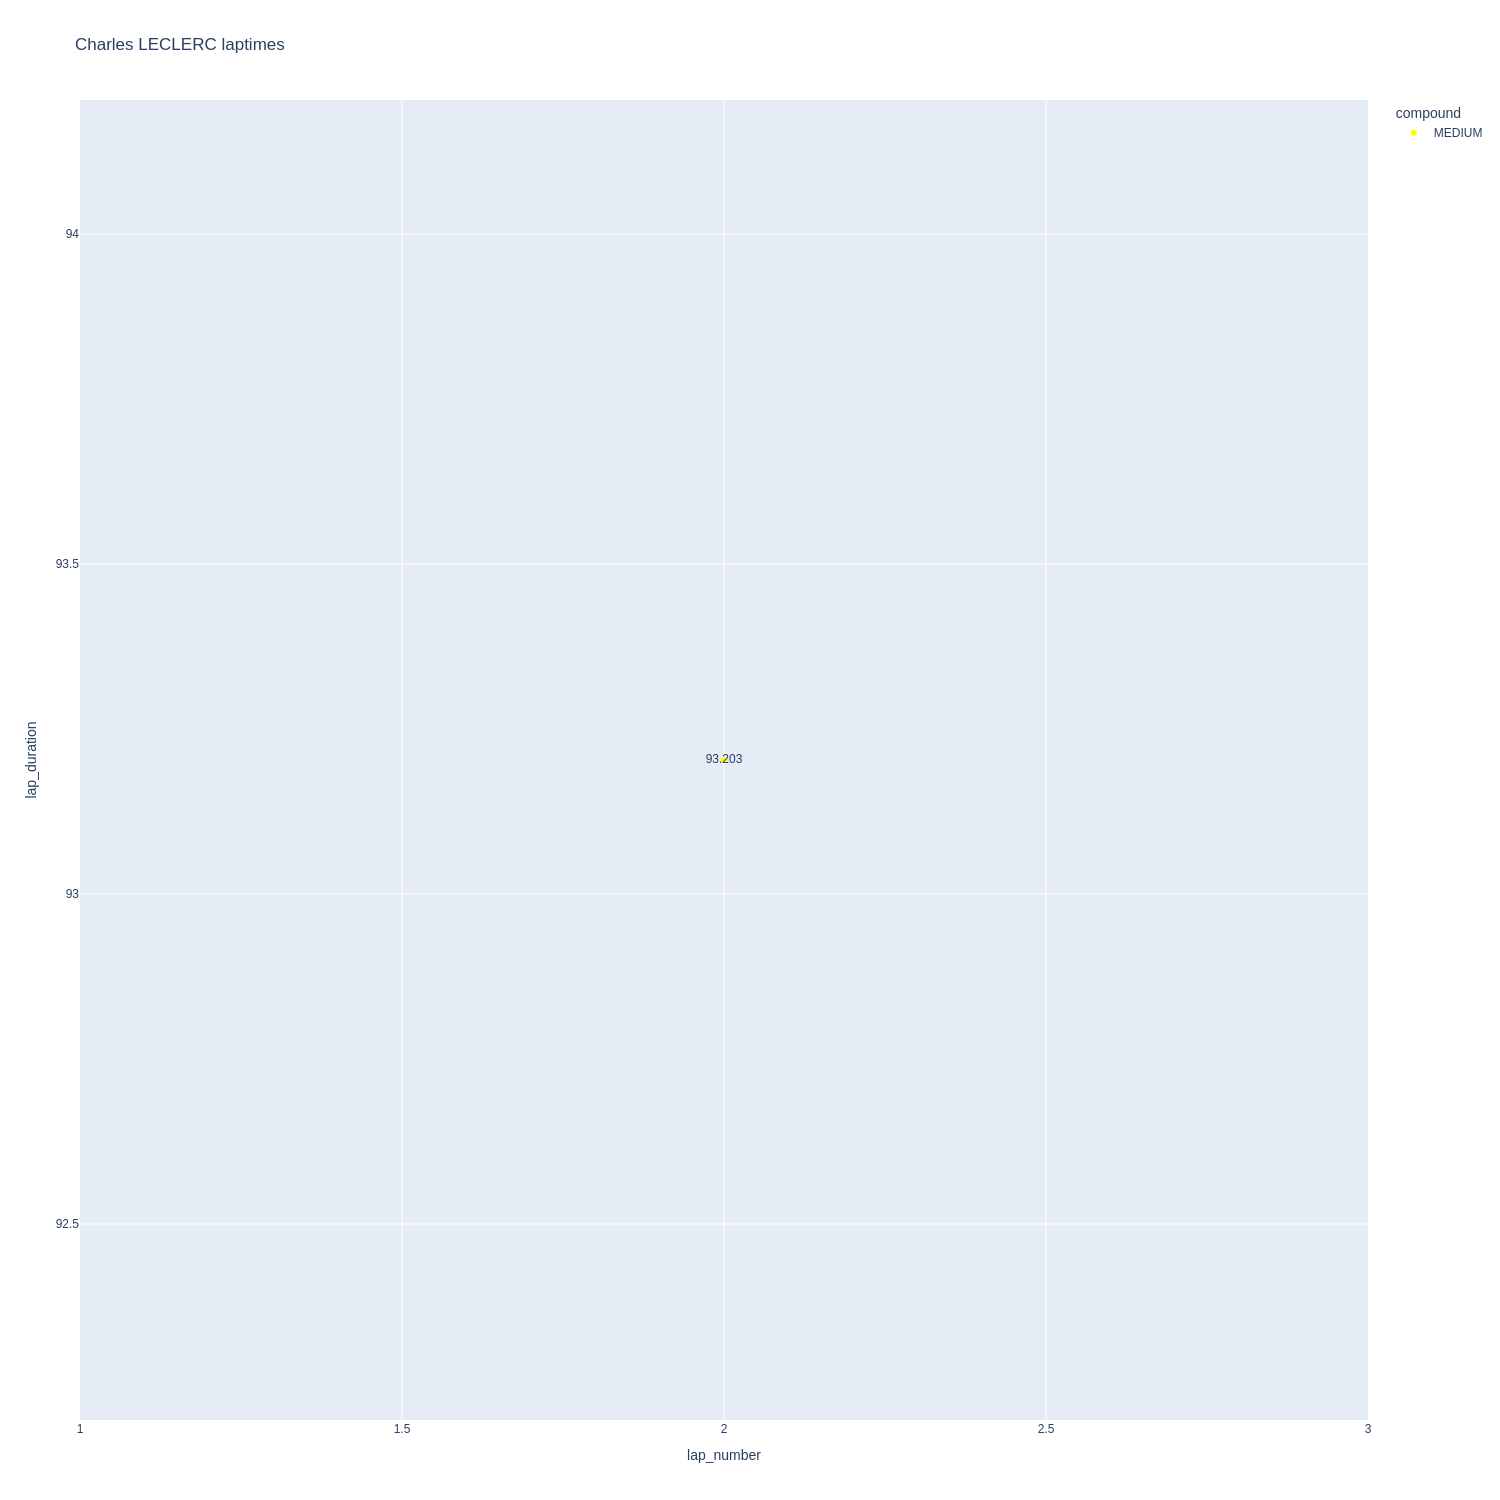

In [41]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

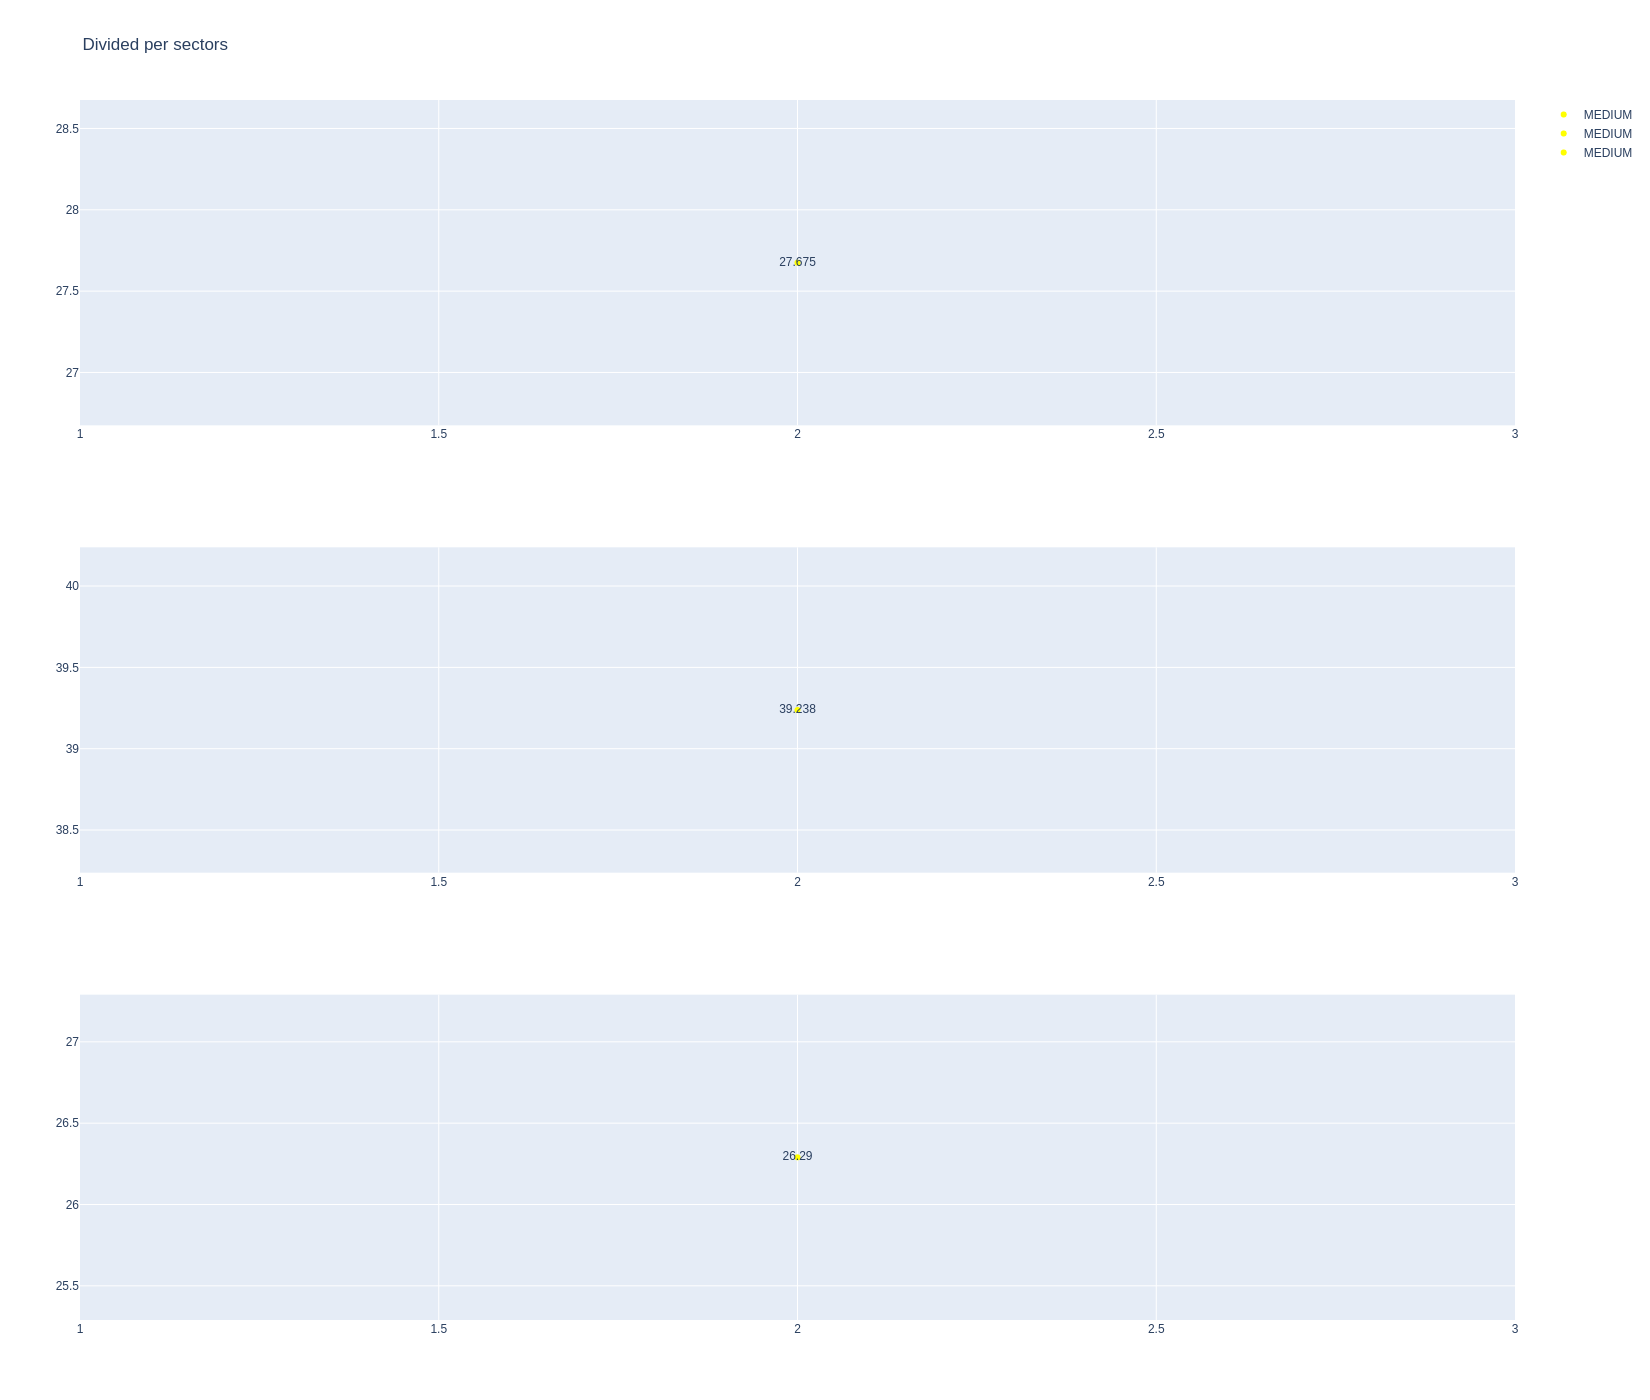

In [42]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [43]:
data = libraryDataF1.getinfolongruns(jointables2,44,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [44]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [45]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [46]:
stintInformation.query('driver_number == 63 or driver_number == 12')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
2          1270         9890             1             12          1        4   
7          1270         9890             1             63          1        6   
22         1270         9890             2             12          5        7   
40         1270         9890             3             12          8        9   
57         1270         9890             4             12         10       18   

   compound  tyre_age_at_start  
2    MEDIUM                  0  
7    MEDIUM                  0  
22   MEDIUM                  4  
40     SOFT                  0  
57   MEDIUM                  7

In [47]:
data = libraryDataF1.getinfolongruns(jointables2,12,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [48]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [49]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [50]:
data = libraryDataF1.getinfolongruns(jointables2,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
74  George RUSSELL   MEDIUM  2025-10-03T13:09:44.858000+00:00           3   

    duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
74             27.523             38.845             26.863        93.231

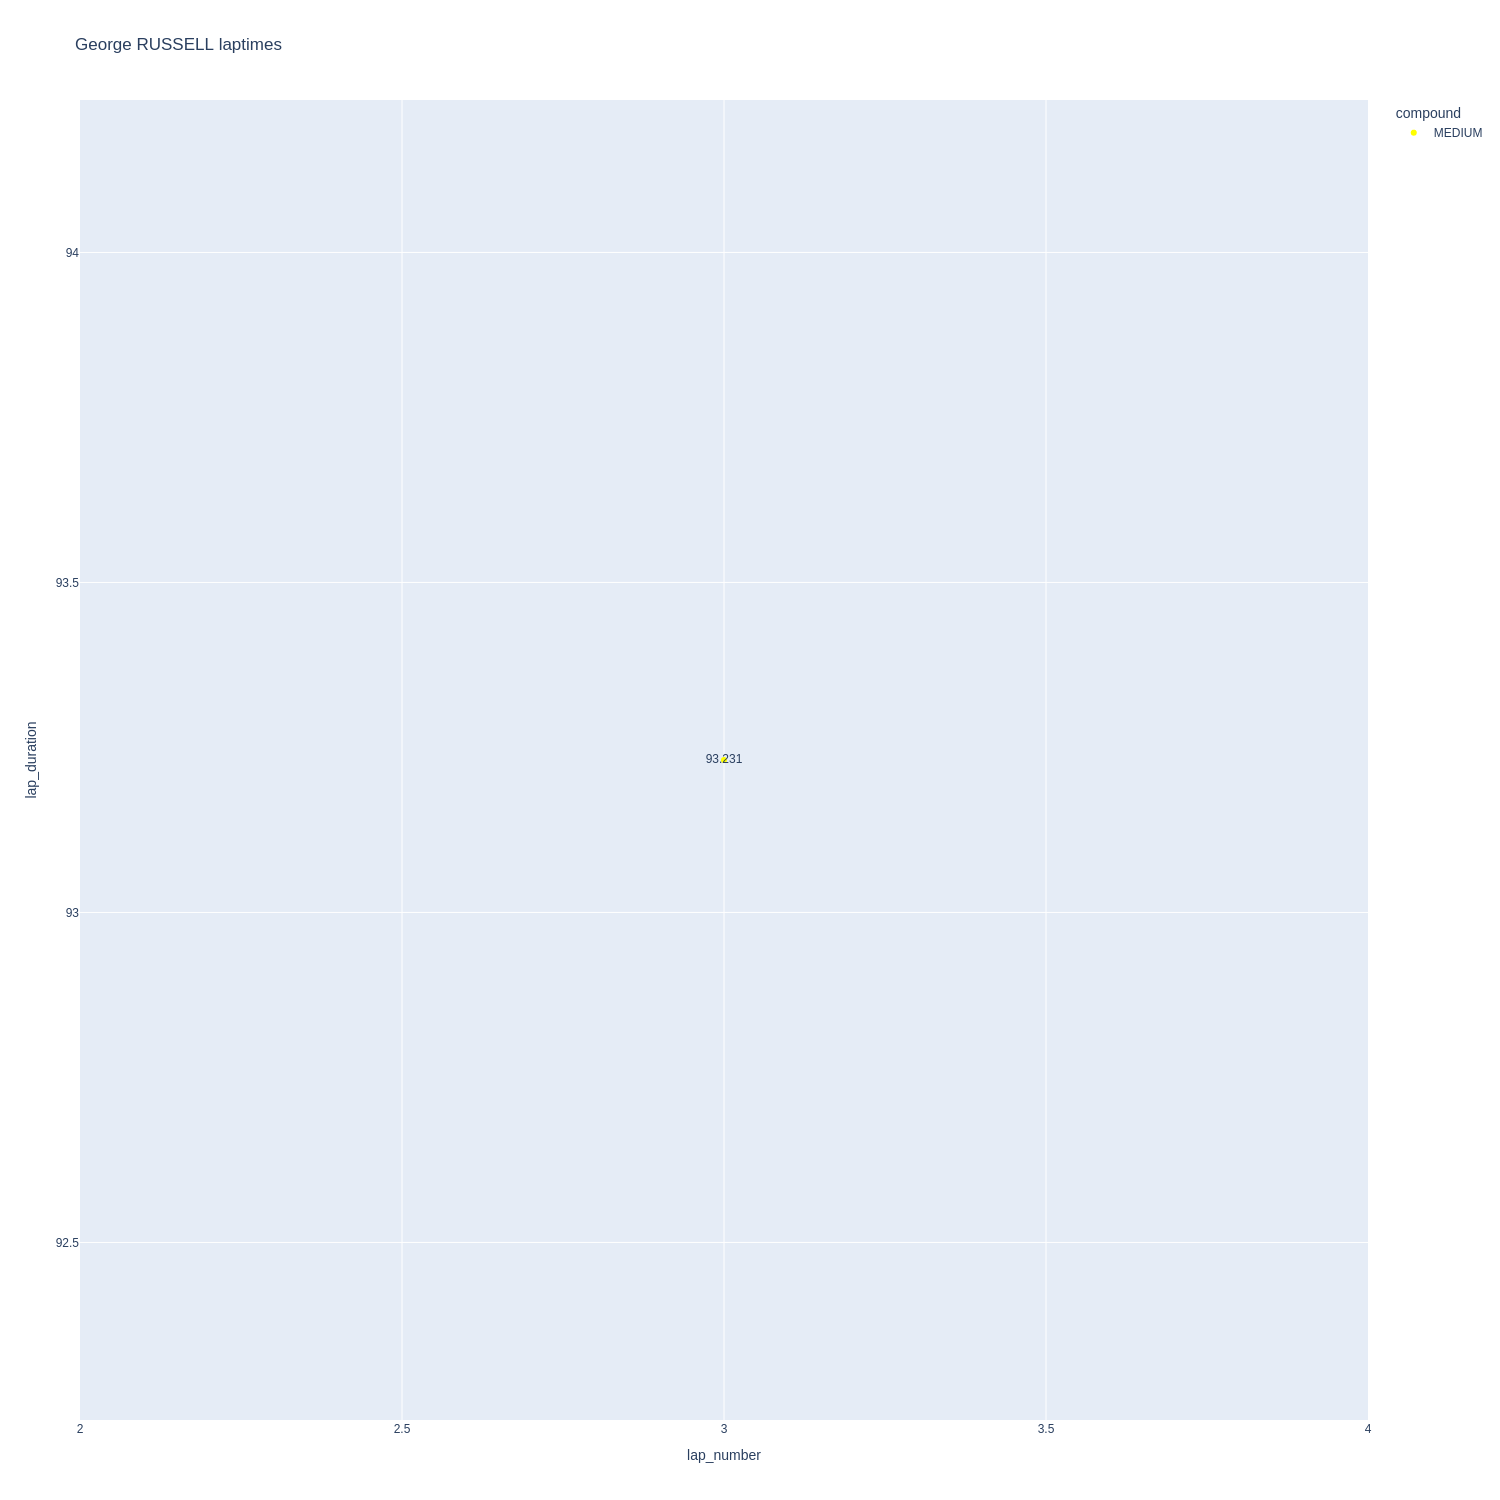

In [51]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

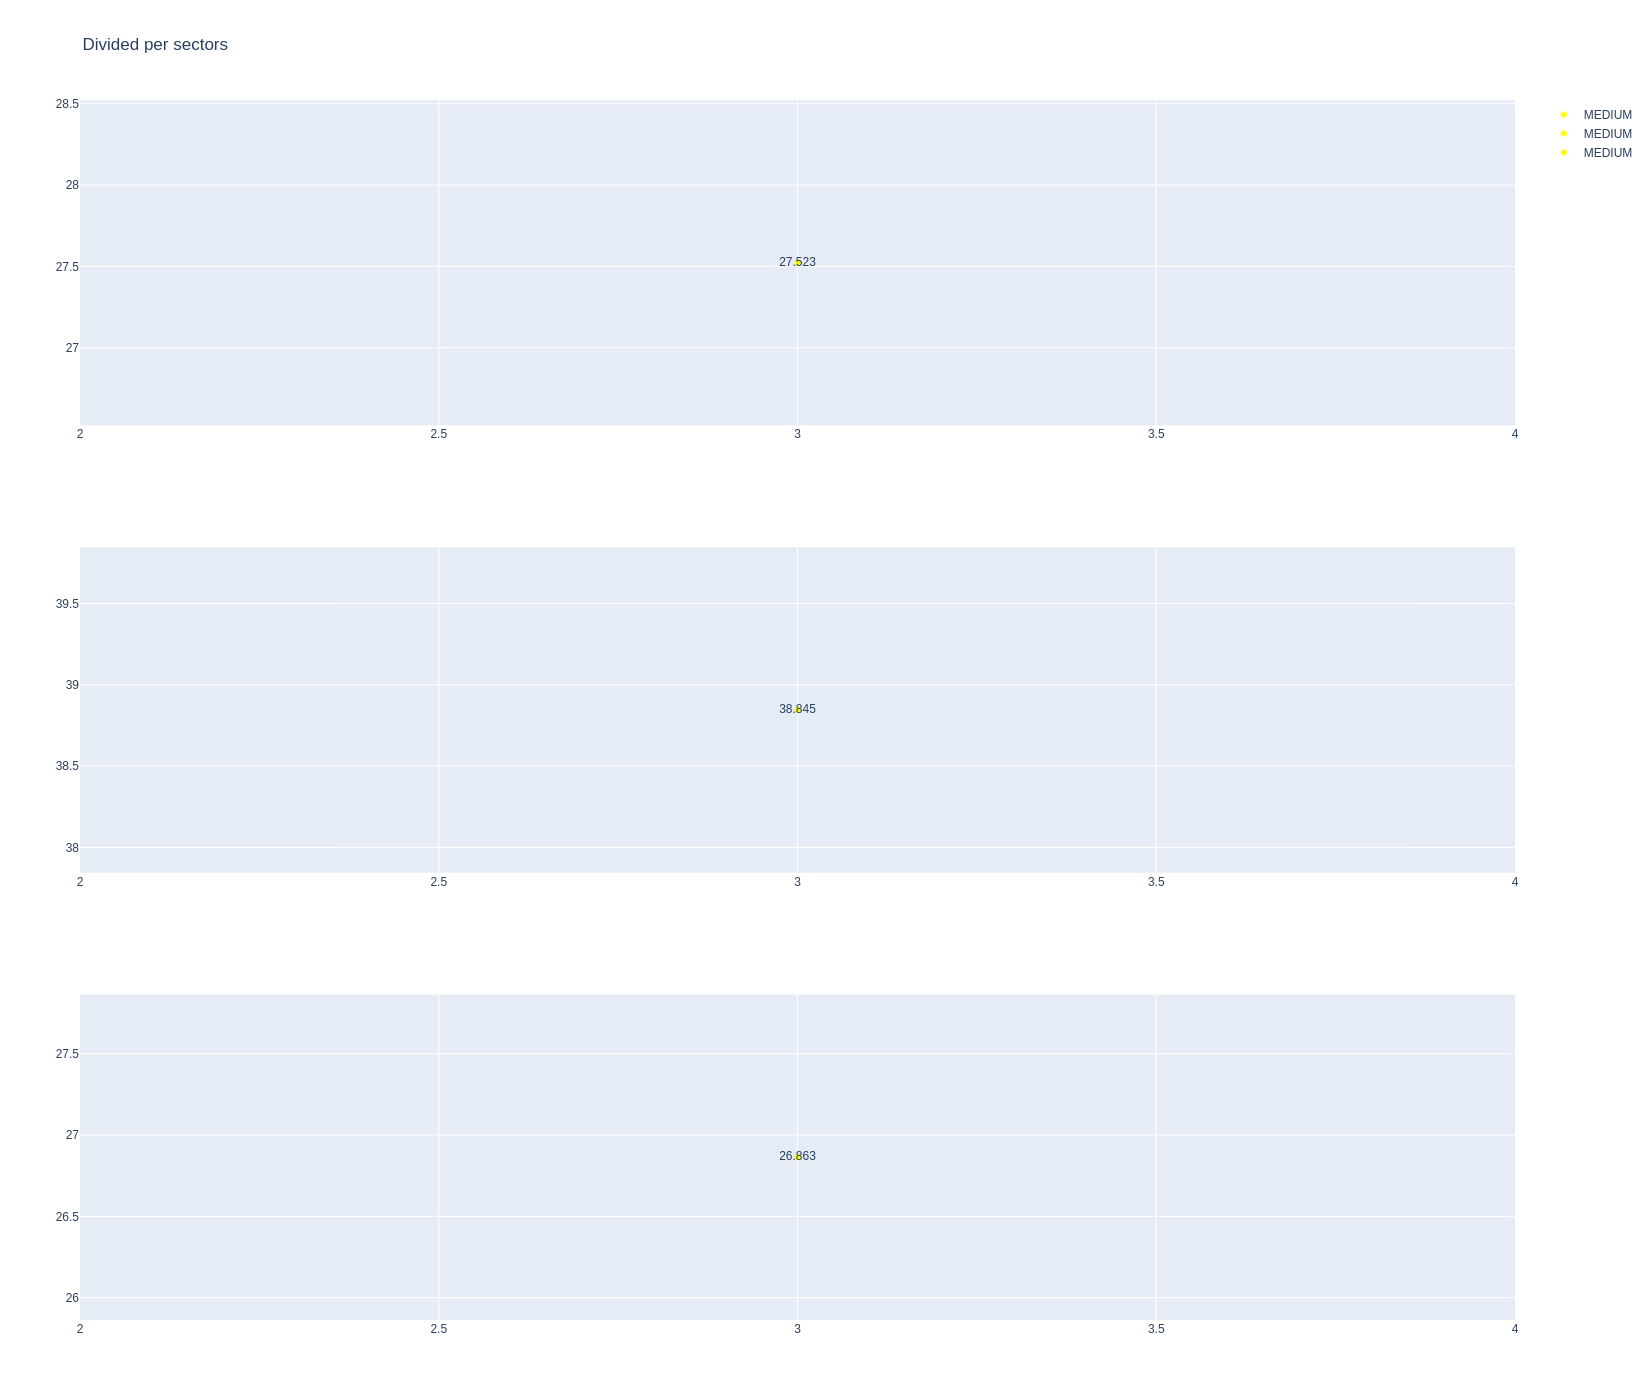

In [52]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [53]:
stintInformation.query('driver_number == 81 or driver_number == 4')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
24         1270         9890             1              4          1        8   
26         1270         9890             1             81          1        8   
45         1270         9890             2             81          9       10   
48         1270         9890             2              4          9       10   
68         1270         9890             3             81         11       19   
70         1270         9890             3              4         11       18   

   compound  tyre_age_at_start  
24   MEDIUM                  0  
26   MEDIUM                  0  
45     SOFT                  0  
48     SOFT                  0  
68     SOFT                  0  
70     SOFT                  0

In [54]:
data = libraryDataF1.getinfolongruns(jointables2,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [55]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [56]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [57]:
data = libraryDataF1.getinfolongruns(jointables2,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
19   Oscar PIASTRI   MEDIUM  2025-10-03T13:04:05.310000+00:00           2   
266  Oscar PIASTRI     SOFT  2025-10-03T13:54:37.126000+00:00          14   
281  Oscar PIASTRI     SOFT  2025-10-03T13:56:11.940000+00:00          15   
297  Oscar PIASTRI     SOFT  2025-10-03T13:57:46.373000+00:00          16   
310  Oscar PIASTRI     SOFT  2025-10-03T13:59:21.024000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
19              27.804             39.251             26.369        93.424  
266             28.497             39.448             26.826        94.771  
281             28.311             39.597             26.661        94.569  
297             28.022             40.205             26.321        94.548  
310             28.012             39.374             26.565        93.951

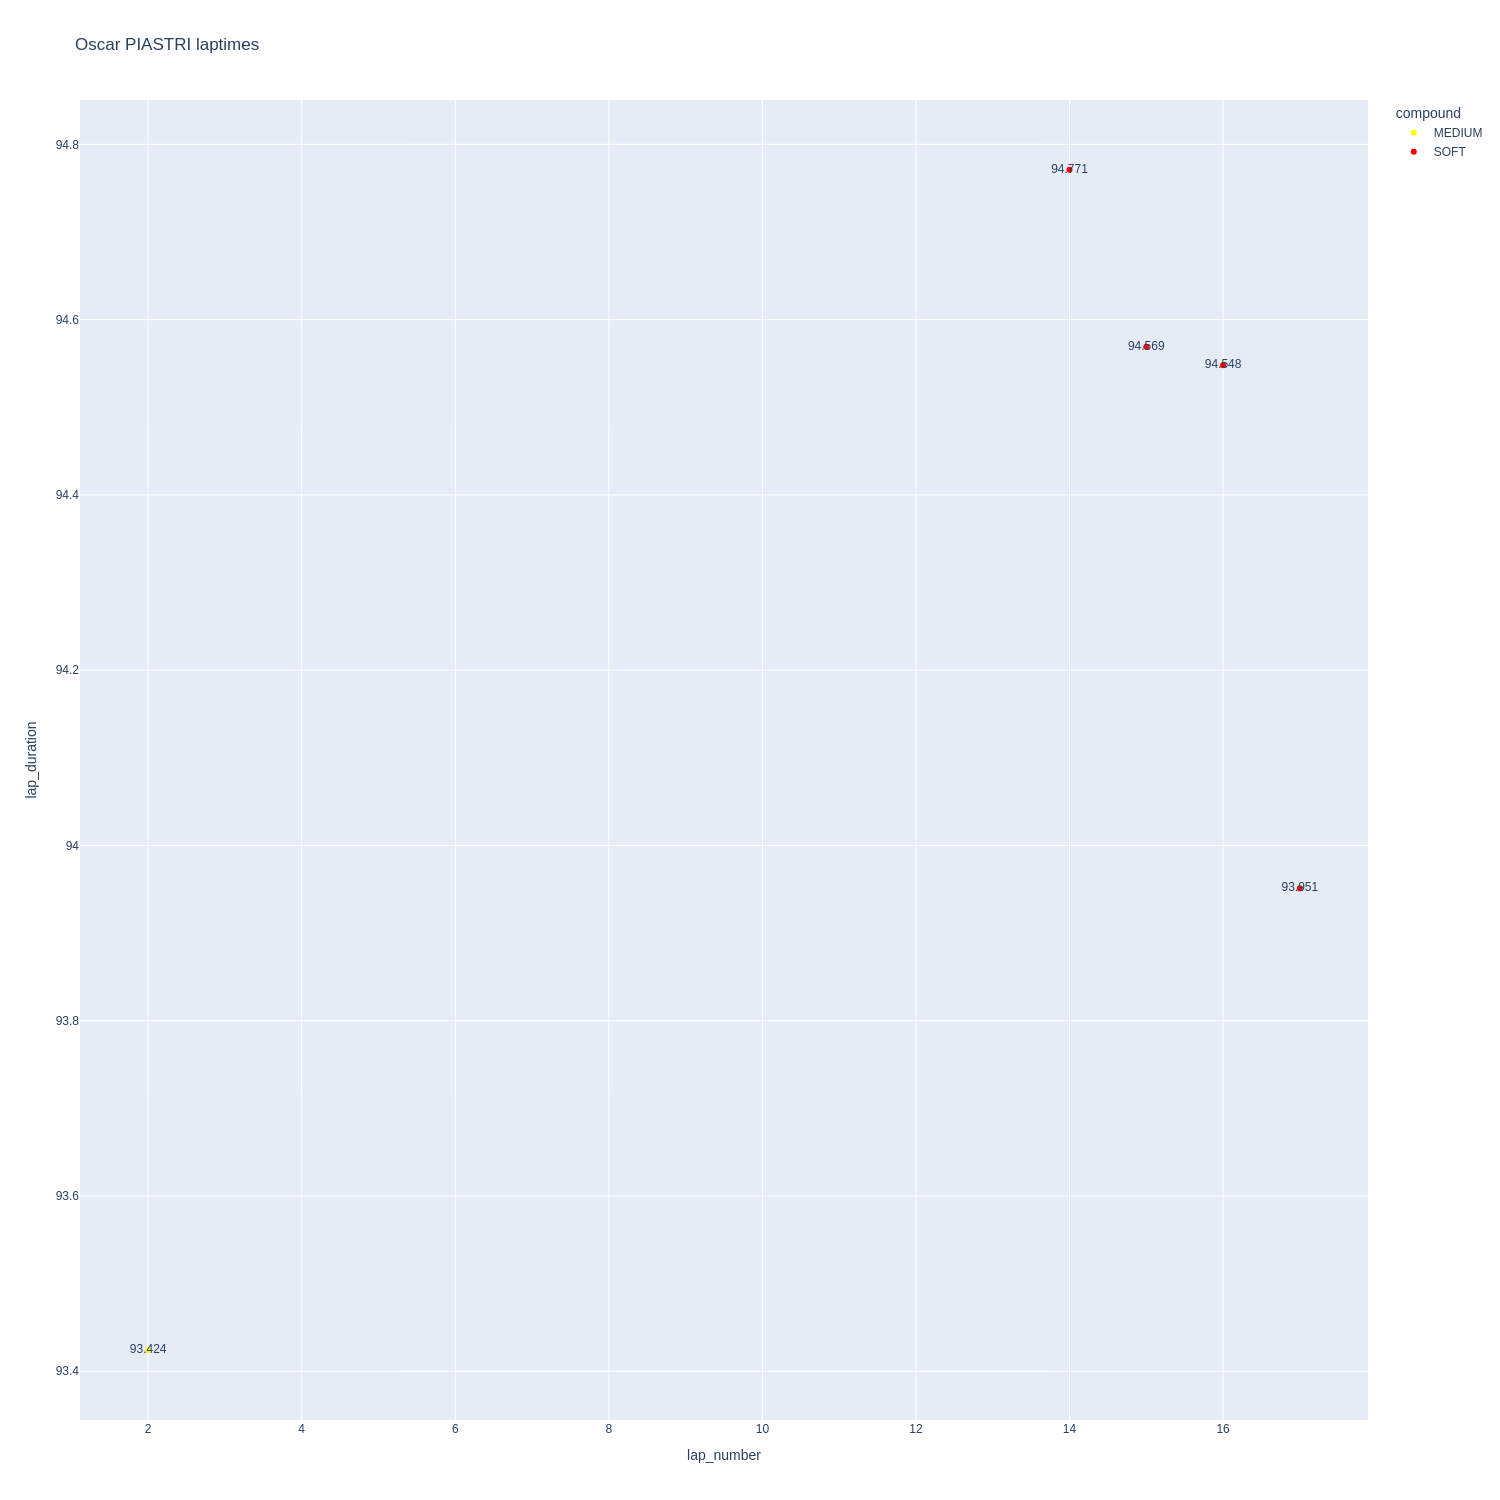

In [58]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

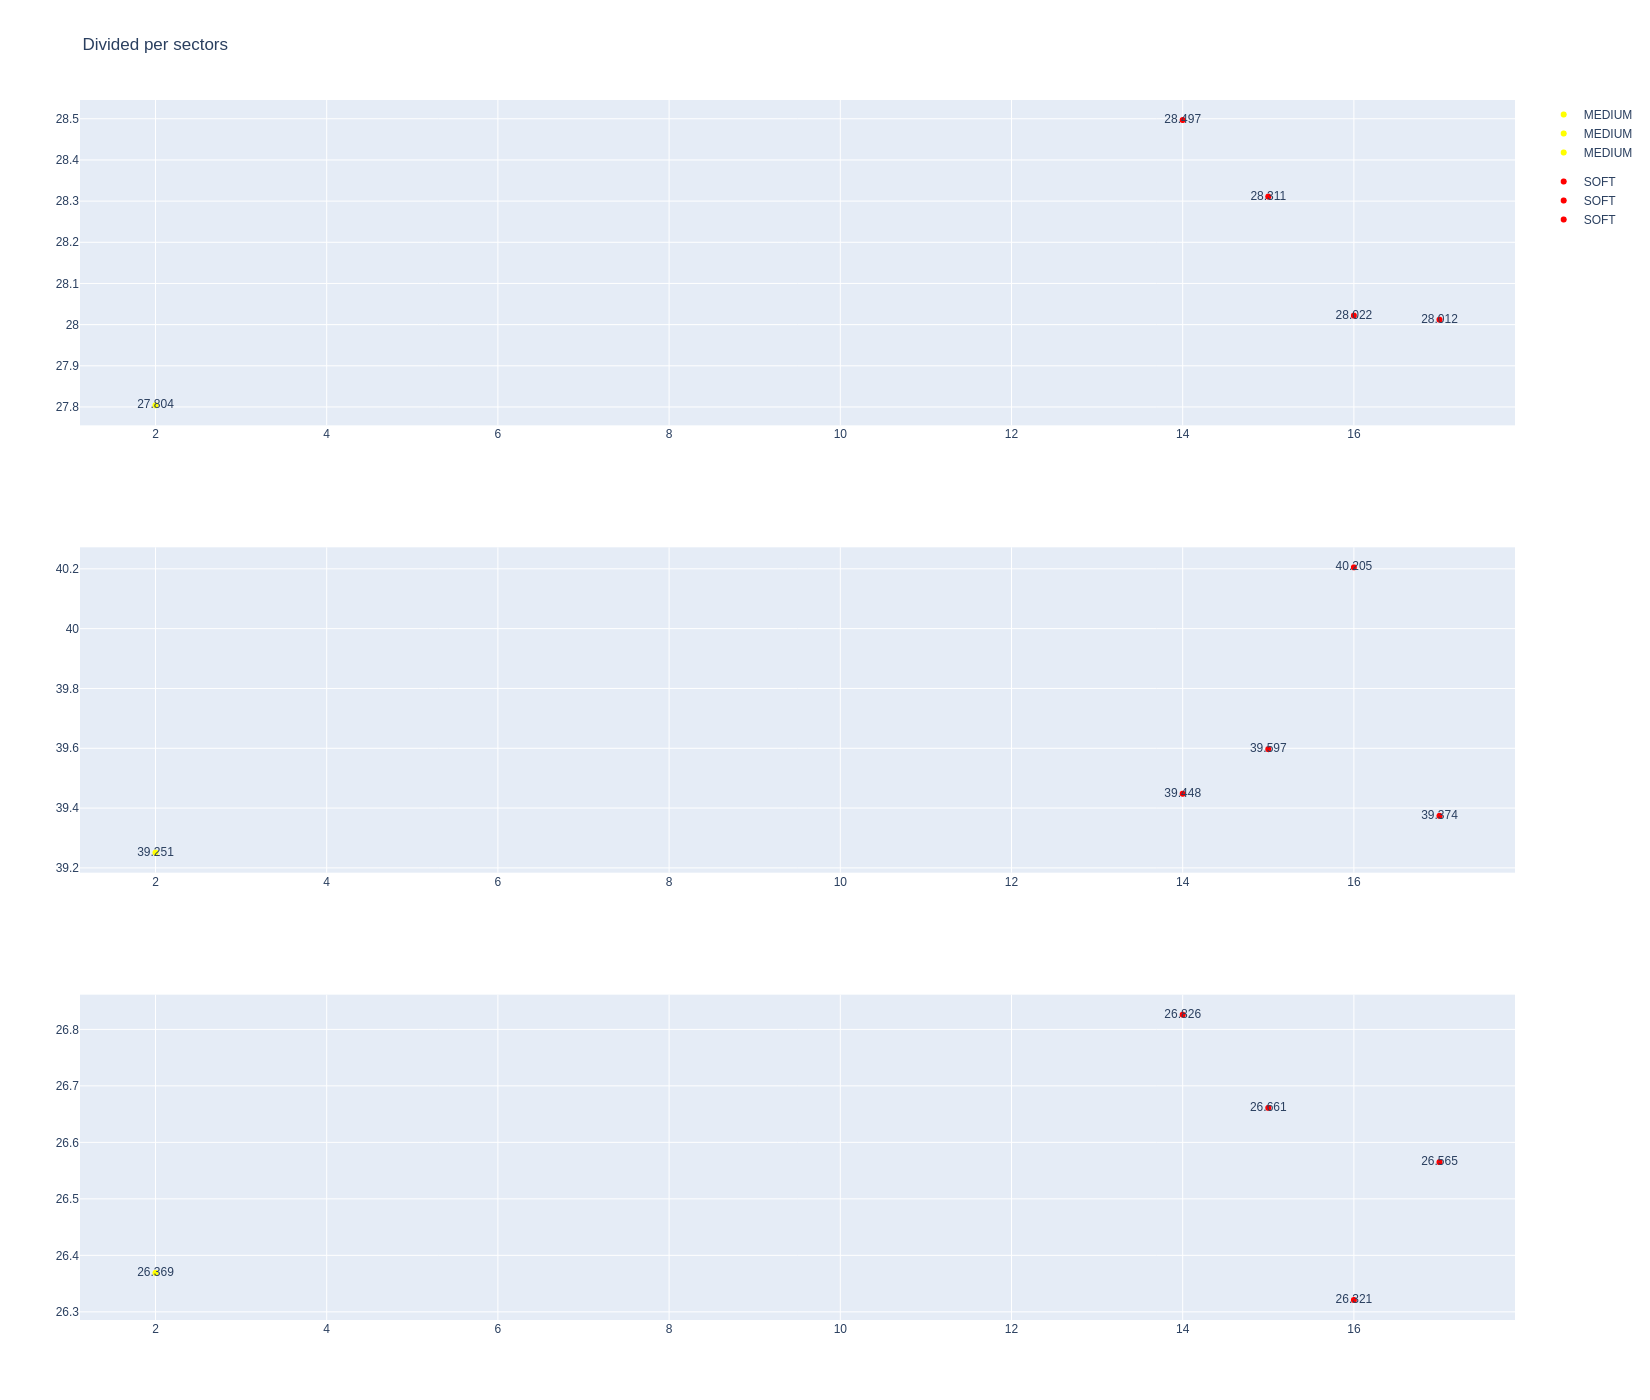

In [59]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [60]:
stintInformation.query('driver_number == 18 or driver_number == 14')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
20         1270         9890             1             14          1        7   
28         1270         9890             1             18          1        8   
39         1270         9890             2             14          8       10   
43         1270         9890             2             18          9       10   
65         1270         9890             3             18         11       18   
69         1270         9890             3             14         11       19   

   compound  tyre_age_at_start  
20     HARD                  0  
28     HARD                  0  
39     SOFT                  0  
43     SOFT                  0  
65     SOFT                  2  
69     SOFT                  3

In [61]:
data = libraryDataF1.getinfolongruns(jointables2,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
43   Fernando ALONSO     HARD  2025-10-03T13:06:14.269000+00:00           2   
314  Fernando ALONSO     SOFT  2025-10-03T13:59:38.524000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
43              27.886             39.787             26.395        94.068  
314             28.105             39.991             27.007        95.103

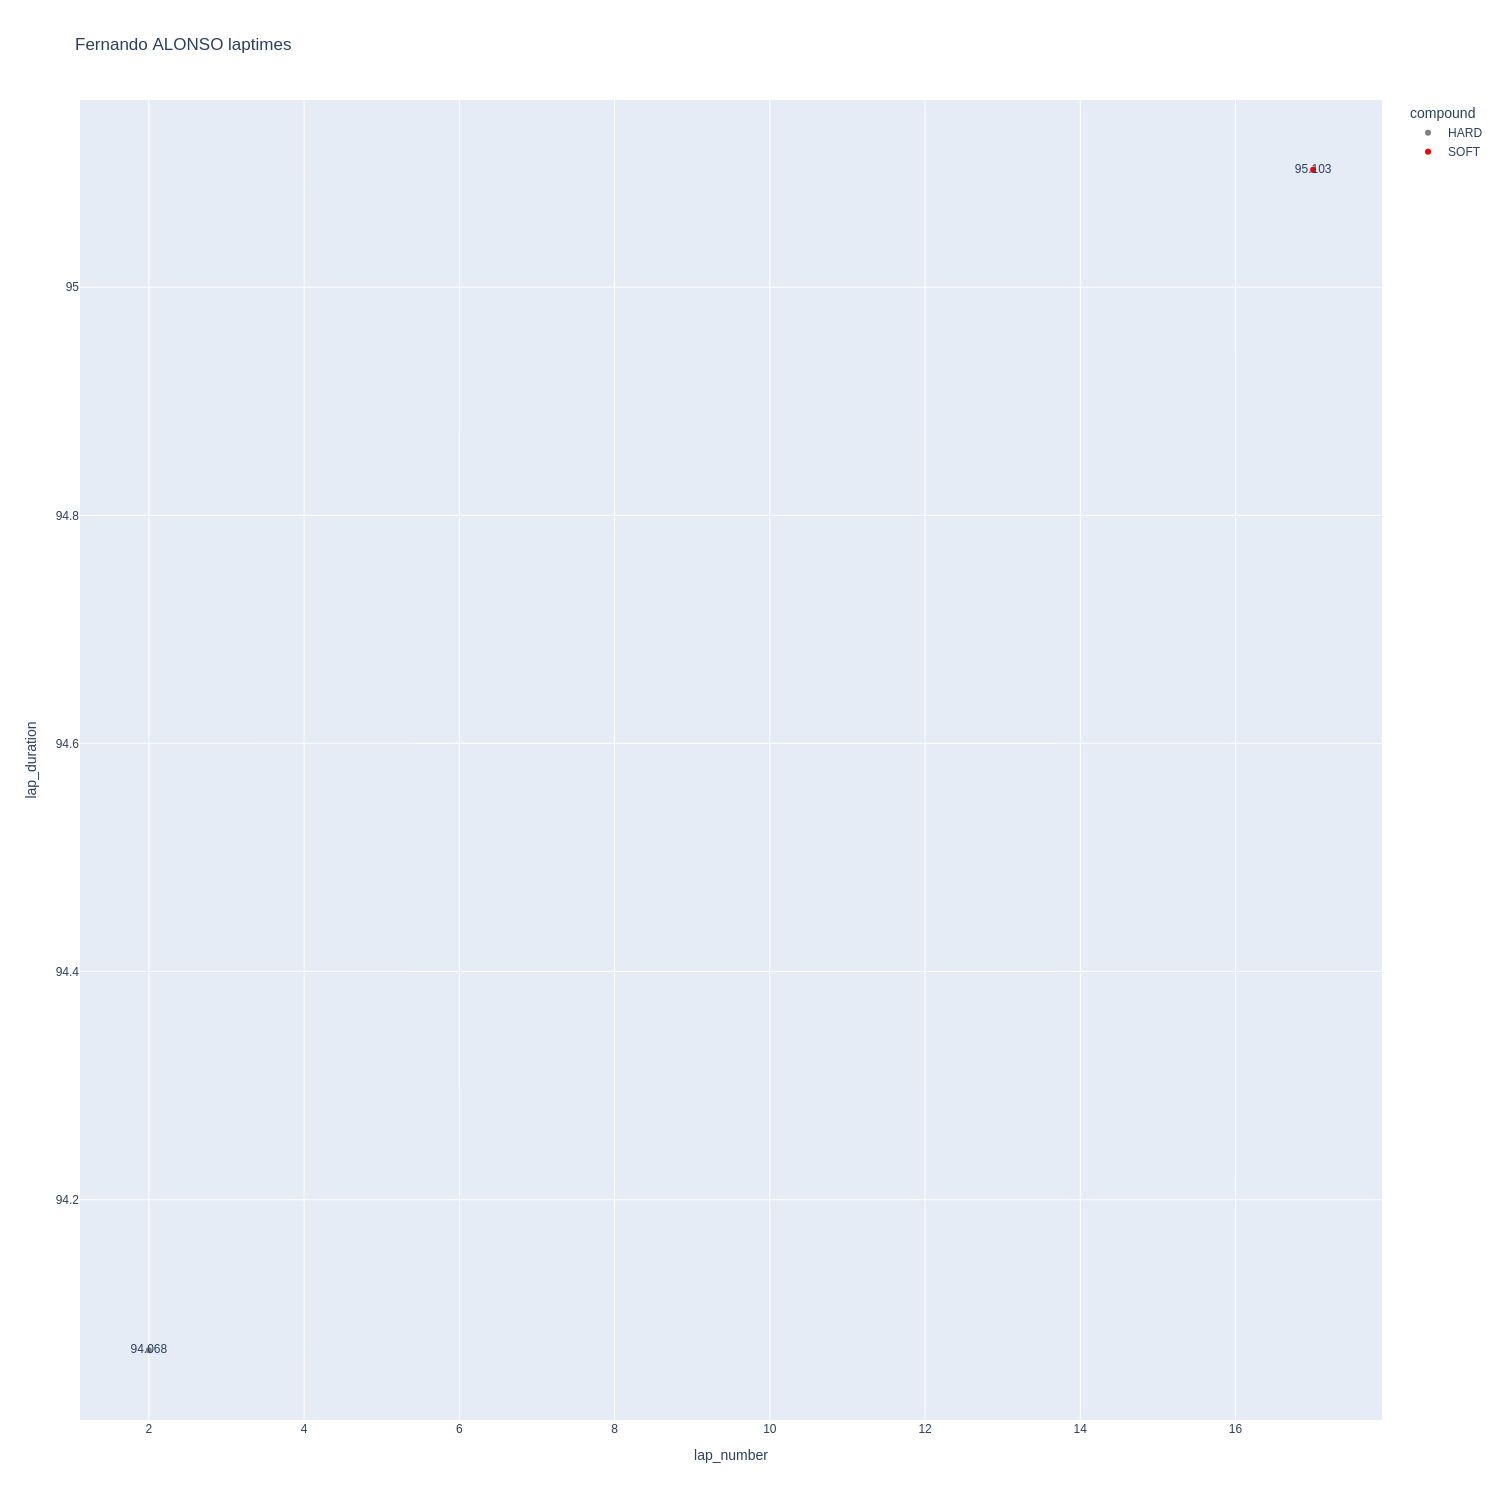

In [62]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

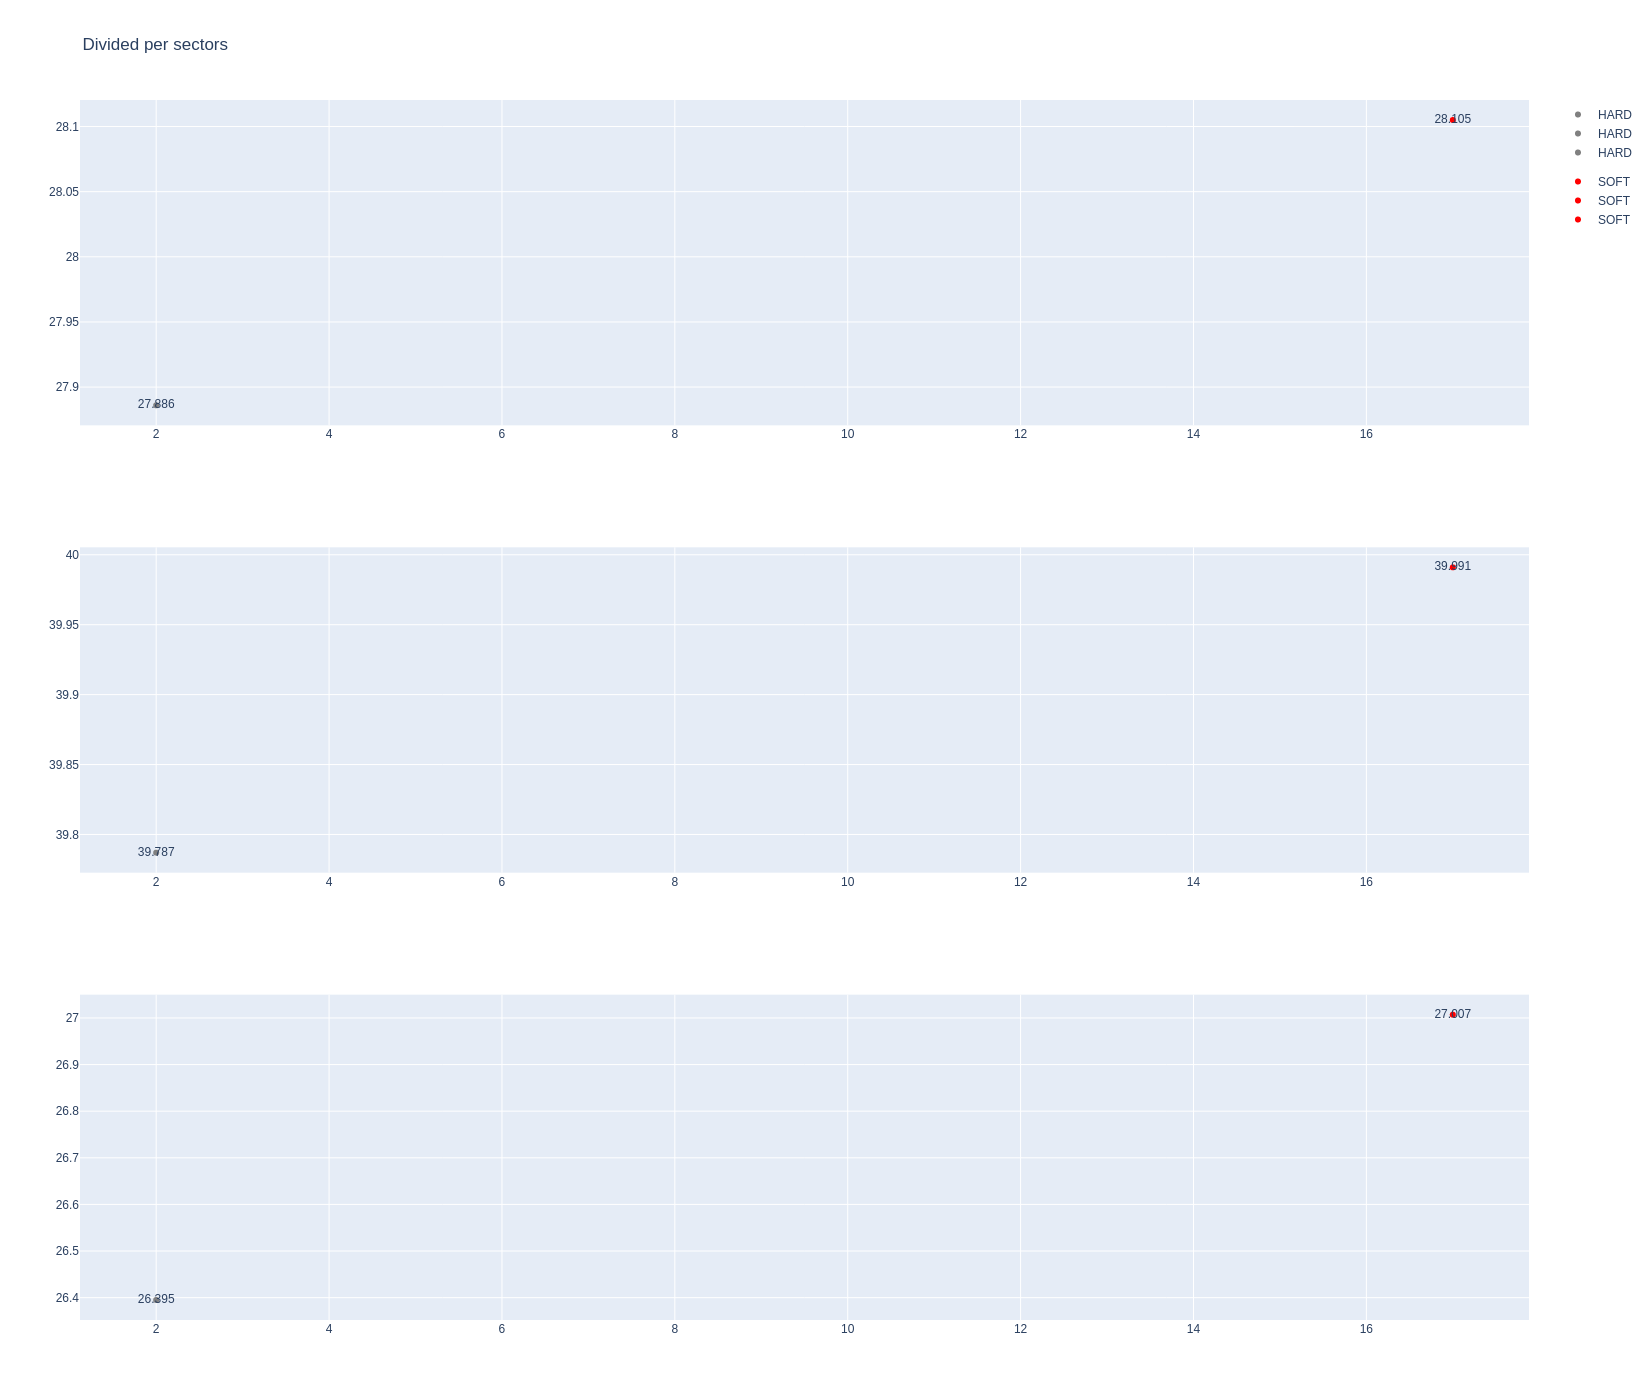

In [63]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [64]:
data = libraryDataF1.getinfolongruns(jointables2,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
36  Lance STROLL     HARD  2025-10-03T13:05:48.764000+00:00           2   
51  Lance STROLL     HARD  2025-10-03T13:07:23.729000+00:00           3   
90  Lance STROLL     HARD  2025-10-03T13:11:30.013000+00:00           5   

    duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
36             28.410             40.126             26.465        95.001  
51             27.930             40.324             26.770        95.024  
90             27.874             39.111             26.132        93.117

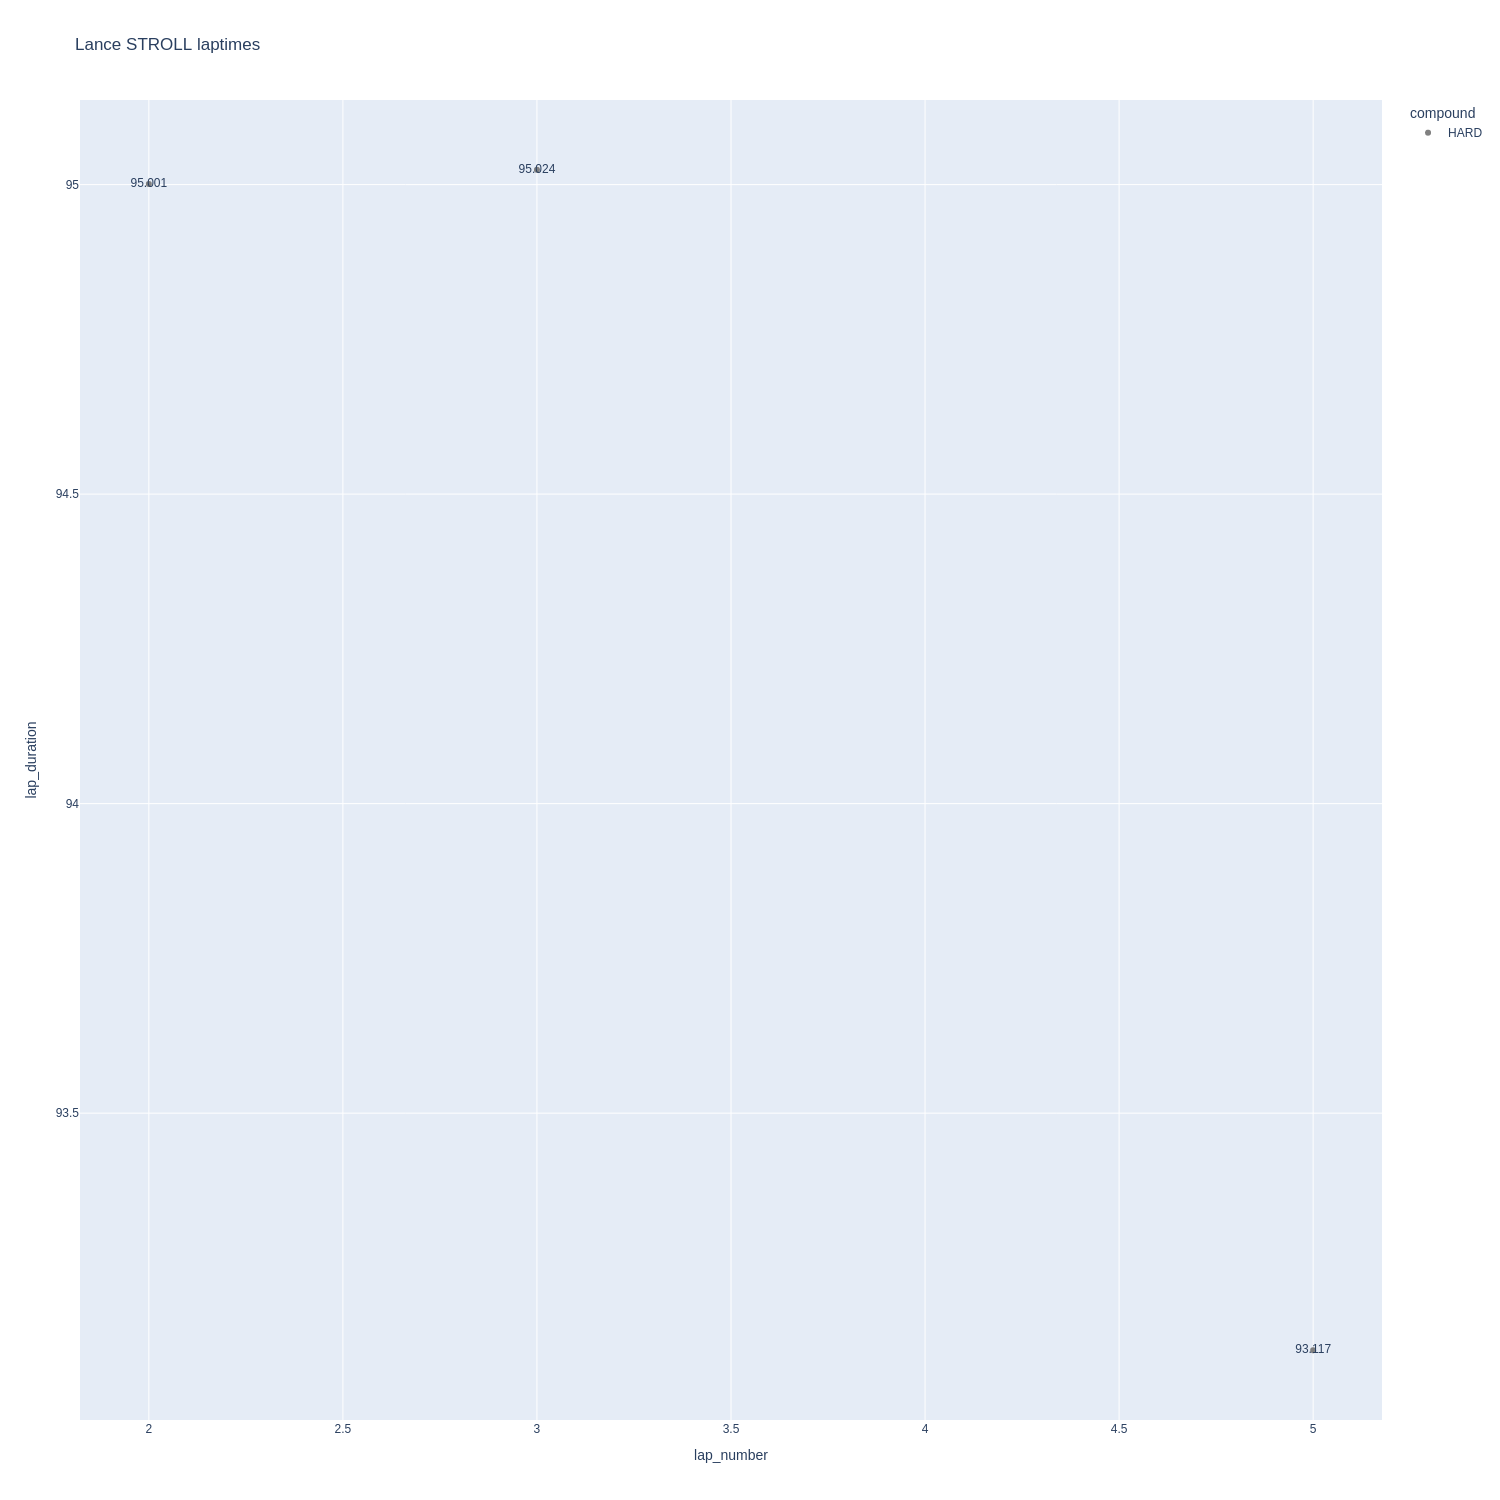

In [65]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

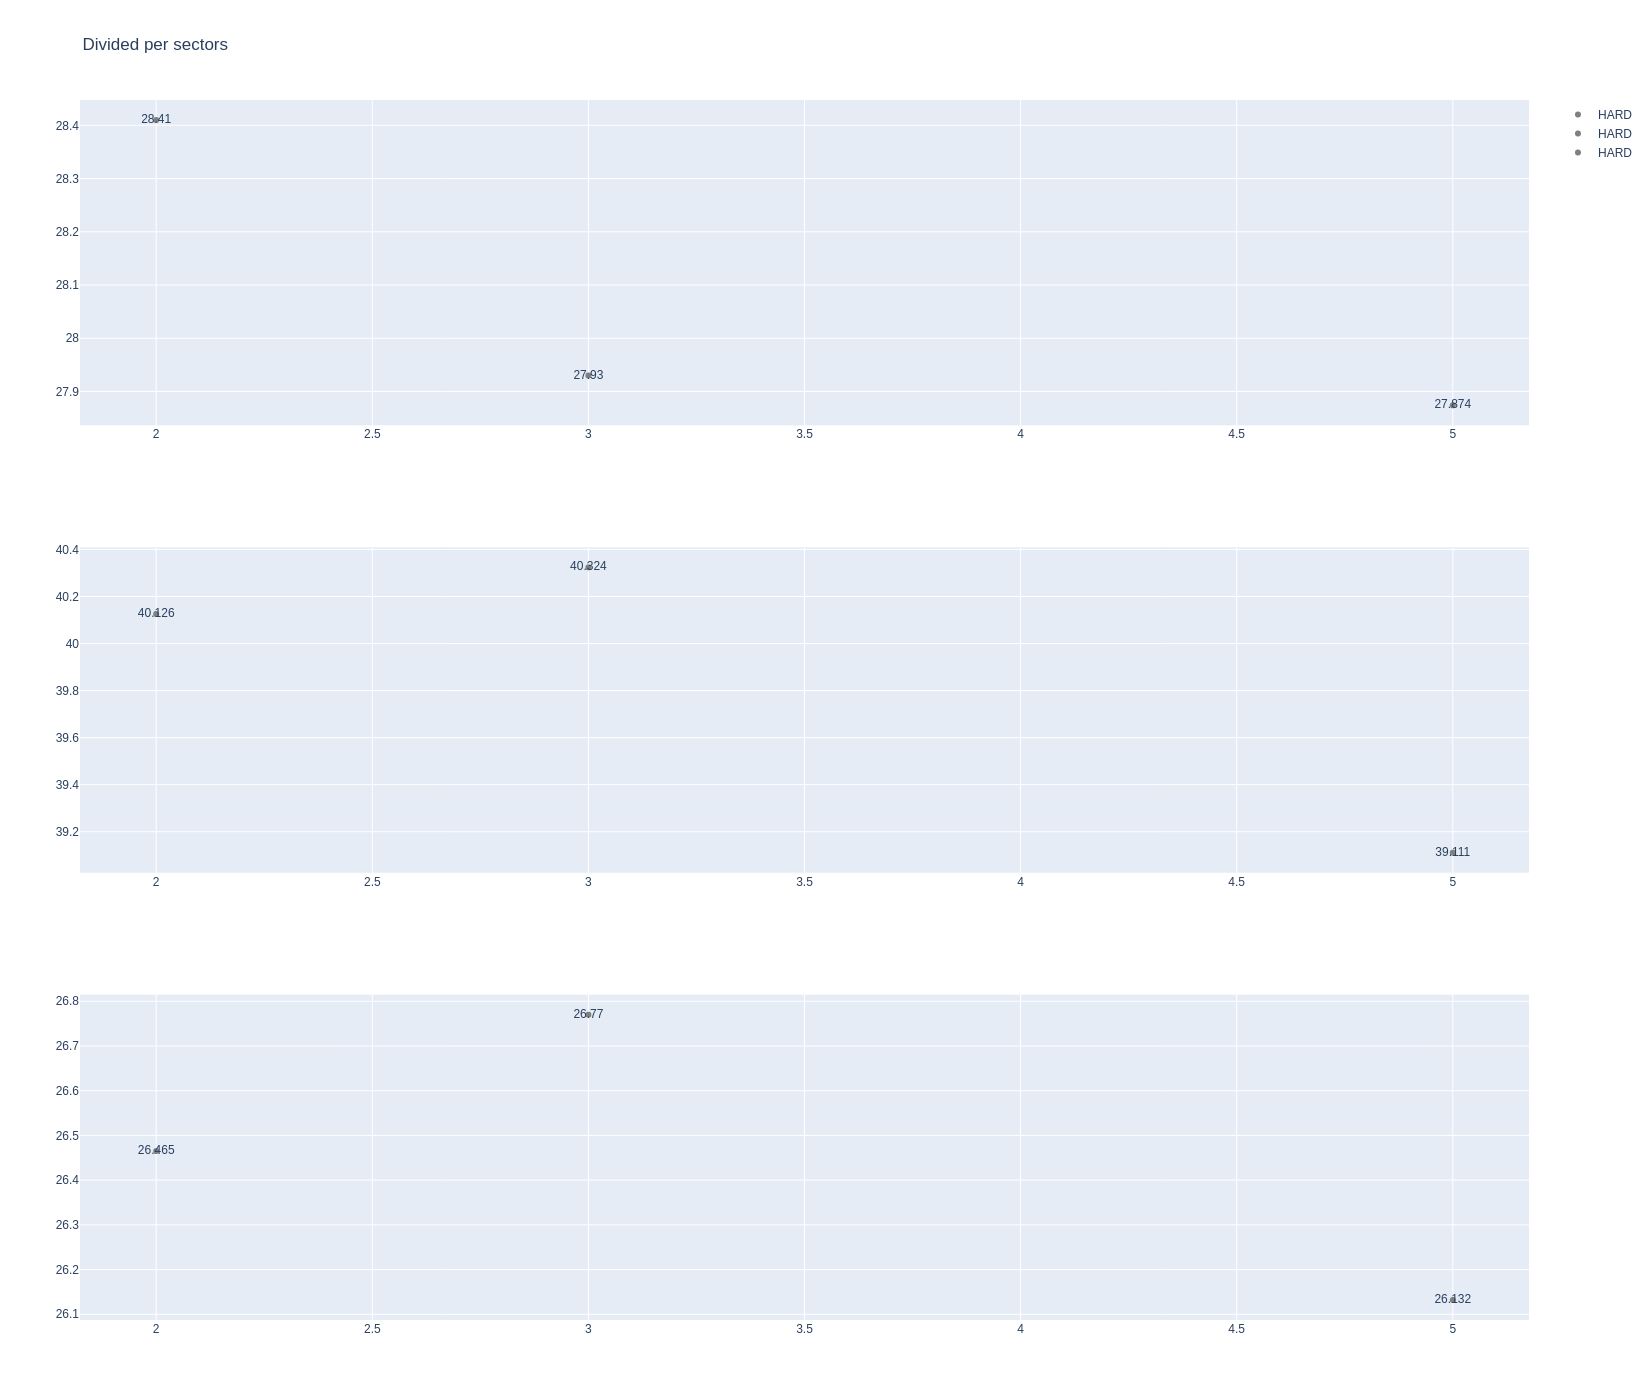

In [66]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [67]:
stintInformation.query('driver_number == 30 or driver_number == 6')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
19         1270         9890             1             30          1        8   
23         1270         9890             1              6          1        8   
30         1270         9890             2             30          9       10   
31         1270         9890             2              6          9       10   
63         1270         9890             3              6         11       19   

   compound  tyre_age_at_start  
19   MEDIUM                  0  
23   MEDIUM                  0  
30     SOFT                  0  
31     SOFT                  0  
63     SOFT                  2

In [68]:
data = libraryDataF1.getinfolongruns(jointables2,6,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
28  Isack HADJAR   MEDIUM  2025-10-03T13:05:04.185000+00:00           2   

    duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
28             27.505             39.361             27.408        94.274

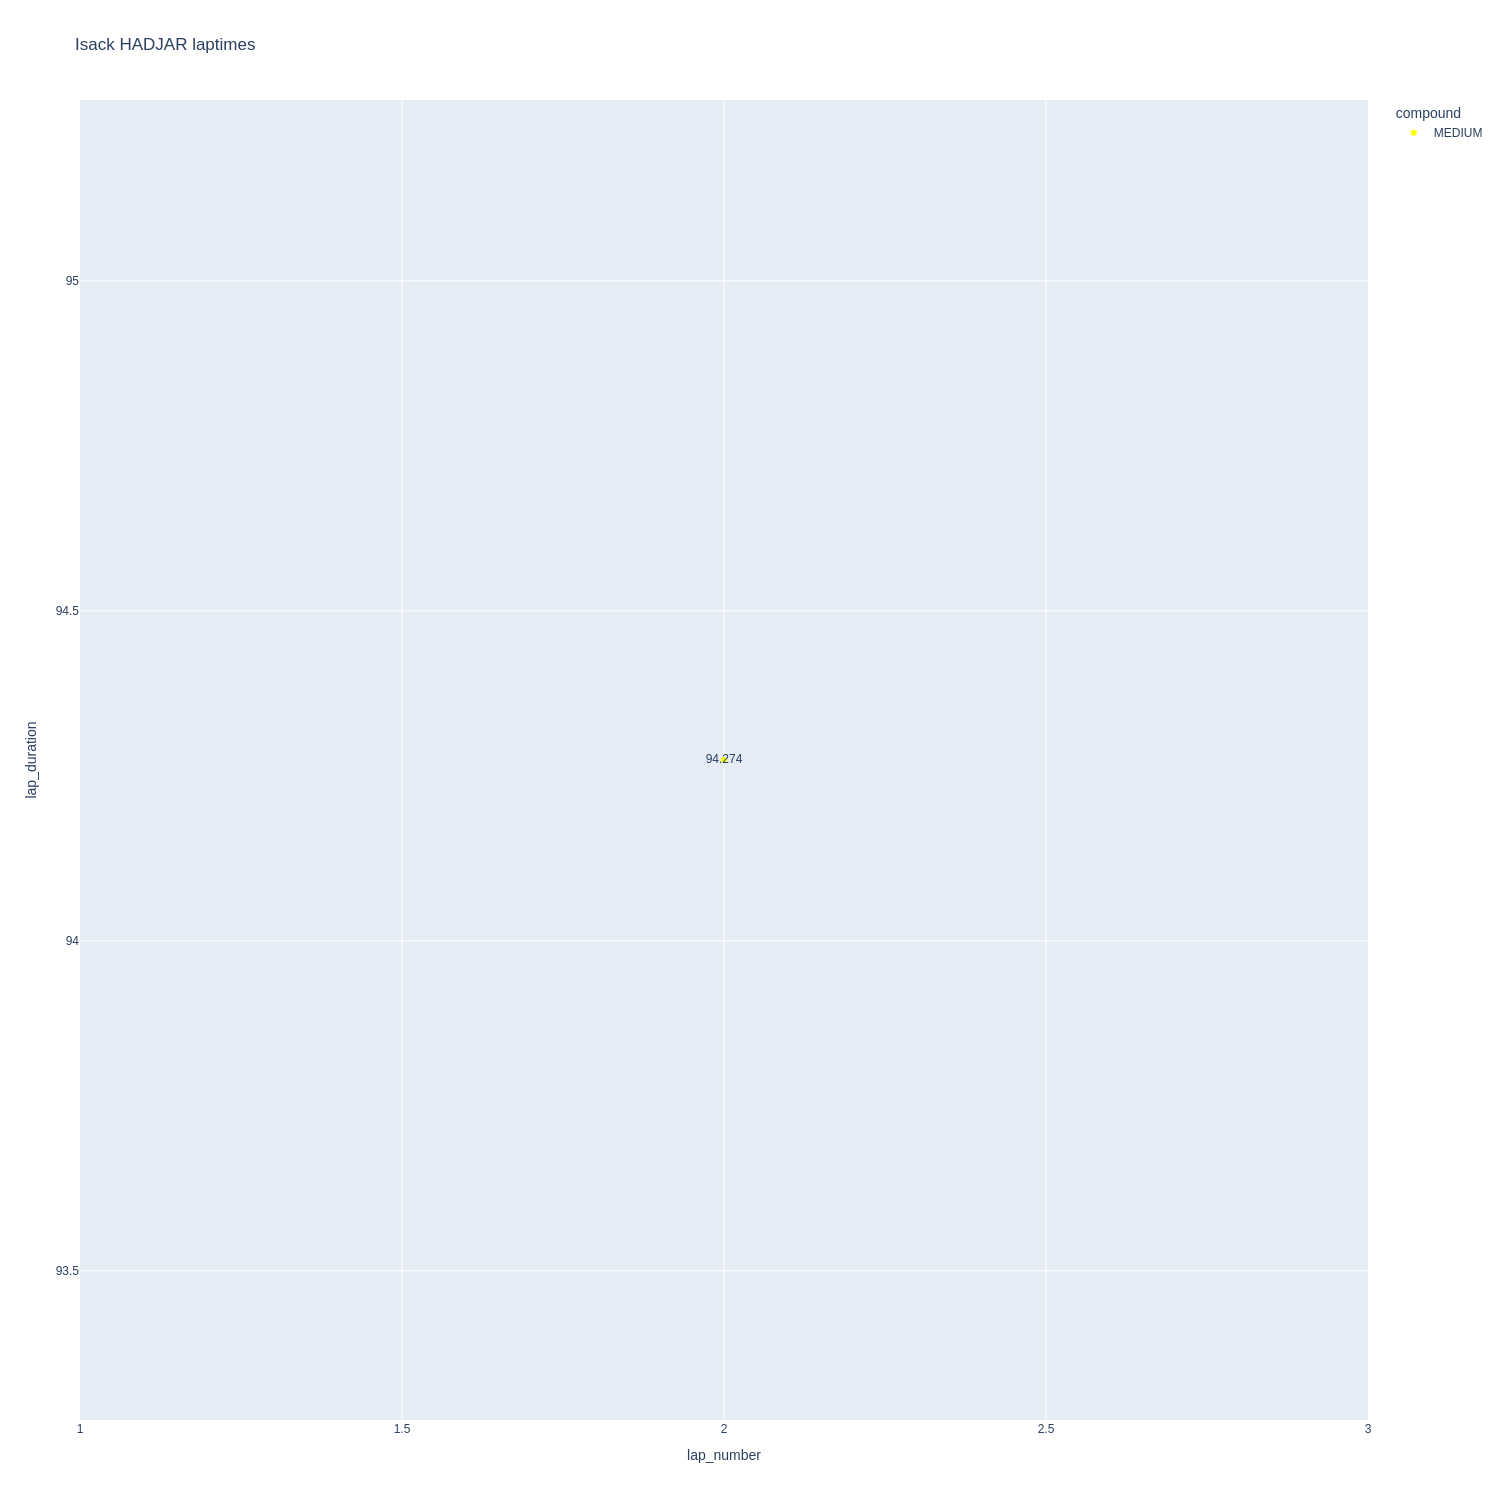

In [69]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

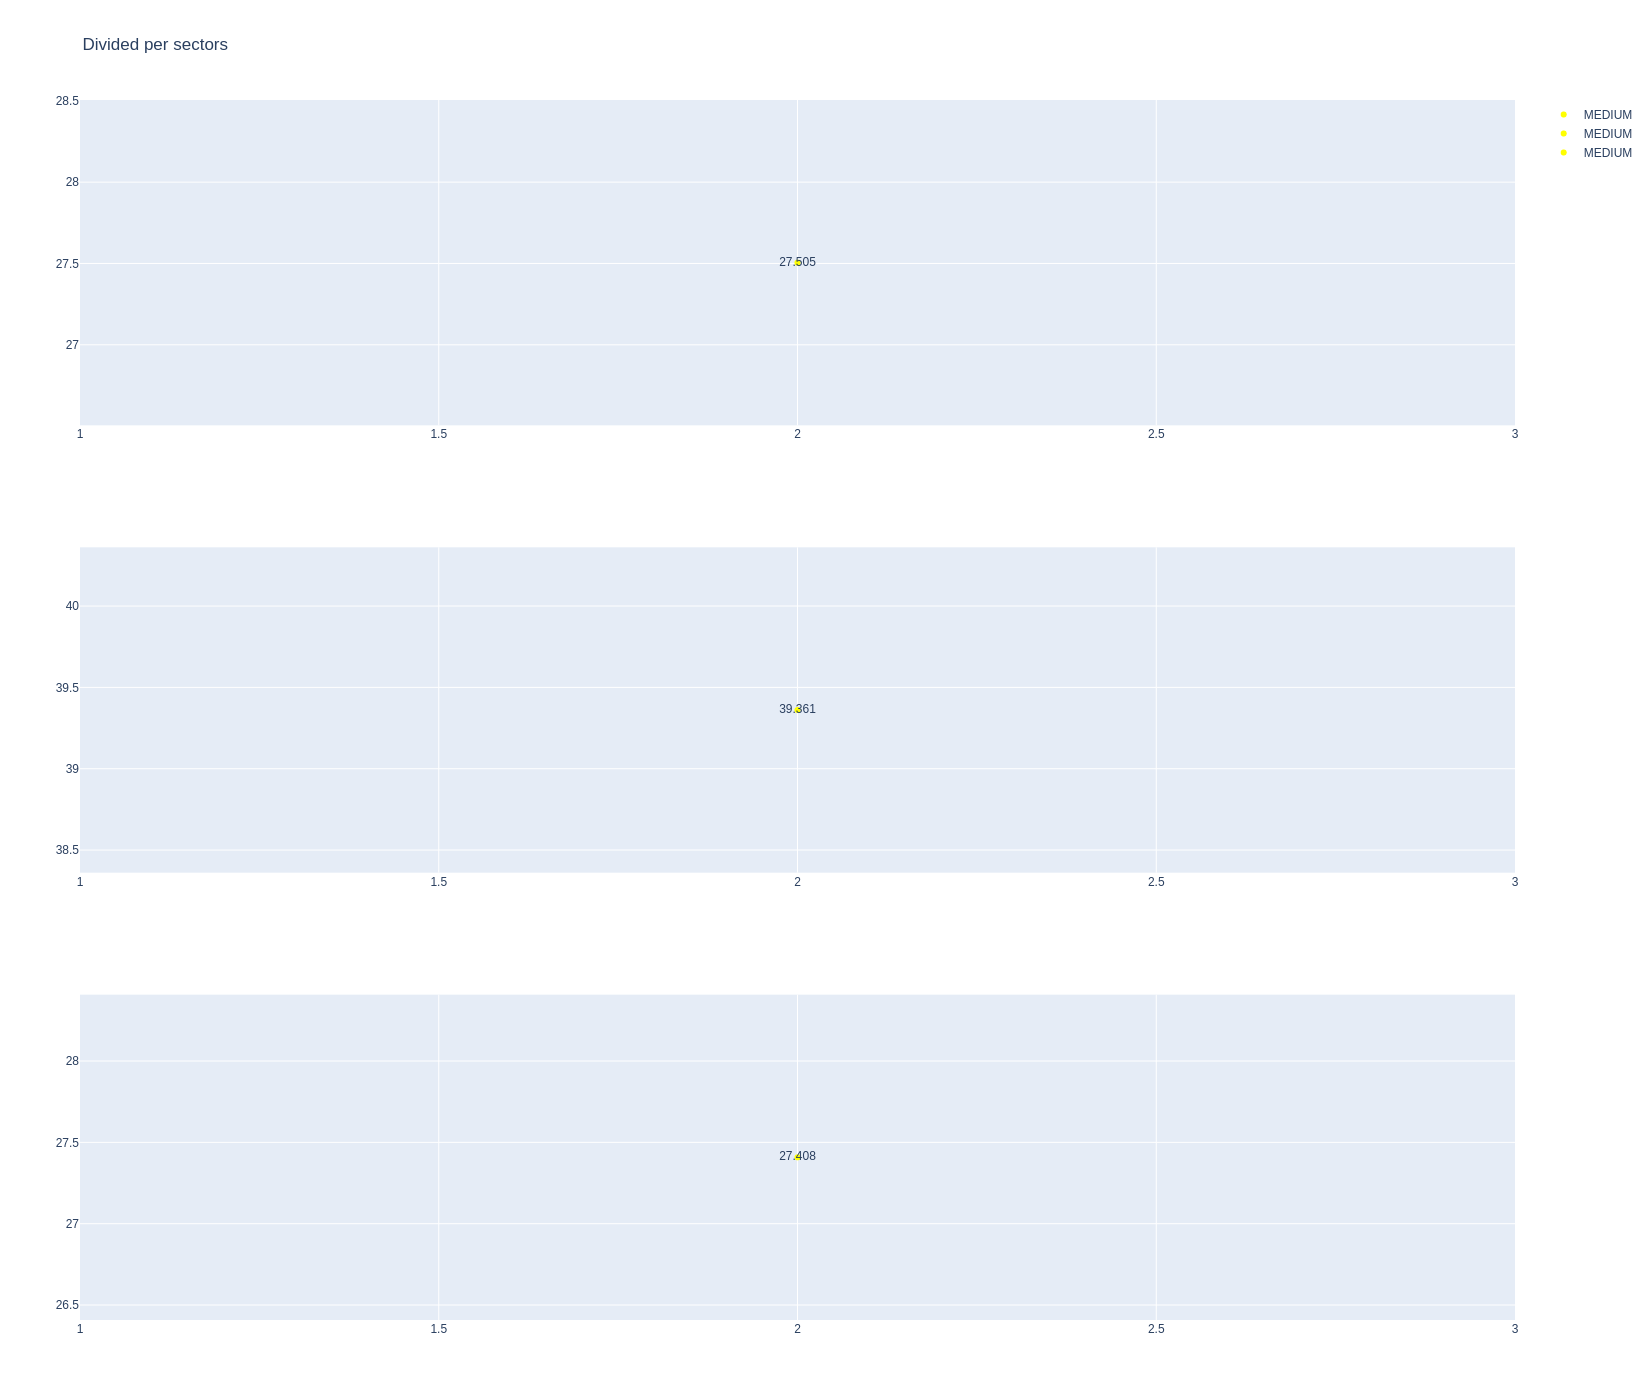

In [70]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [71]:
data = libraryDataF1.getinfolongruns(jointables2,30,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
20  Liam LAWSON   MEDIUM  2025-10-03T13:04:13.732000+00:00           2   

    duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
20             27.846             39.339             26.679        93.864

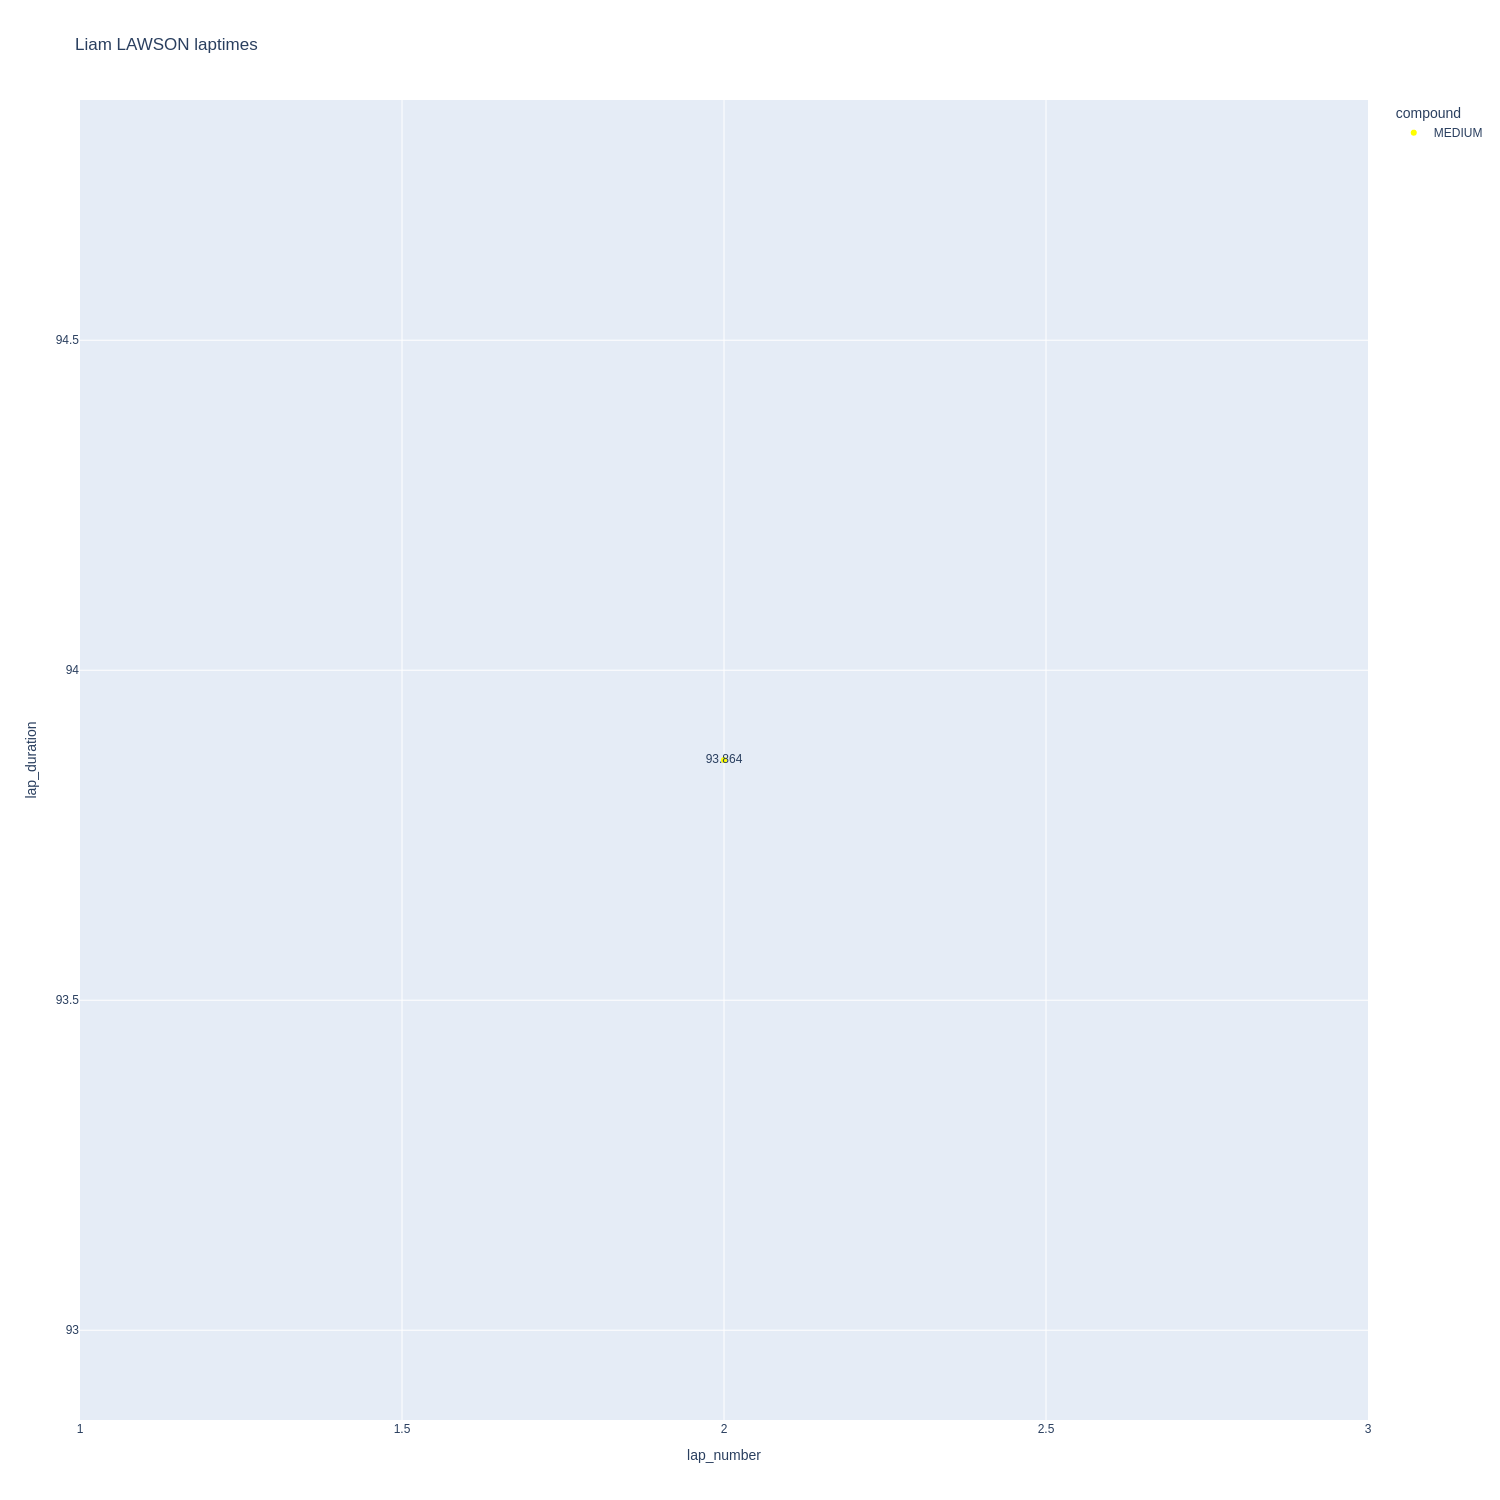

In [72]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

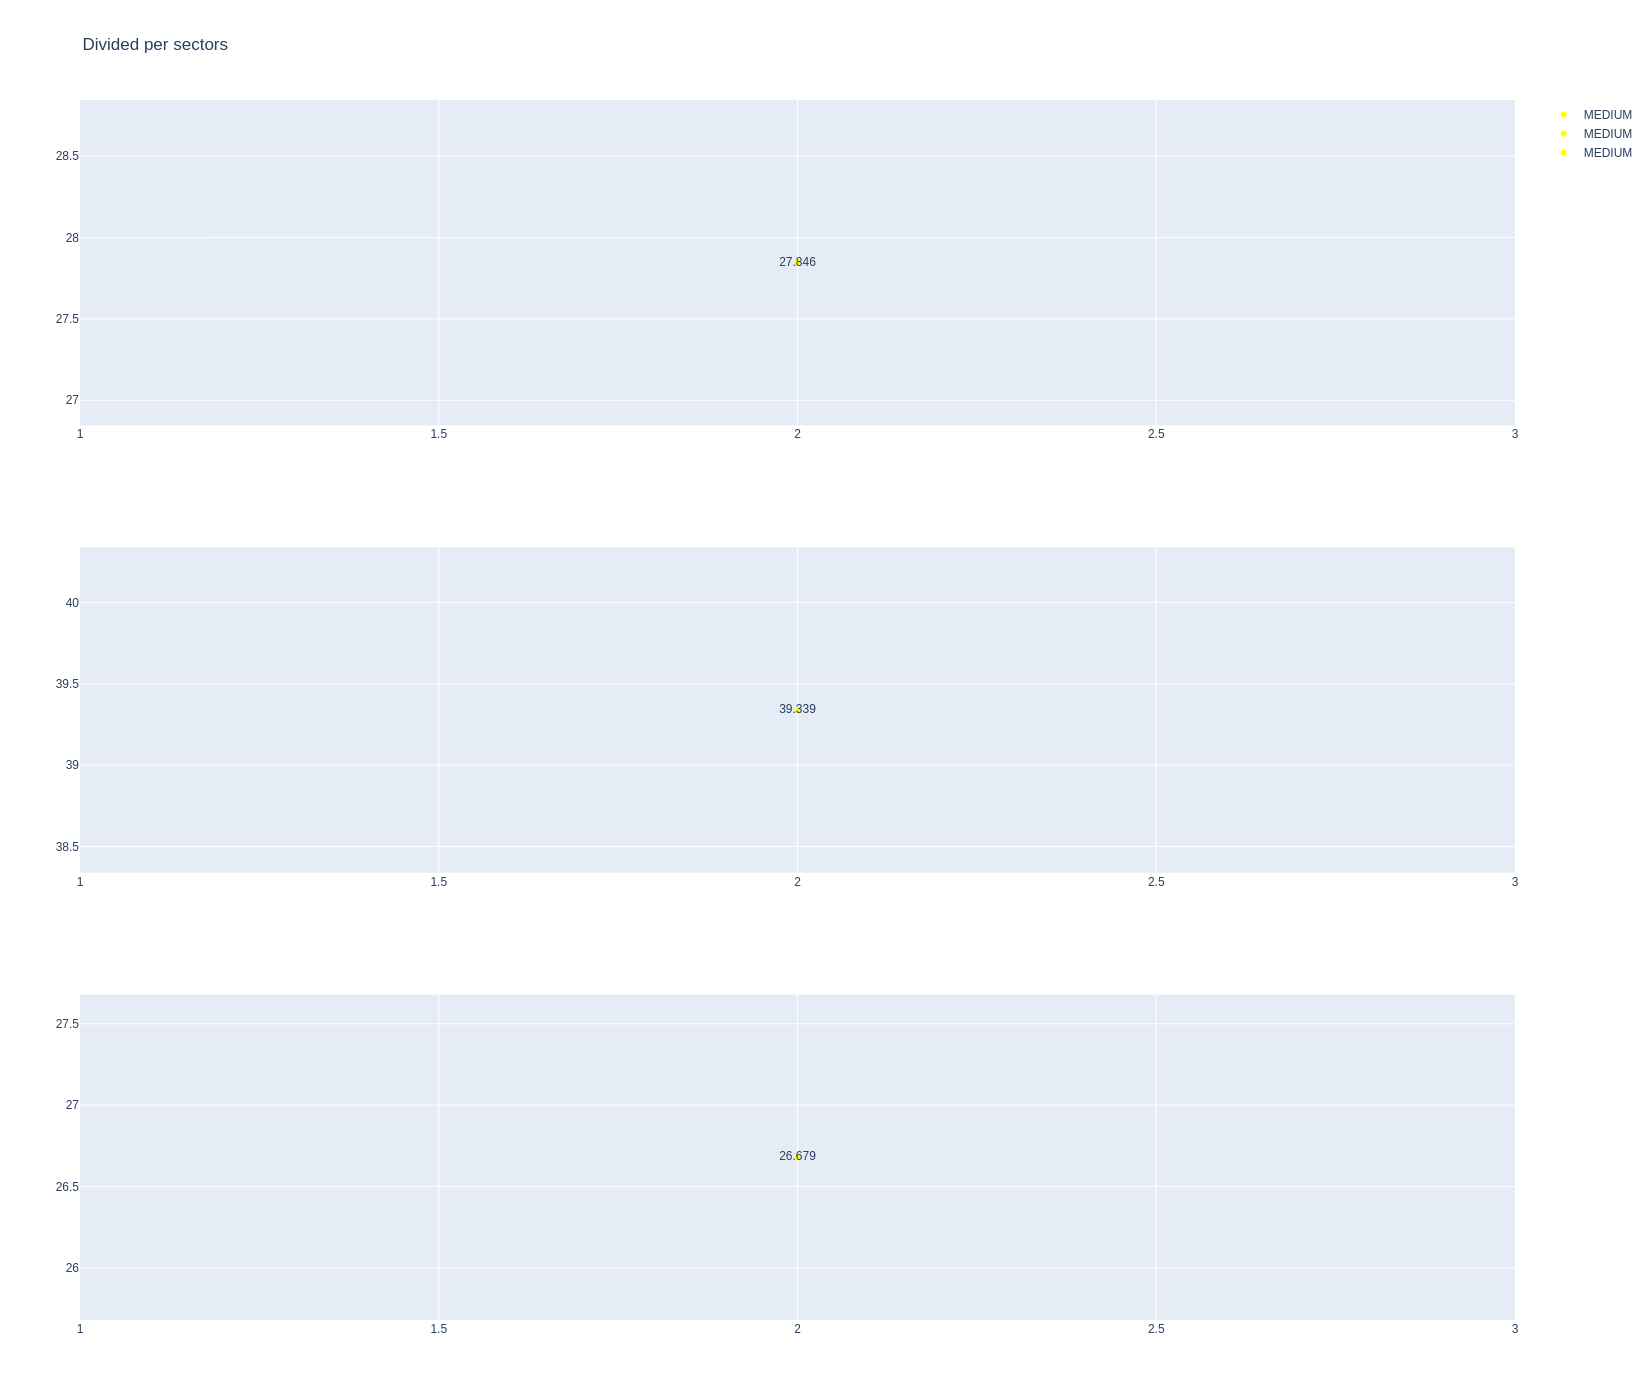

In [73]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [74]:
stintInformation.query('driver_number == 87 or driver_number == 31')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
5          1270         9890             1             87          1        5   
13         1270         9890             2             87          6        7   
14         1270         9890             1             31          1        8   
34         1270         9890             3             87          8       10   
42         1270         9890             2             31          9       11   
55         1270         9890             4             87         11       15   
60         1270         9890             5             87         16       18   
61         1270         9890             3             31         12       19   

   compound  tyre_age_at_start  
5    MEDIUM                  0  
13   MEDIUM                  0  
14   MEDIUM                  0  
34     SOFT                  0  
42     SOFT                  0  
55     SOFT                  3  
60   MEDIUM                  7  
61     SOFT                  0

In [75]:
data = libraryDataF1.getinfolongruns(jointables2,31,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
38   Esteban OCON   MEDIUM  2025-10-03T13:05:58.147000+00:00           2   
78   Esteban OCON   MEDIUM  2025-10-03T13:10:13.474000+00:00           4   
114  Esteban OCON   MEDIUM  2025-10-03T13:14:08.407000+00:00           6   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
38              27.888             39.908             26.554        94.350  
78              27.848             39.224             27.226        94.298  
114             27.680             39.146             26.419        93.245

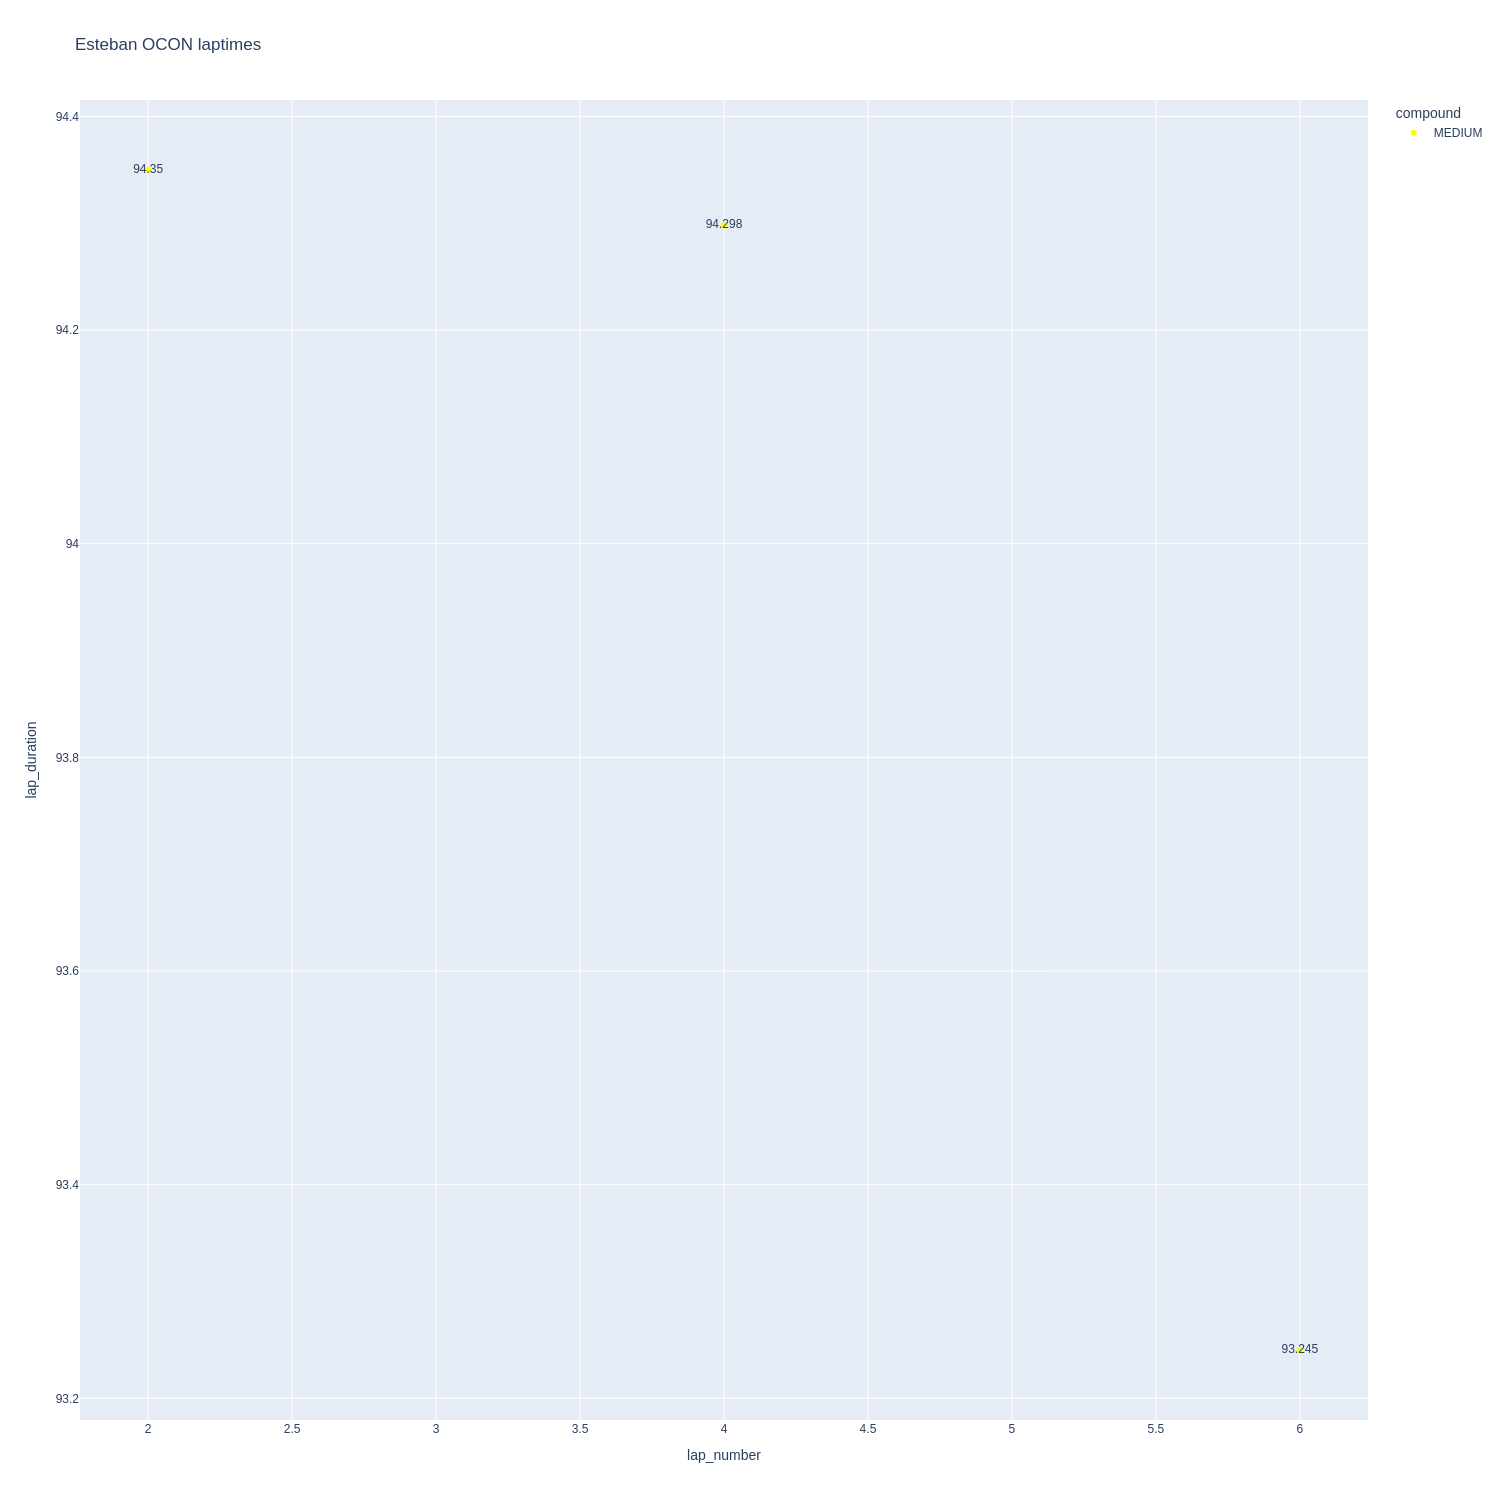

In [76]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

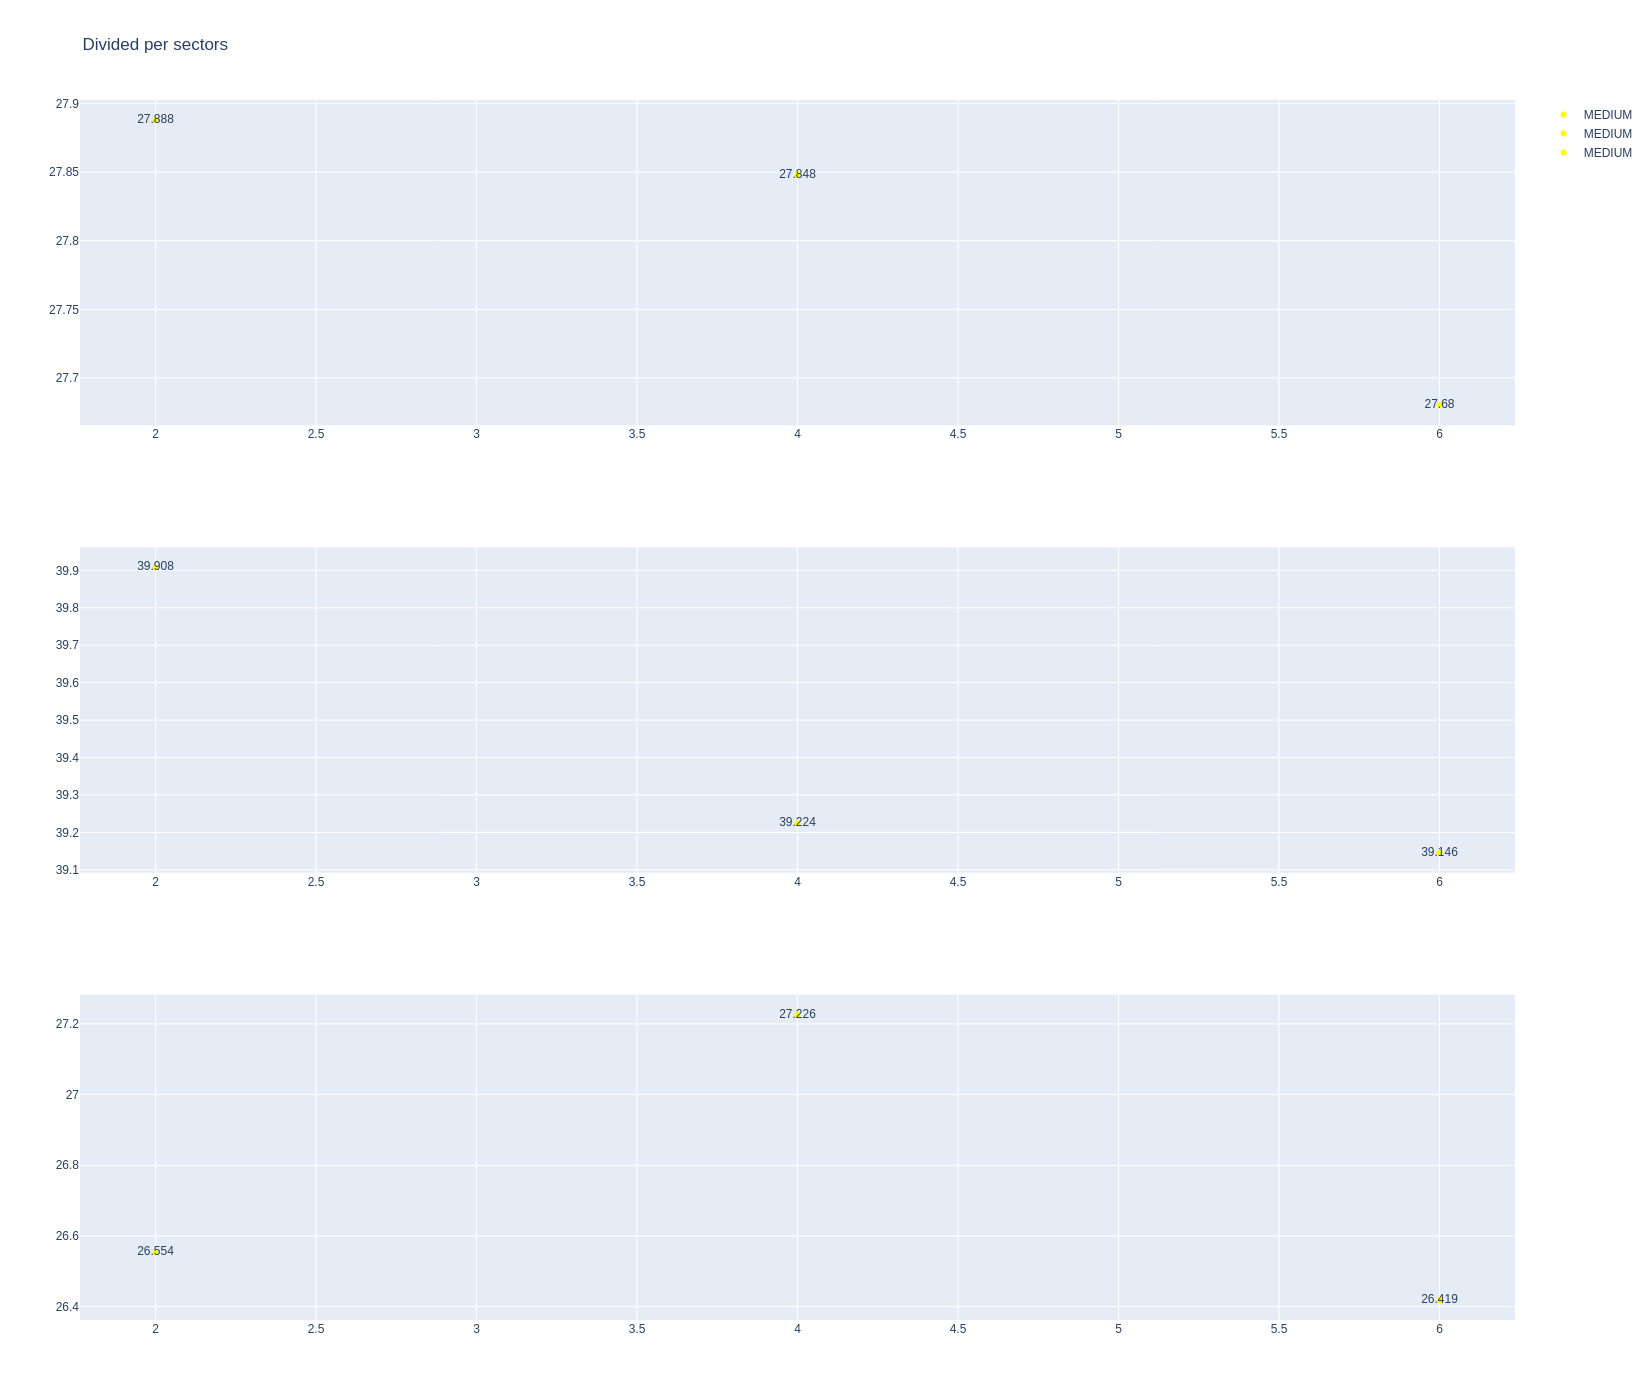

In [77]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [78]:
data = libraryDataF1.getinfolongruns(jointables2,87,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


full_name compound                        date_start  lap_number  \
37  Oliver BEARMAN   MEDIUM  2025-10-03T13:05:54.099000+00:00           2   
77  Oliver BEARMAN   MEDIUM  2025-10-03T13:10:08.269000+00:00           4   

    duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
37             27.964             39.493             26.438        93.895  
77             27.715             39.197             26.581        93.493

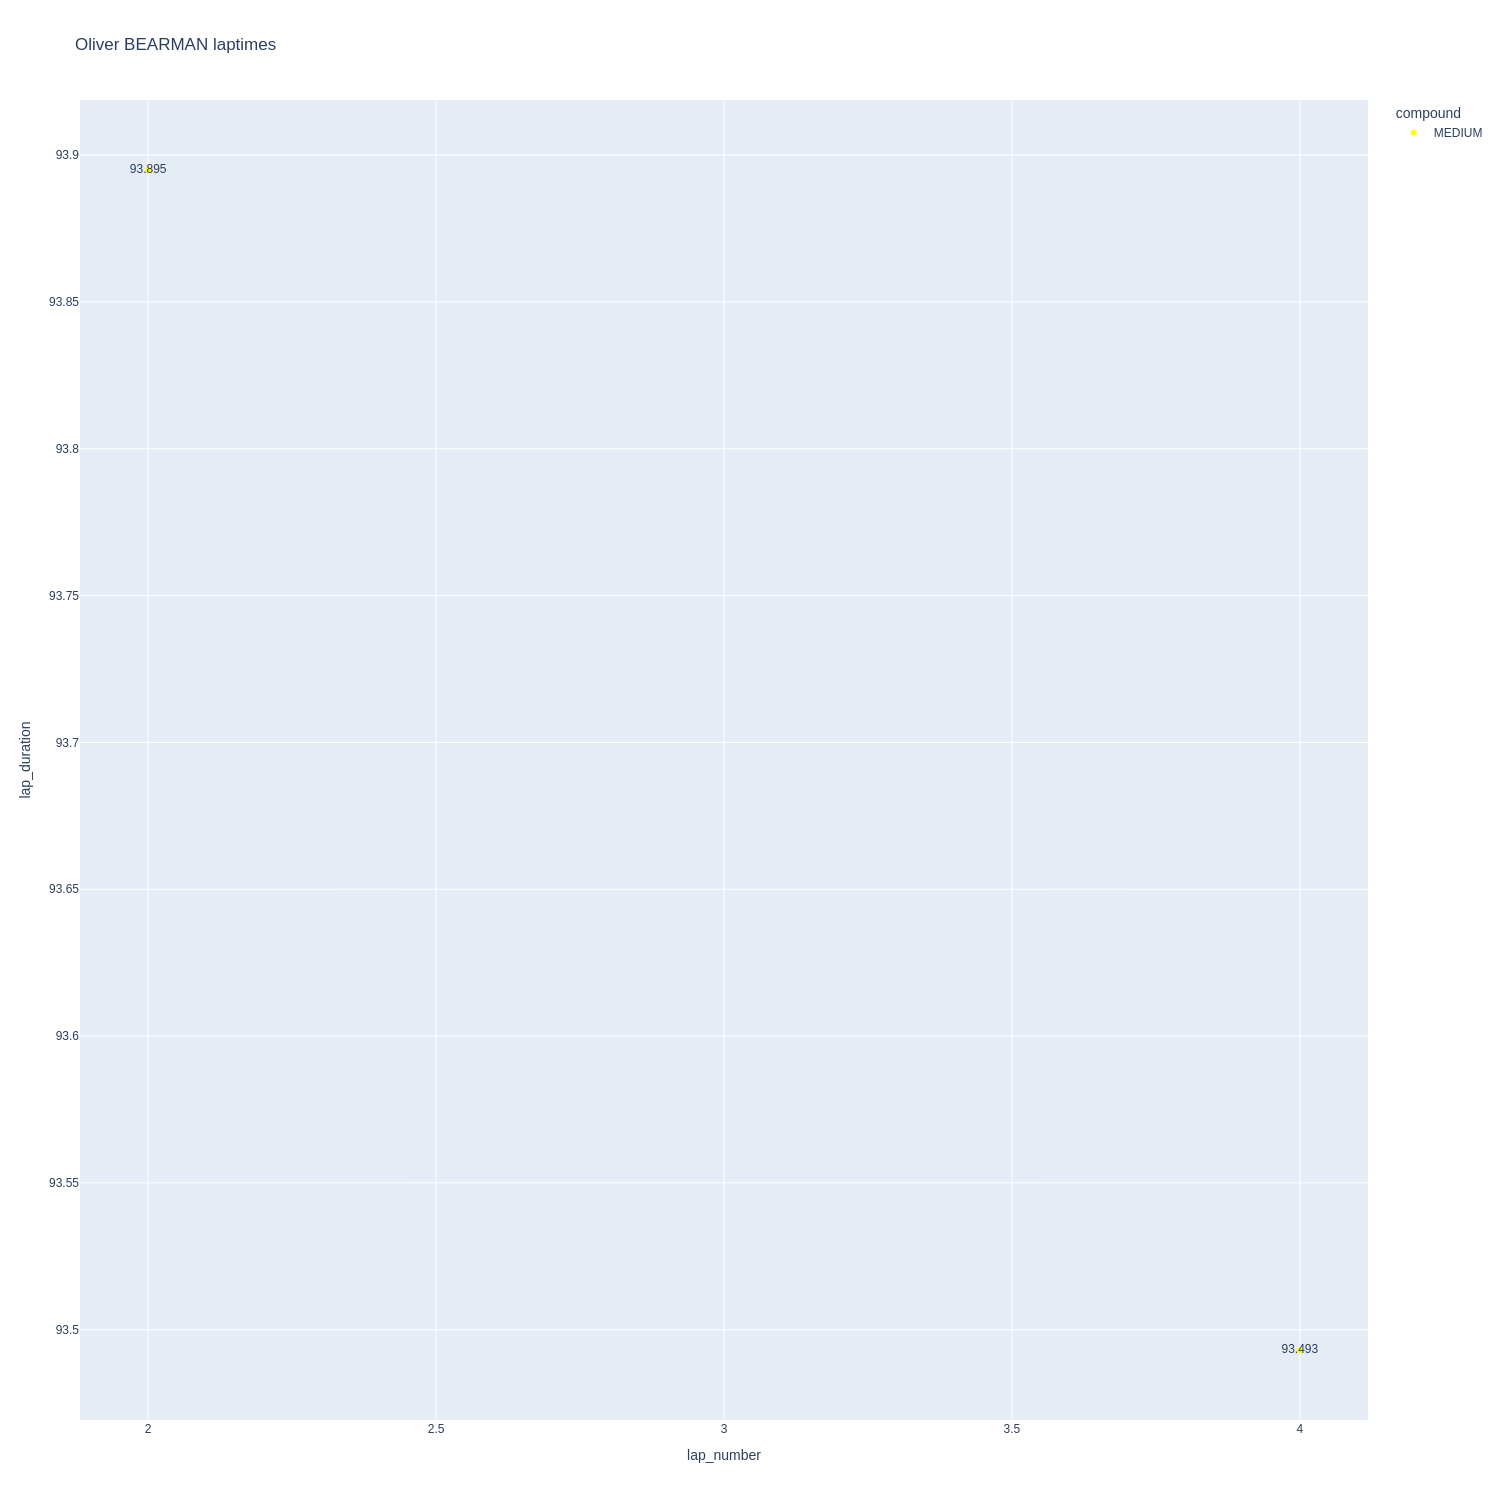

In [79]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

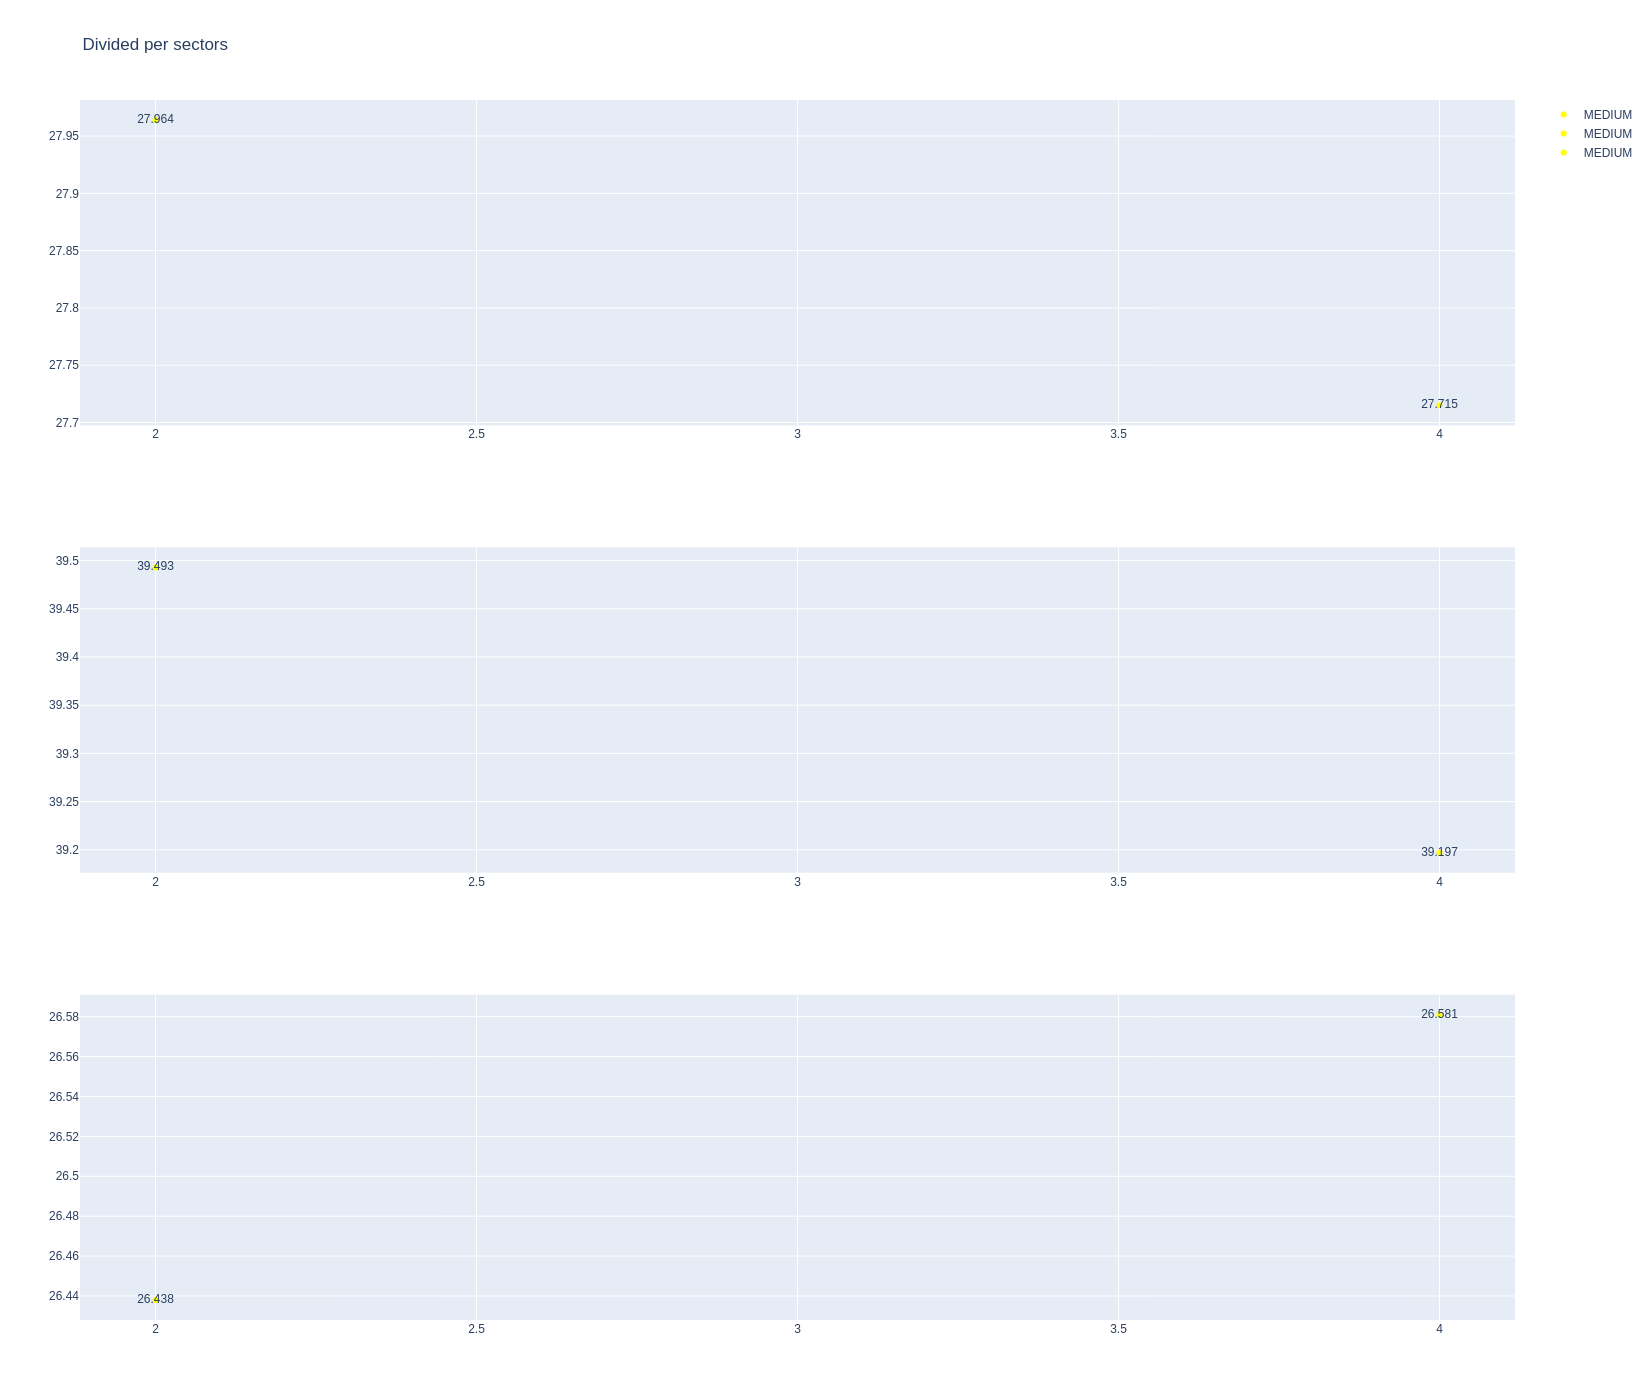

In [80]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [81]:
stintInformation.query('driver_number == 10 or driver_number == 43')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
0          1270         9890             1             43          1        3   
1          1270         9890             1             10          1        3   
6          1270         9890             2             10          4        6   
9          1270         9890             2             43          4        7   
15         1270         9890             3             10          7        8   
21         1270         9890             3             43          8        8   
32         1270         9890             4             43          9       11   
33         1270         9890             4             10          9       11   
50         1270         9890             5             10         12       14   
51         1270         9890             5             43         12       14   
66         1270         9890             6             10         15       20   
67         1270         9890             6             43         15       20   

   compound  tyre_age_at_start  
0    MEDIUM                  0  
1    MEDIUM                  0  
6    MEDIUM                  3  
9    MEDIUM                  0  
15   MEDIUM                  6  
21   MEDIUM                  7  
32     SOFT                  0  
33     SOFT                  0  
50     SOFT                  3  
51     SOFT                  3  
66     SOFT                  6  
67     SOFT                  6

In [82]:
data =libraryDataF1.getinfolongruns(jointables2,43,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
105  Franco COLAPINTO   MEDIUM  2025-10-03T13:12:51.692000+00:00           6   
215  Franco COLAPINTO     SOFT  2025-10-03T13:49:01.401000+00:00          13   
279  Franco COLAPINTO     SOFT  2025-10-03T13:56:01.660000+00:00          16   
312  Franco COLAPINTO     SOFT  2025-10-03T13:59:31.852000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
105             27.628             39.586             26.753        93.967  
215             27.425             39.139             26.575        93.139  
279             27.229             38.860             27.747        93.836  
312             28.133             39.734             27.408        95.275

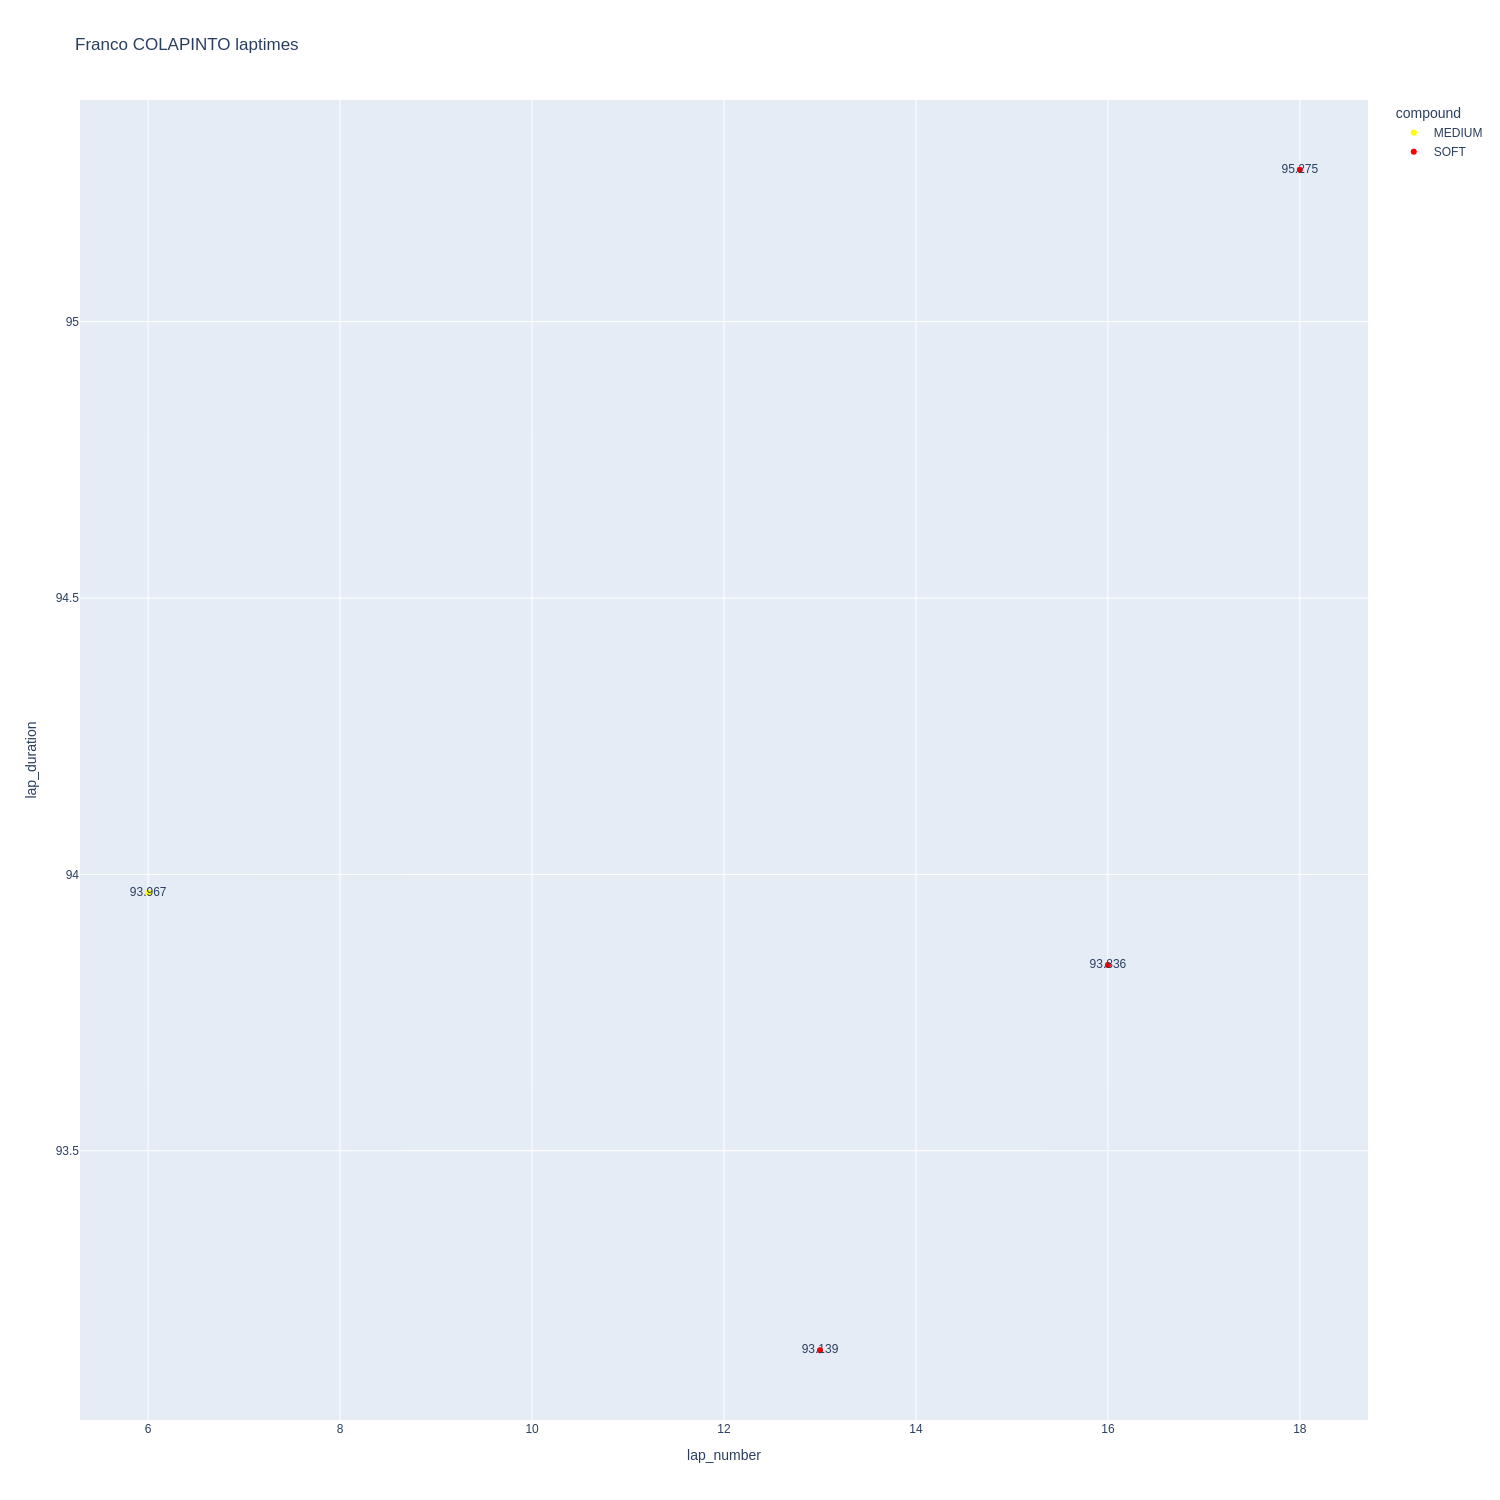

In [83]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

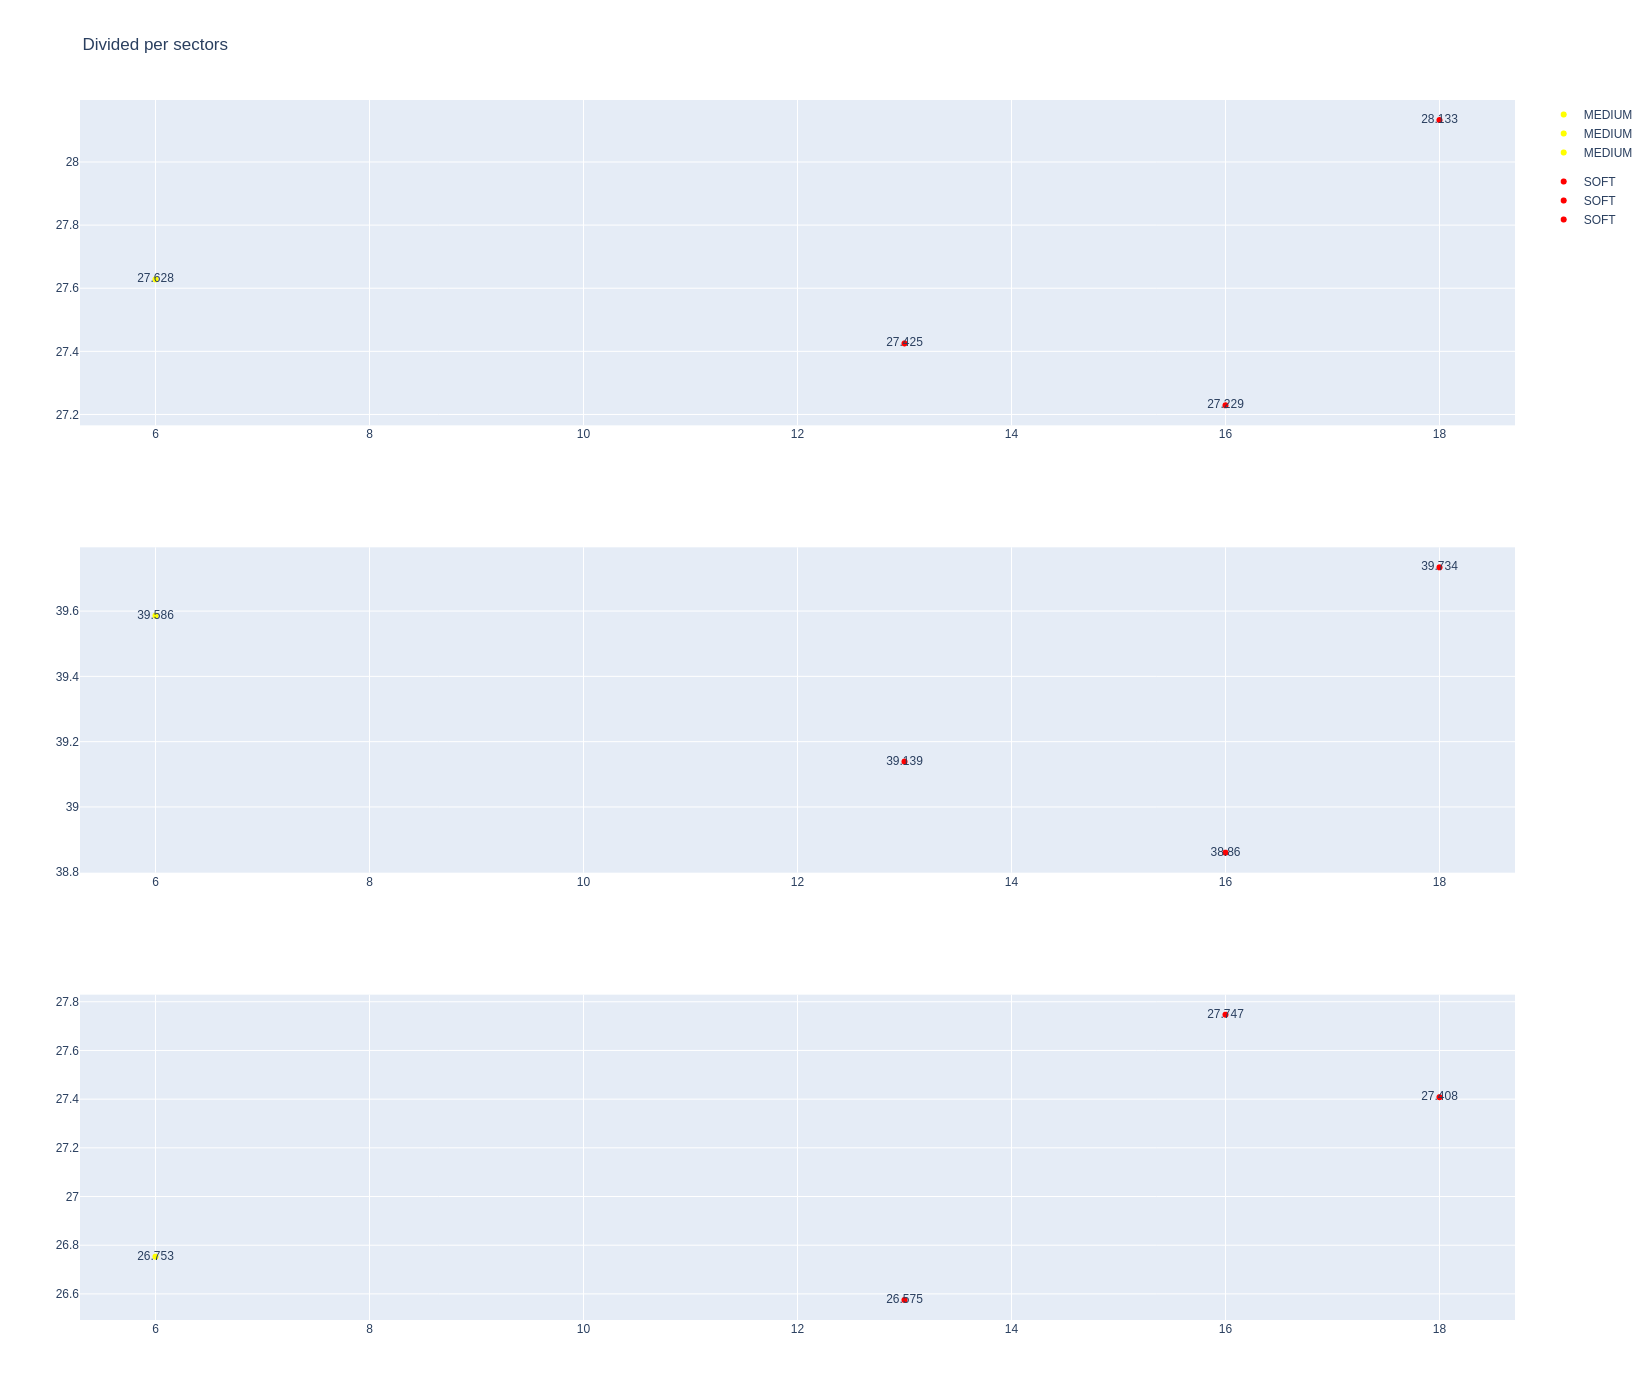

In [84]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [85]:
data = libraryDataF1.getinfolongruns(jointables2,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
23   Pierre GASLY   MEDIUM  2025-10-03T13:04:27.729000+00:00           2   
86   Pierre GASLY   MEDIUM  2025-10-03T13:11:00.740000+00:00           5   
217  Pierre GASLY     SOFT  2025-10-03T13:49:12.082000+00:00          13   
309  Pierre GASLY     SOFT  2025-10-03T13:59:17.867000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
23              27.772             40.018             26.974        94.764  
86              27.777             39.146             26.616        93.539  
217             27.316             39.477             26.370        93.163  
309             28.322             40.392             27.015        95.729

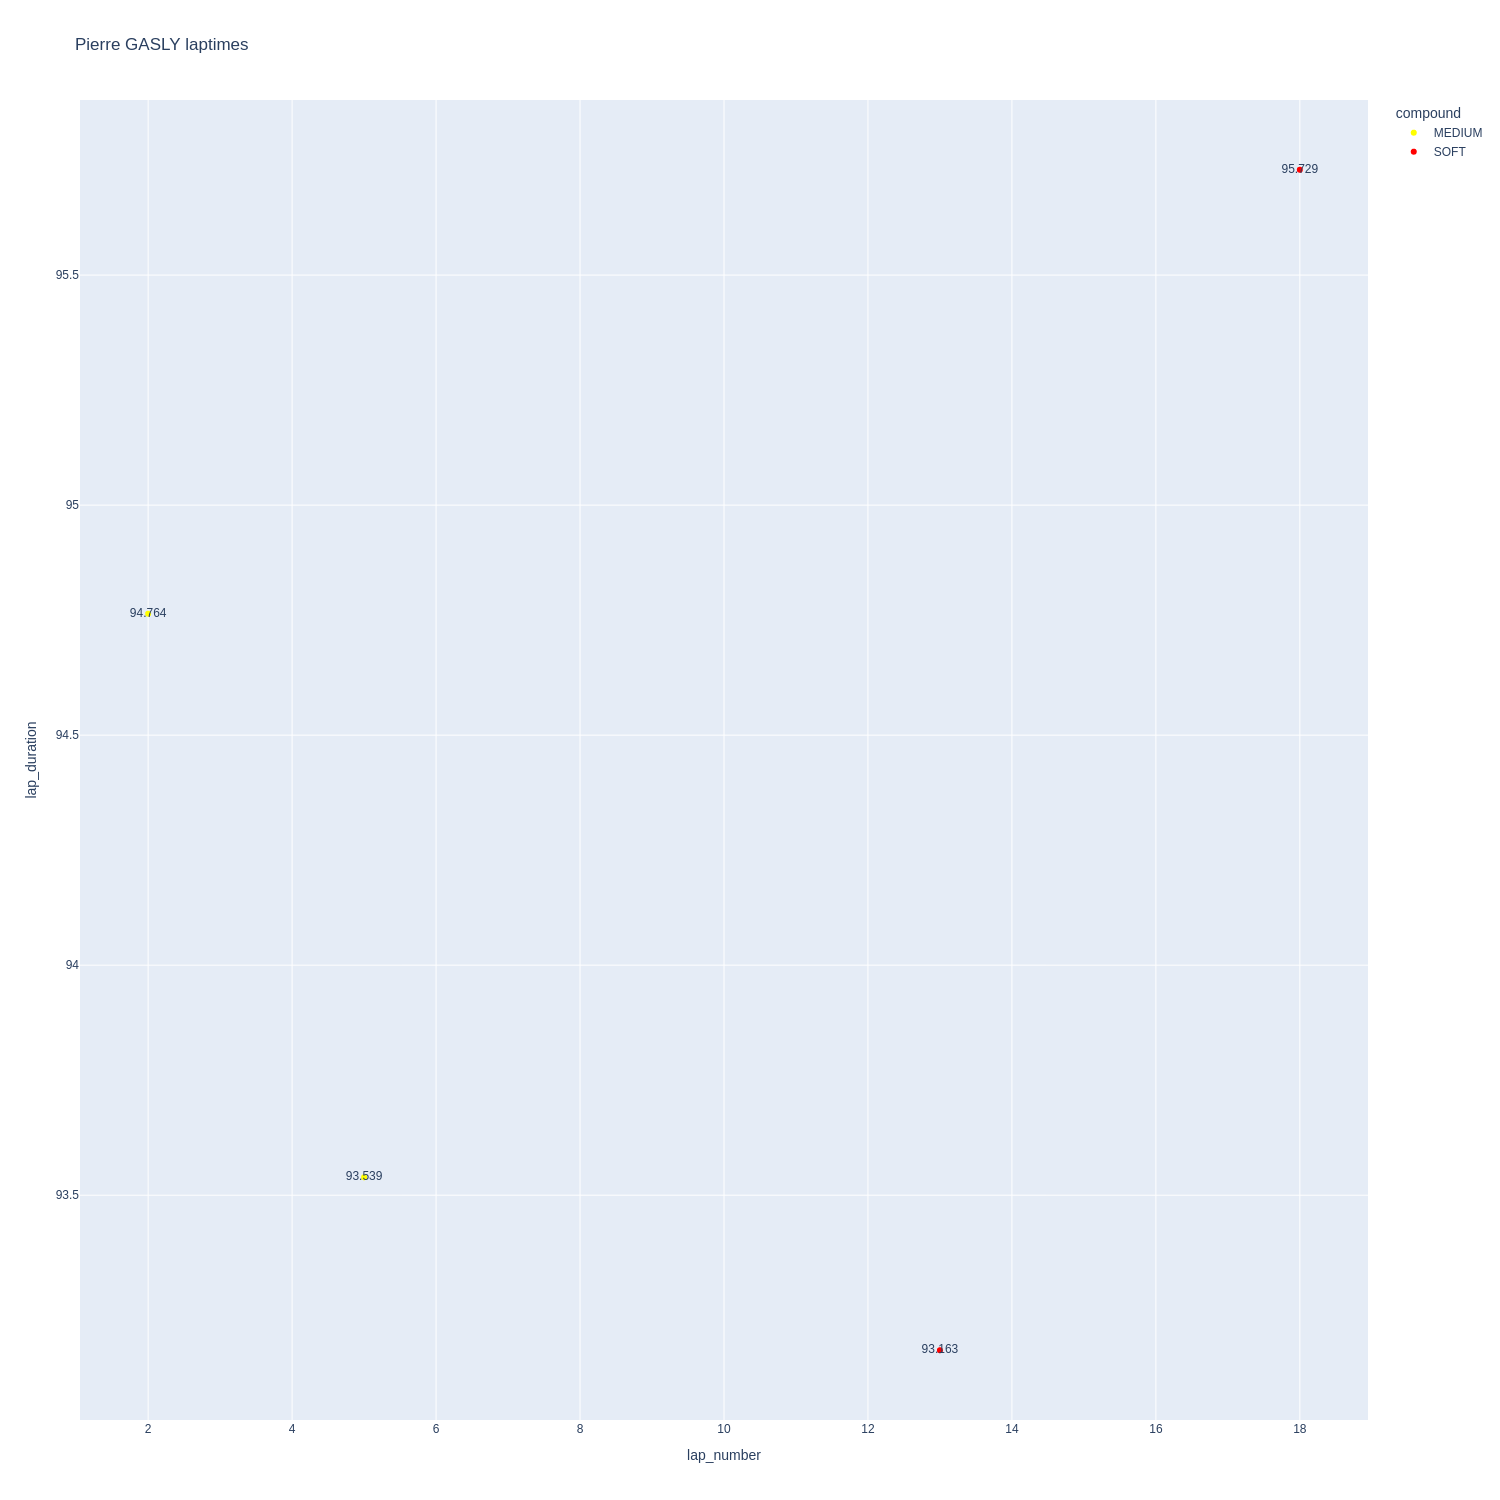

In [86]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

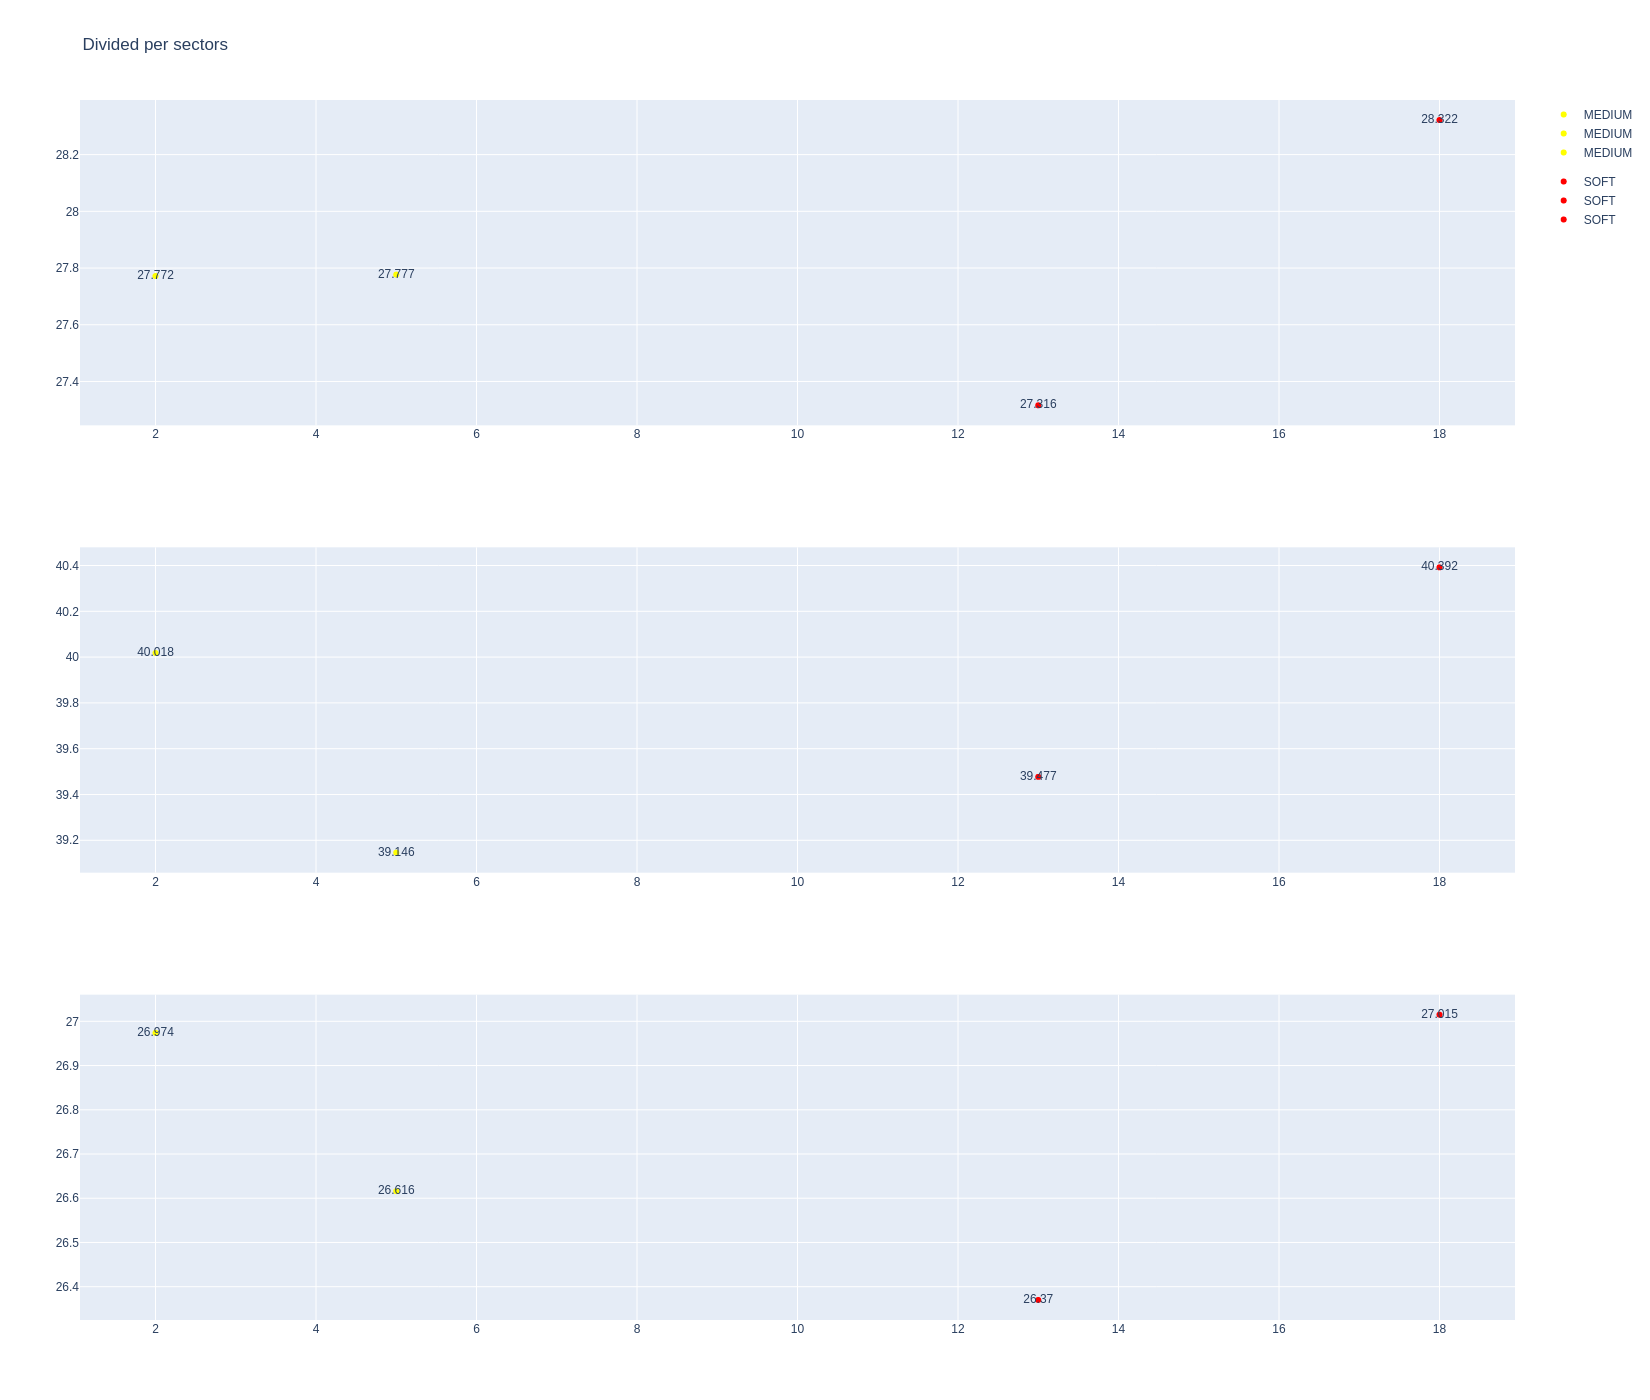

In [87]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [88]:
stintInformation.query('driver_number == 55 or driver_number == 23')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
17         1270         9890             1             55          1        8   
18         1270         9890             1             23          1        8   
37         1270         9890             2             55          9       11   
38         1270         9890             2             23          9       11   
58         1270         9890             3             23         12       19   
59         1270         9890             3             55         12       20   

   compound  tyre_age_at_start  
17   MEDIUM                  0  
18   MEDIUM                  0  
37     SOFT                  0  
38   MEDIUM                  8  
58     SOFT                  0  
59     SOFT                  3

In [89]:
data = libraryDataF1.getinfolongruns(jointables2,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
40   Alexander ALBON   MEDIUM  2025-10-03T13:06:01.872000+00:00           2   
79   Alexander ALBON   MEDIUM  2025-10-03T13:10:18.947000+00:00           4   
117  Alexander ALBON   MEDIUM  2025-10-03T13:14:21.548000+00:00           6   
177  Alexander ALBON   MEDIUM  2025-10-03T13:31:53.303000+00:00          10   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
40              28.003             40.119             26.915        95.037  
79              27.699             39.498             27.721        94.918  
117             27.699             39.223             26.360        93.282  
177             27.575             39.194             26.421        93.190

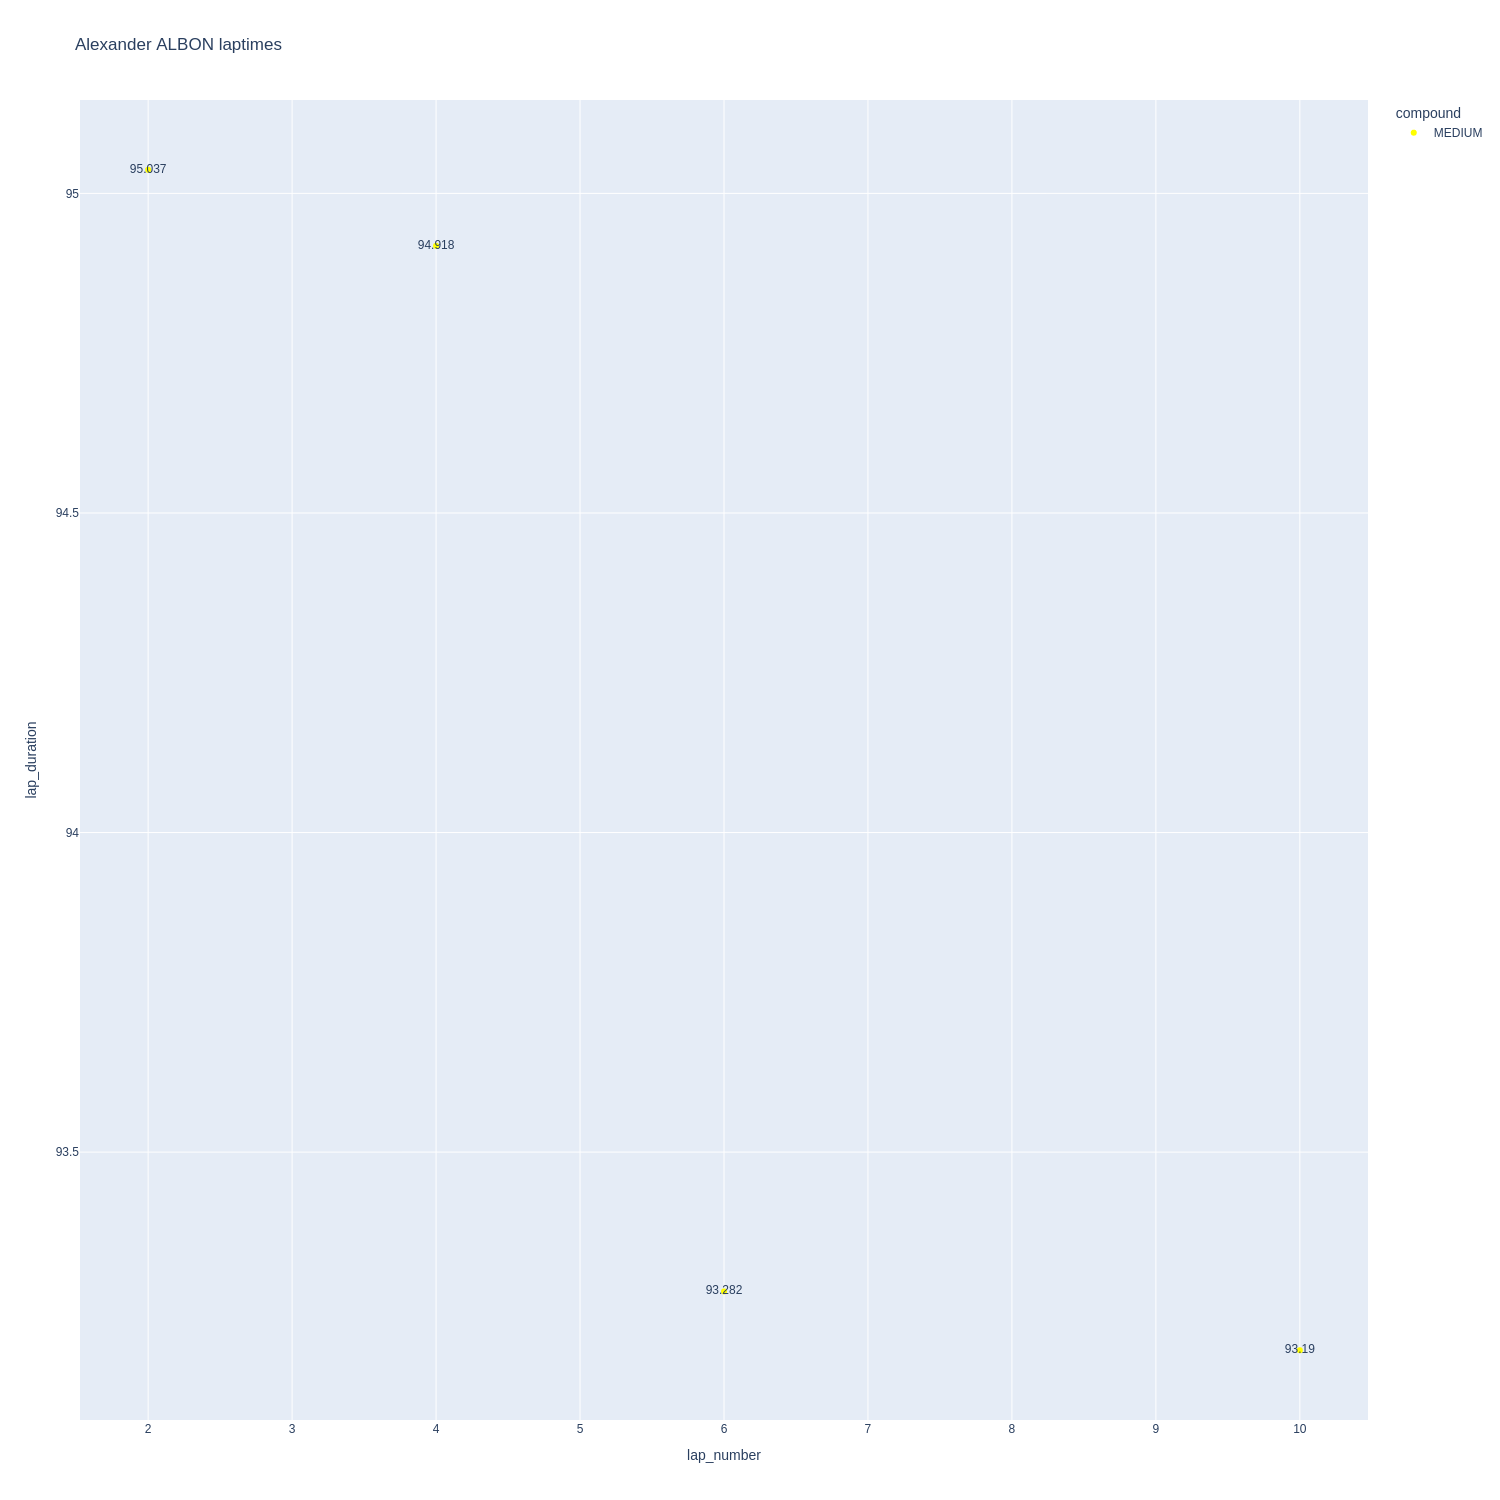

In [90]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

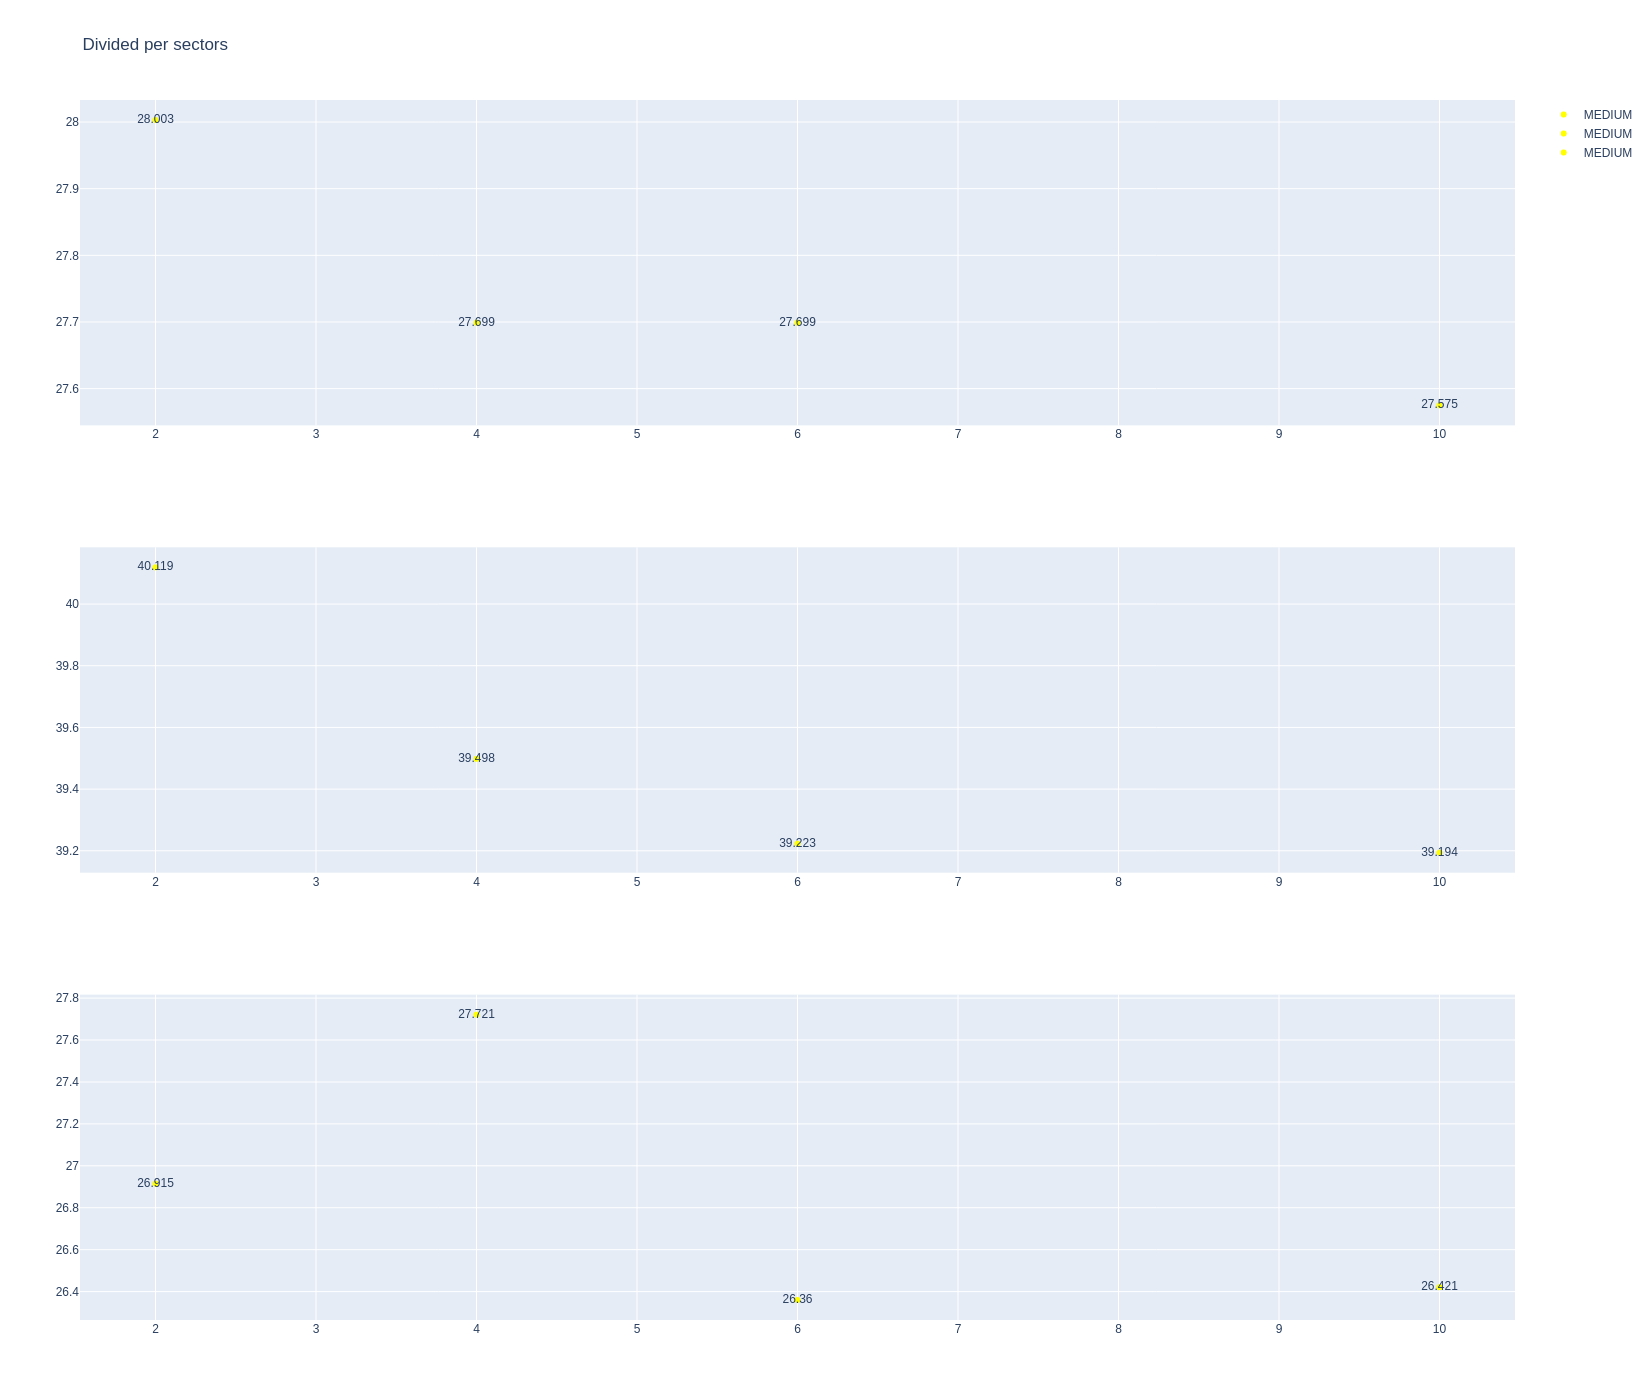

In [91]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [92]:
data= libraryDataF1.getinfolongruns(jointables2,55,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
27   Carlos SAINZ   MEDIUM  2025-10-03T13:04:57.363000+00:00           2   
291  Carlos SAINZ     SOFT  2025-10-03T13:57:23.792000+00:00          17   
308  Carlos SAINZ     SOFT  2025-10-03T13:58:58.785000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
27              27.625             39.772             26.421        93.818  
291             28.356             39.891             26.803        95.050  
308             28.167             39.770             26.667        94.604

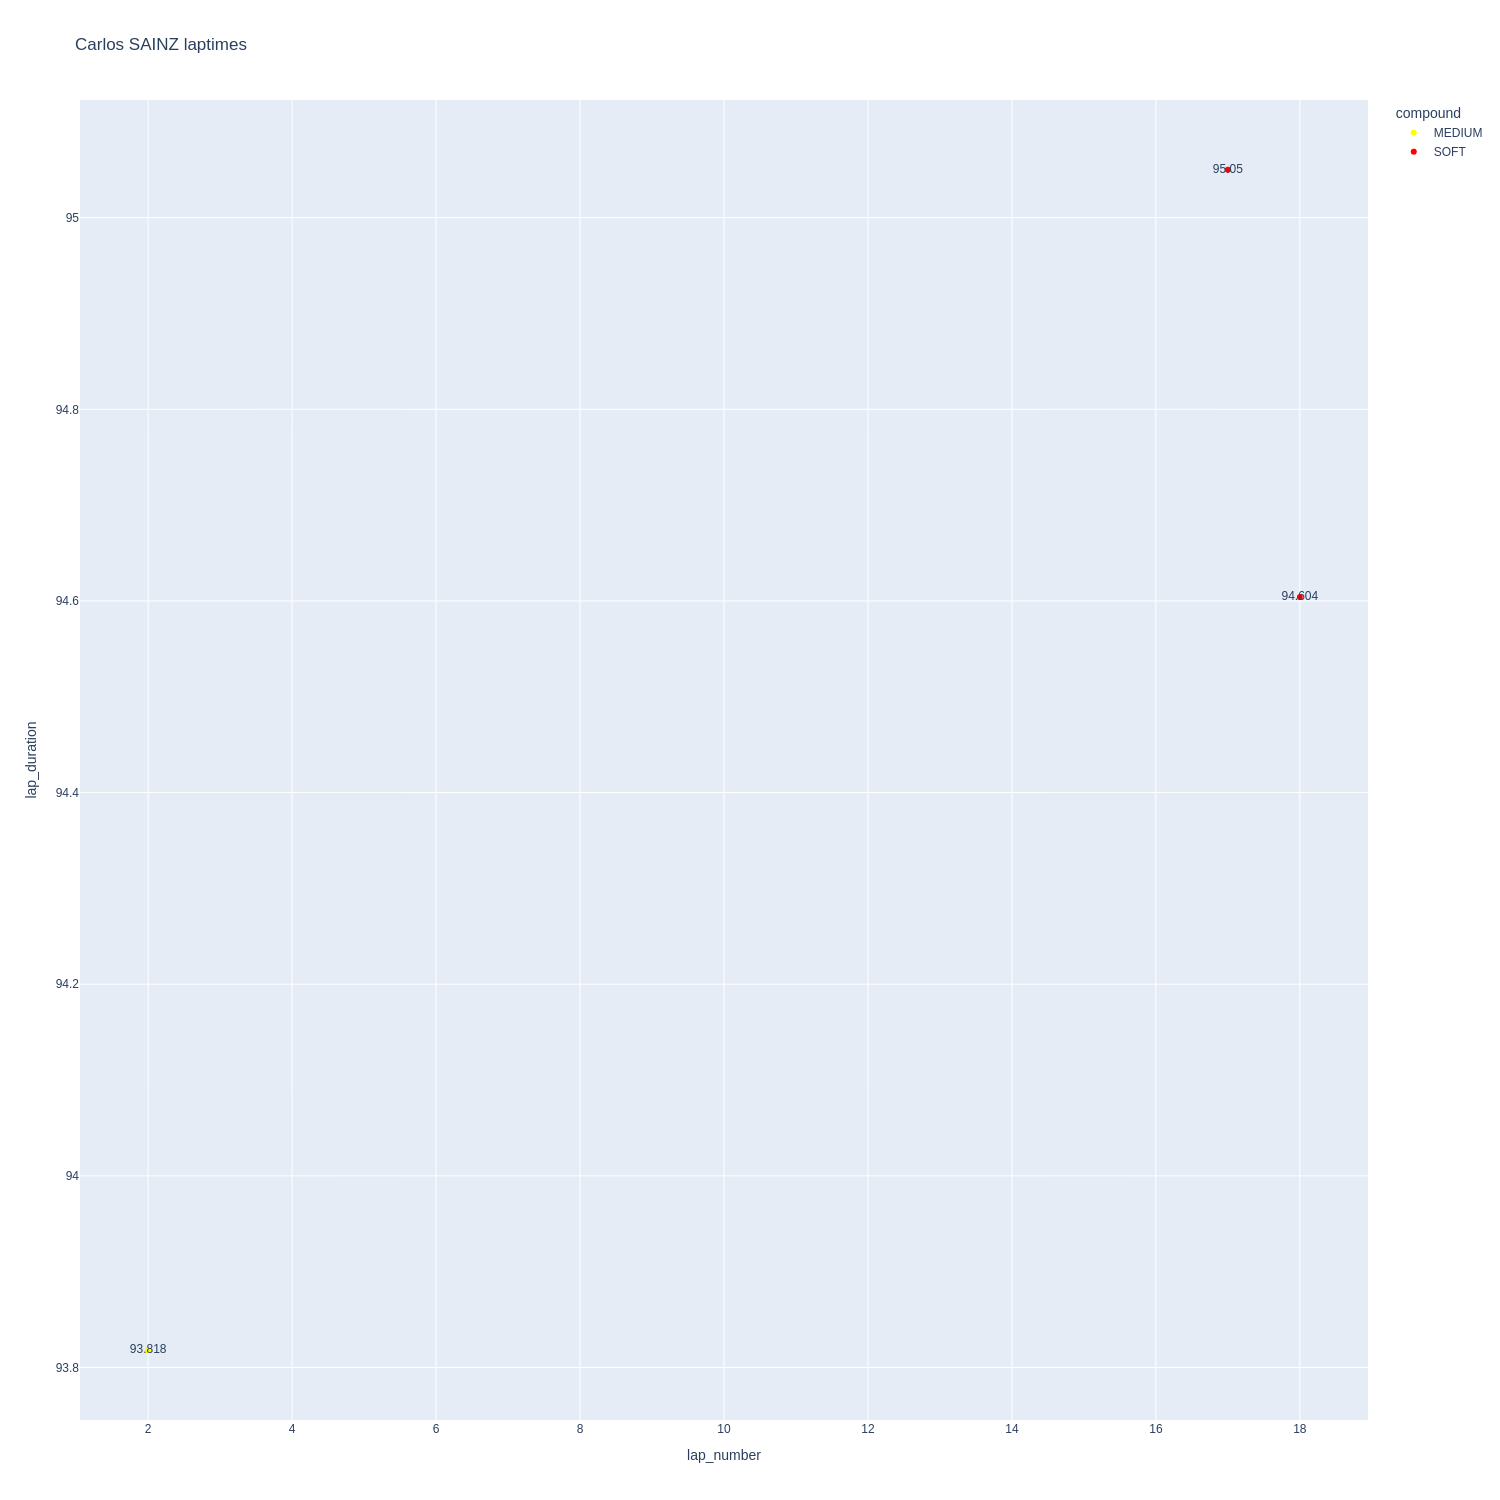

In [93]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

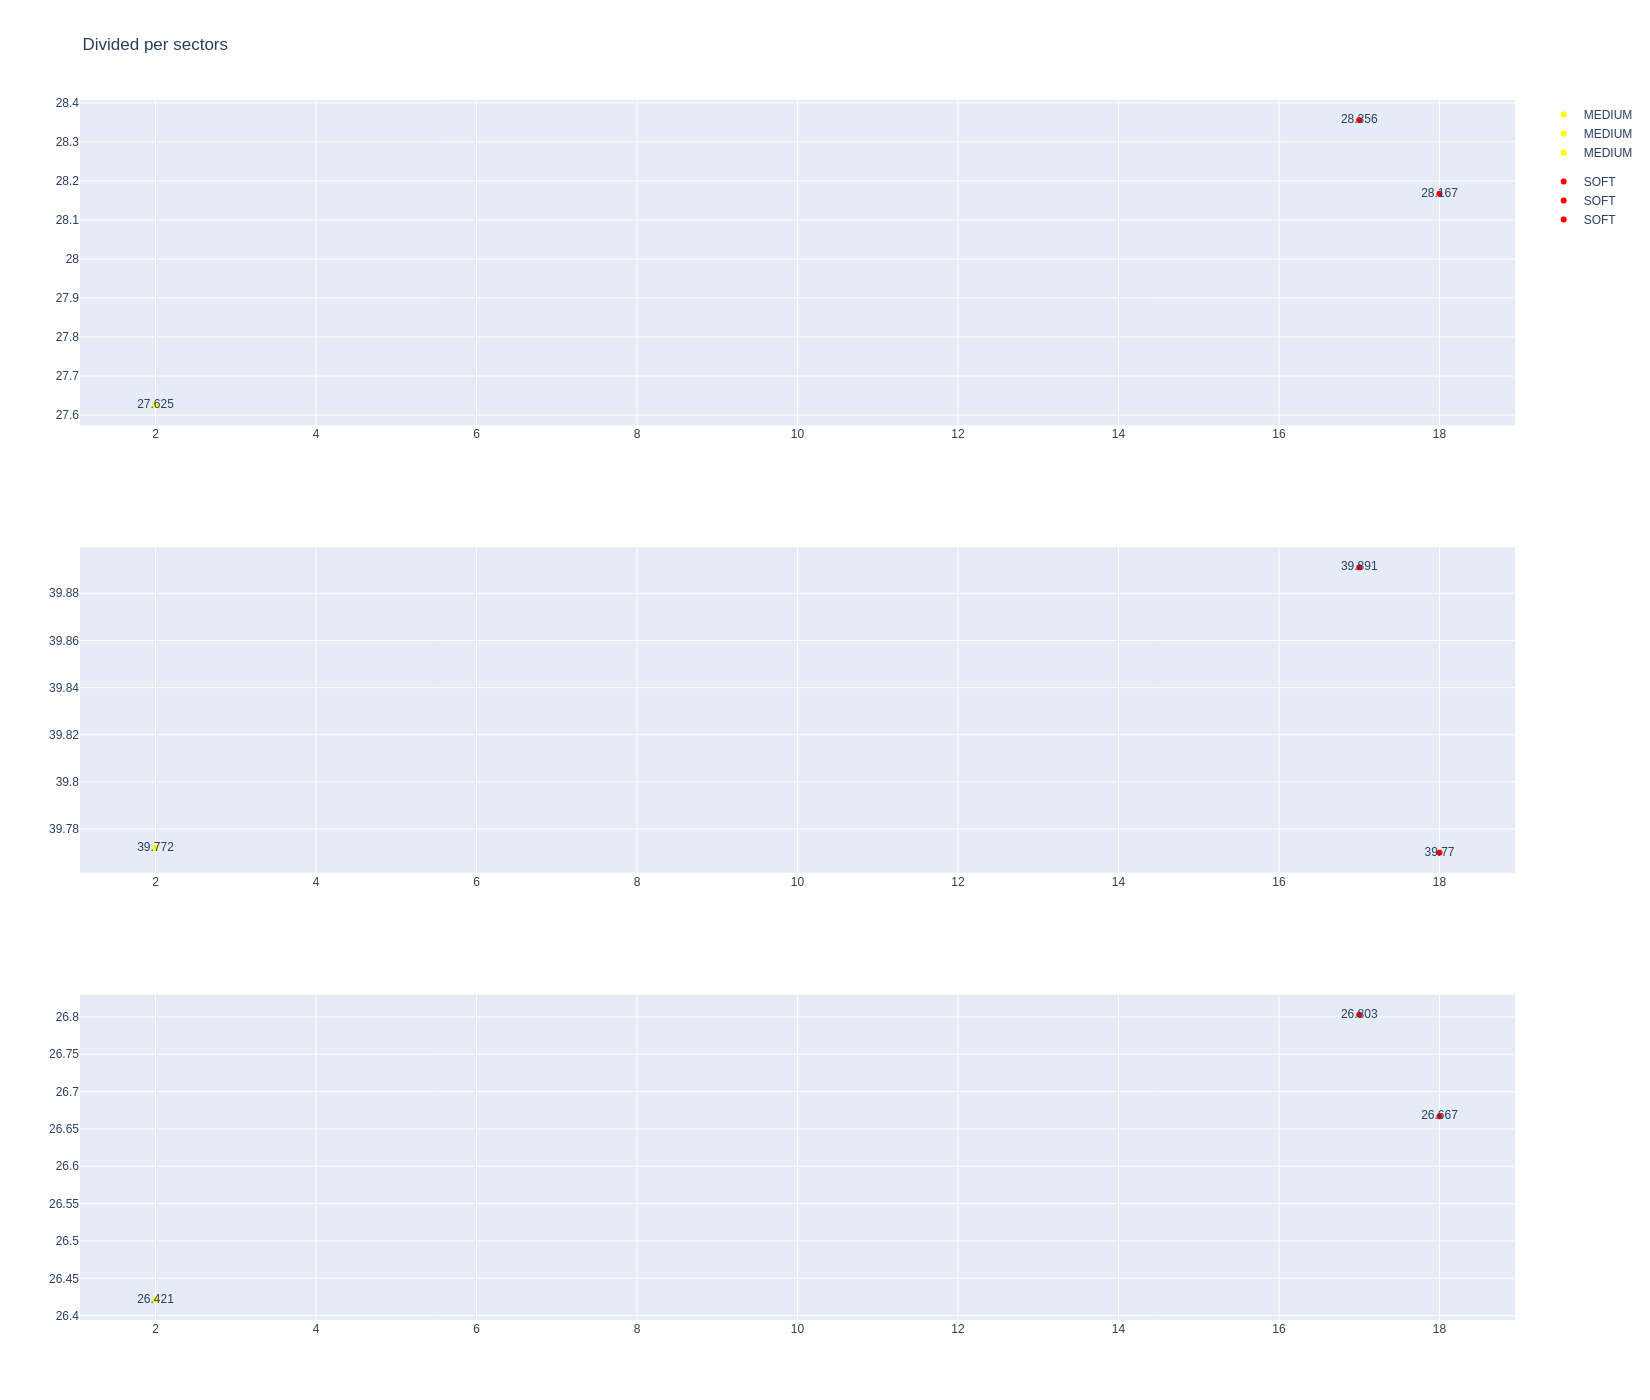

In [94]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [95]:
stintInformation.query('driver_number == 27 or driver_number == 5')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
10         1270         9890             1              5          1        7   
16         1270         9890             1             27          1        7   
25         1270         9890             2              5          8        8   
35         1270         9890             3              5          9       10   
36         1270         9890             2             27          8       10   
49         1270         9890             4              5         11       12   
71         1270         9890             3             27         11       19   
73         1270         9890             5              5         13       19   

   compound  tyre_age_at_start  
10   MEDIUM                  0  
16   MEDIUM                  0  
25   MEDIUM                  7  
35     SOFT                  0  
36     SOFT                  0  
49     SOFT                  2  
71     SOFT                  3  
73     SOFT                  0

In [96]:
data = libraryDataF1.getinfolongruns(jointables2,27,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
17  Nico HULKENBERG   MEDIUM  2025-10-03T13:03:40.355000+00:00           2   
58  Nico HULKENBERG   MEDIUM  2025-10-03T13:07:52.262000+00:00           4   
94  Nico HULKENBERG   MEDIUM  2025-10-03T13:11:45.196000+00:00           6   

    duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
17             27.938             39.321             26.529        93.788  
58             27.809             39.221             26.322        93.352  
94             27.577             39.027             26.772        93.376

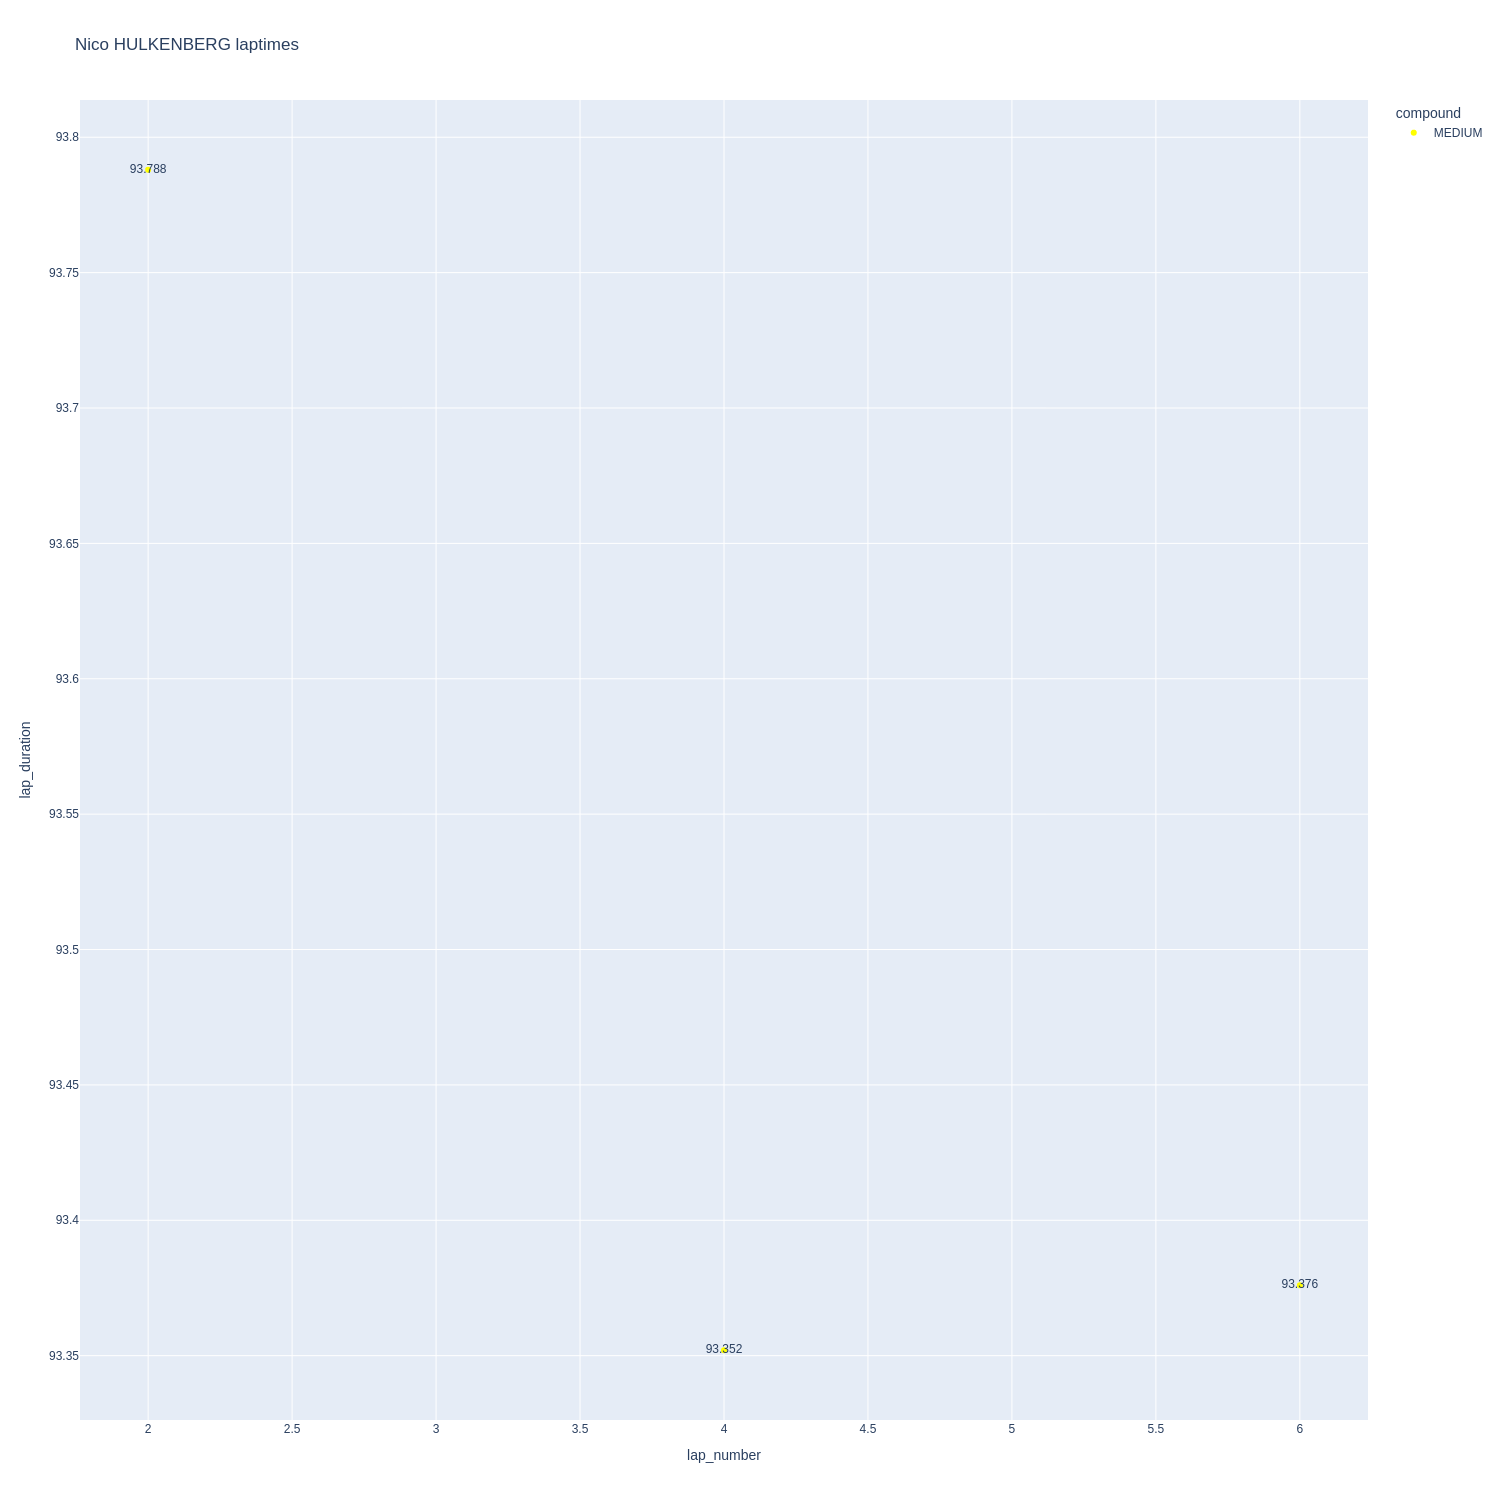

In [97]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

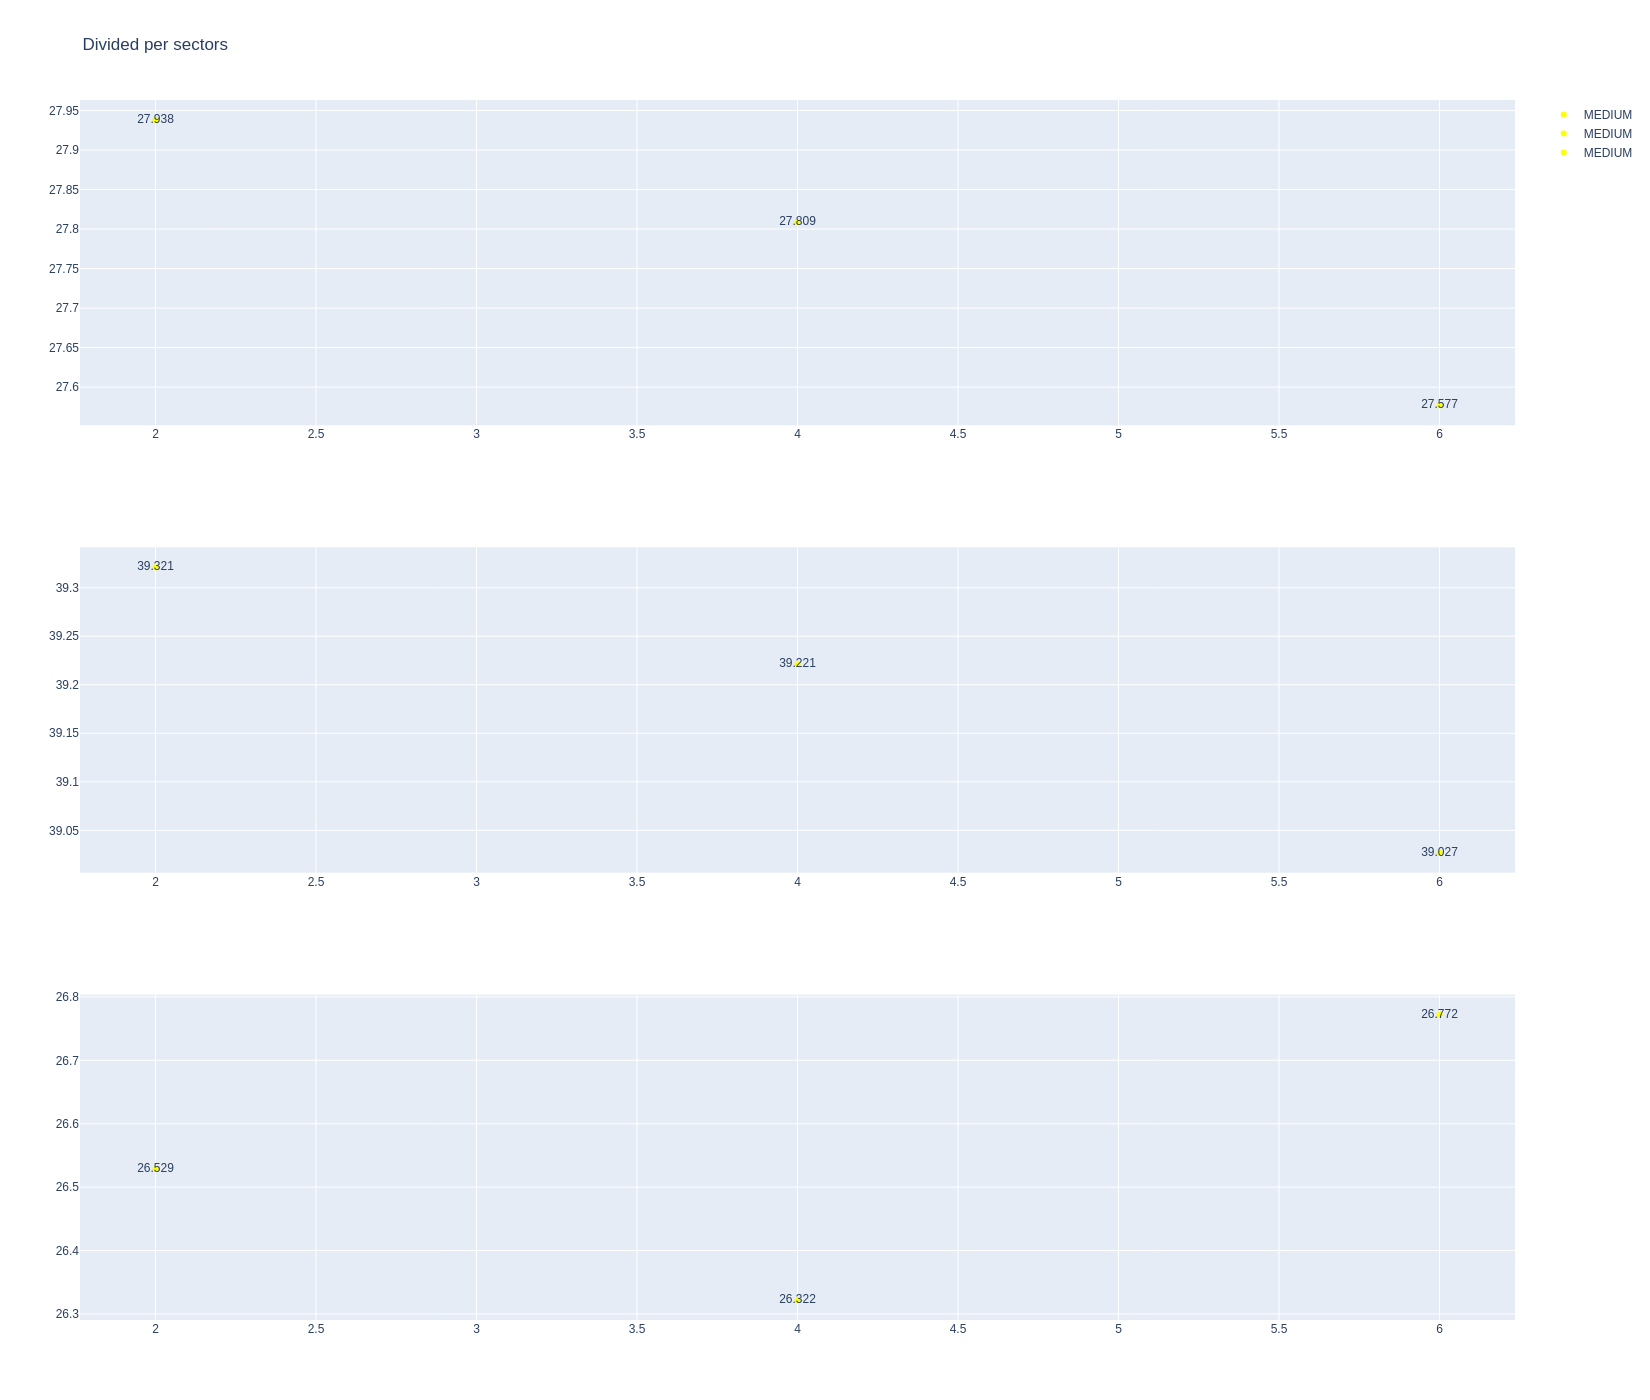

In [98]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [99]:
data = libraryDataF1.getinfolongruns(jointables2,5,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
50  Gabriel BORTOLETO   MEDIUM  2025-10-03T13:07:20.763000+00:00           3   
87  Gabriel BORTOLETO   MEDIUM  2025-10-03T13:11:15.474000+00:00           5   

    duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
50             27.822             39.589             26.385        93.796  
87             27.645             39.387             26.282        93.314

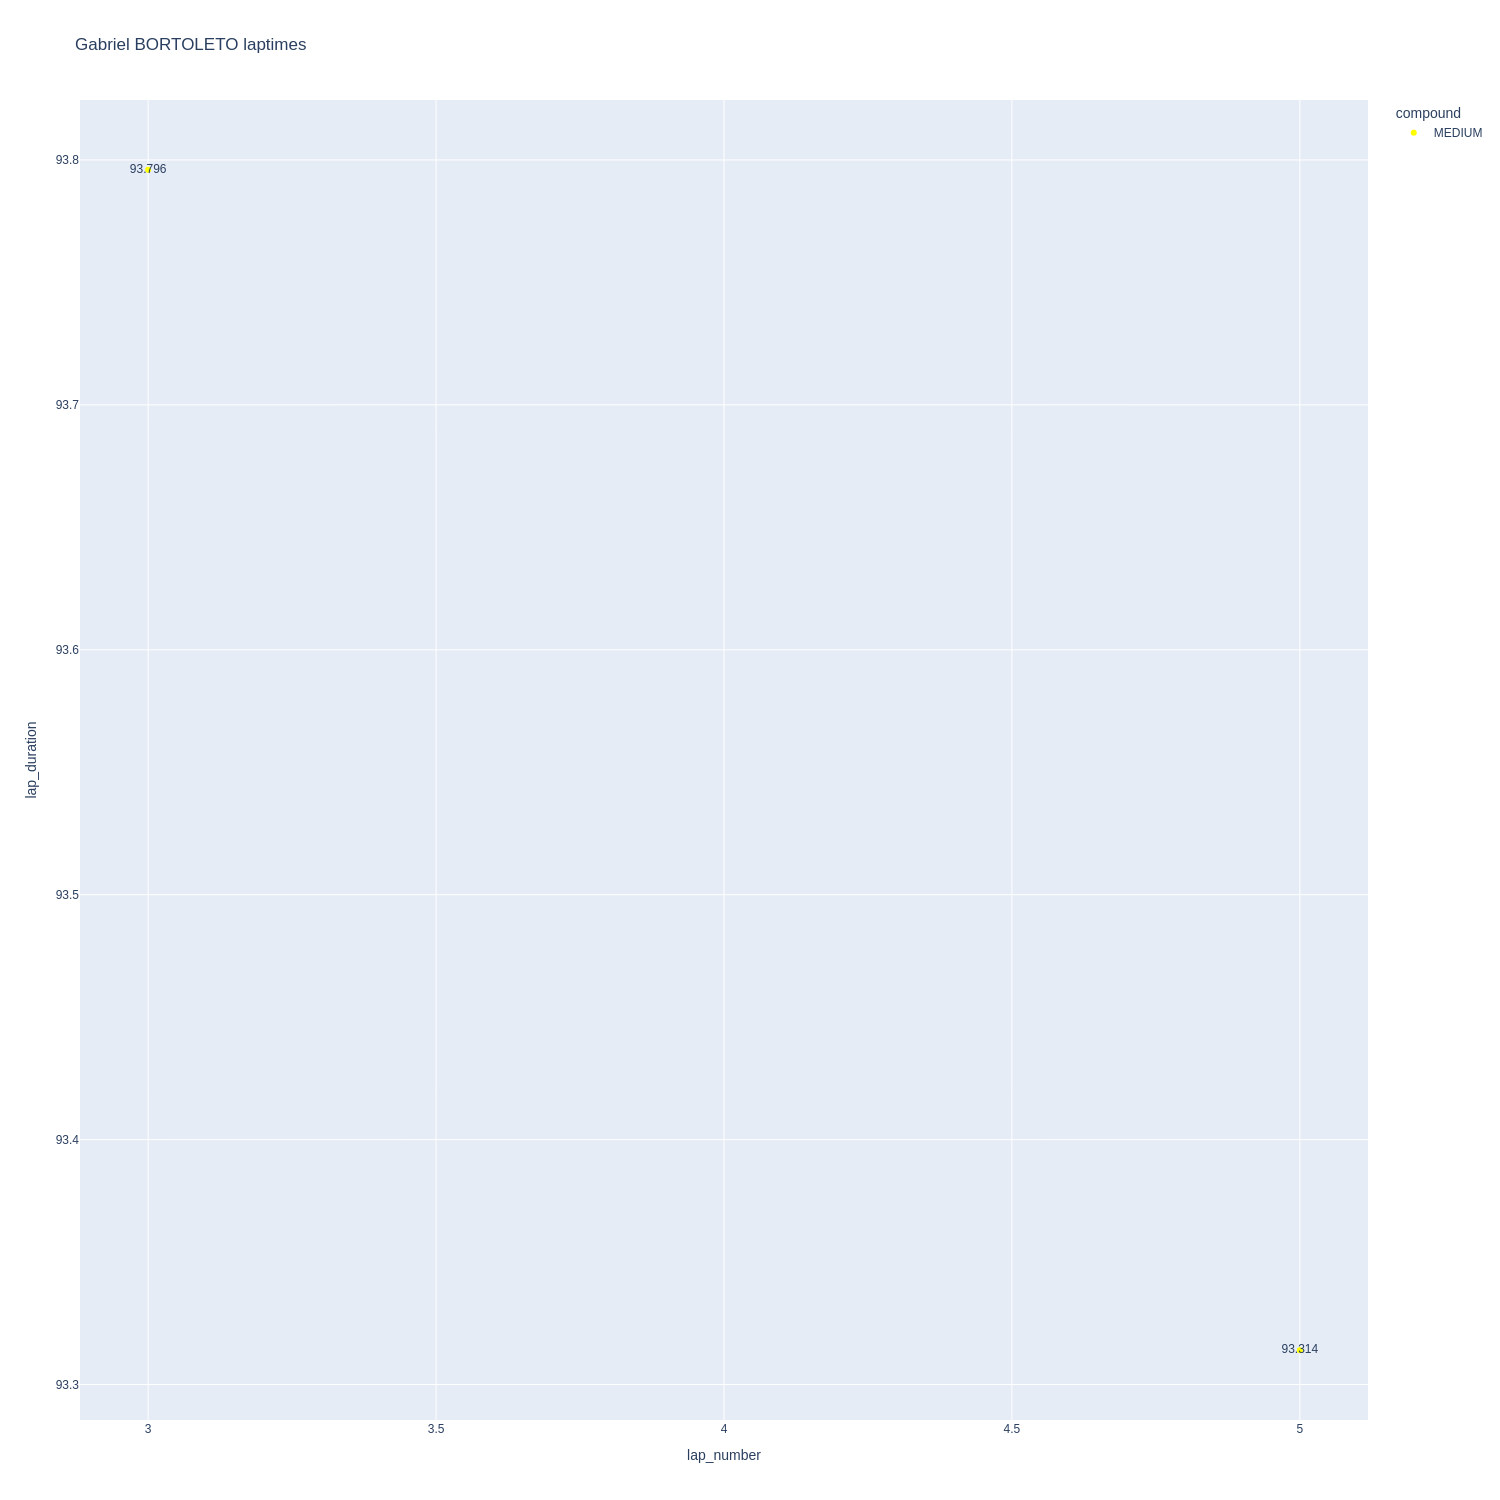

In [100]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

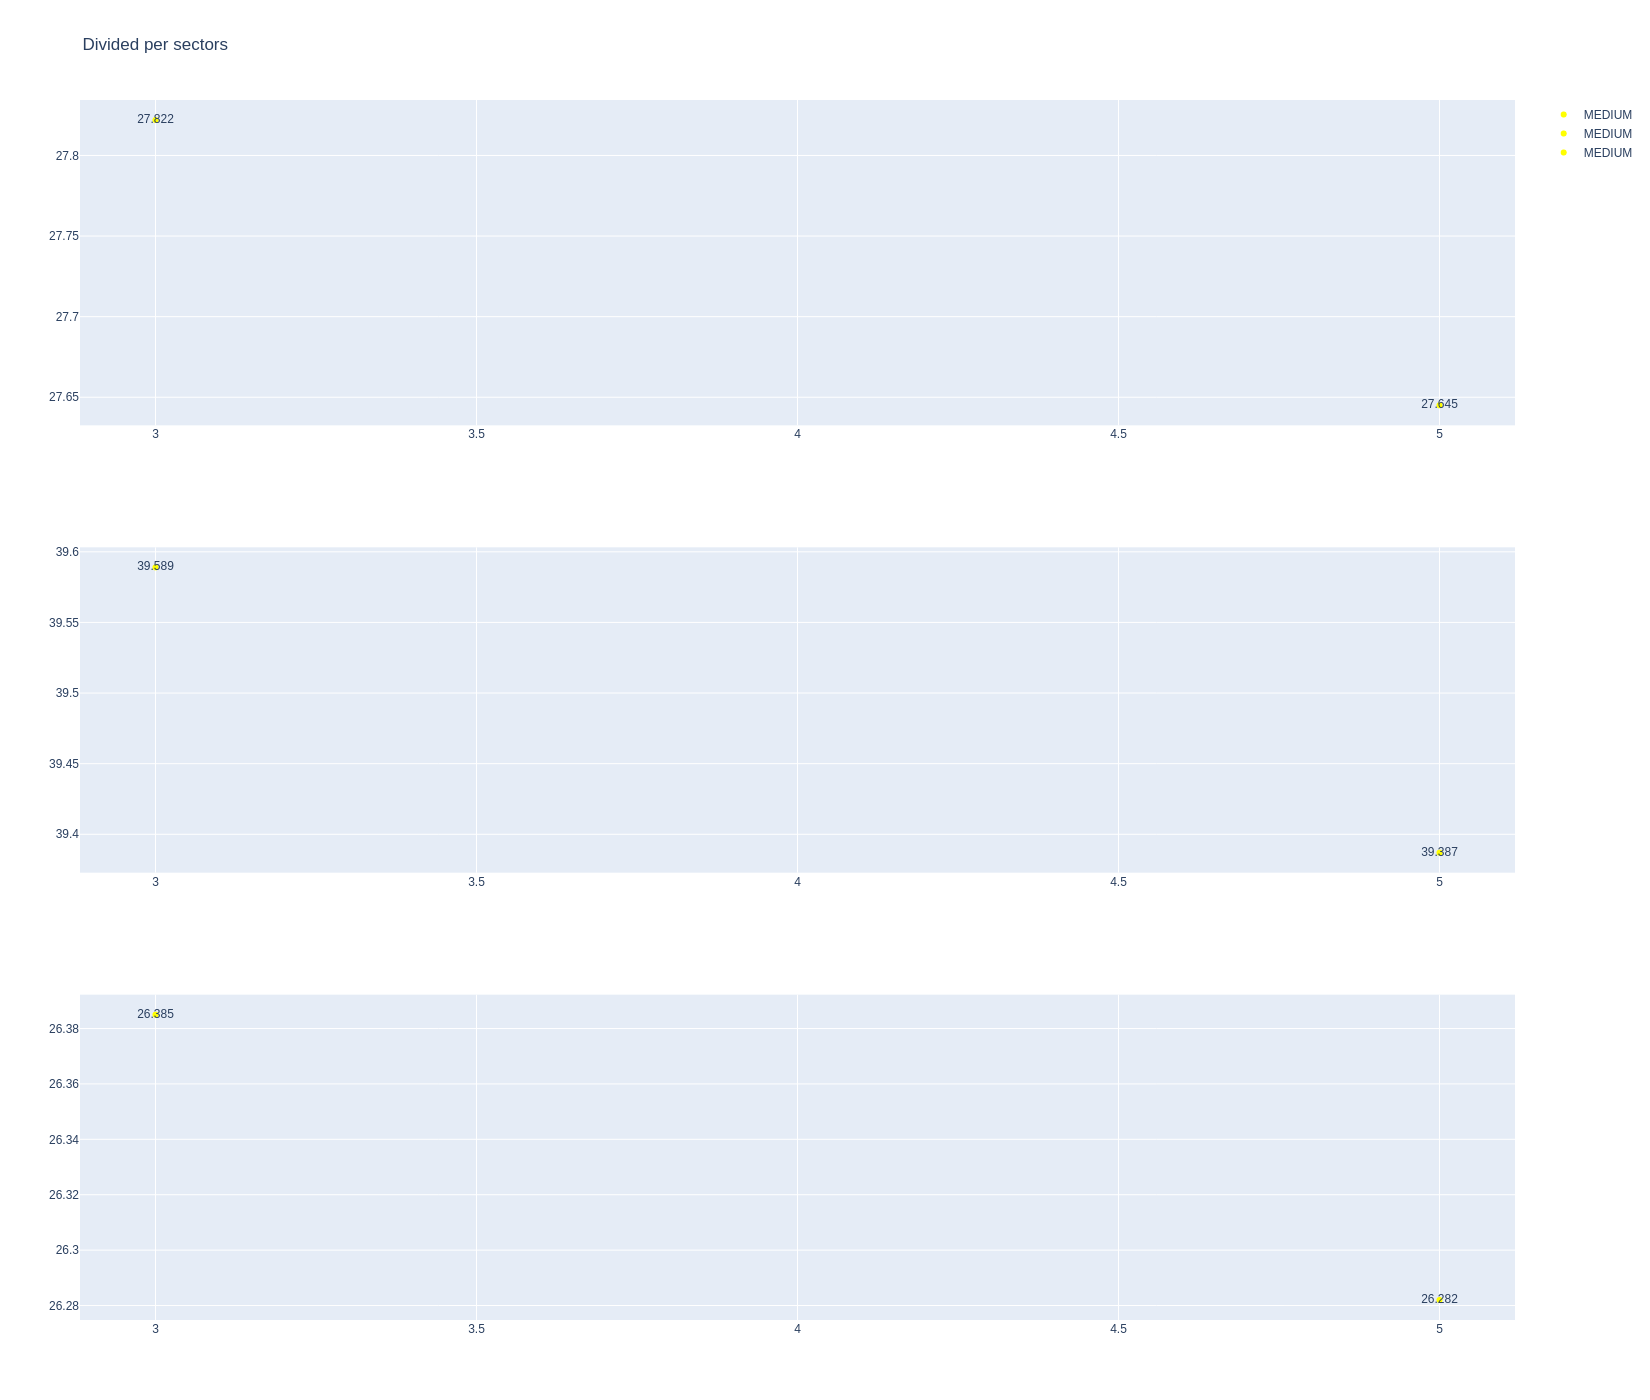

In [101]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Long runs mean for each driver
It seems that SOFT could be used for 15-17 laps and it could be a good option to start. HARD is slow but it could be used for a medium stint(2/3) but it seems that MEDIUM is better
Haas, Aston and RB suffer in race pace

In [102]:
longrun_data = libraryDataF1.obtainLongRunData(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Sorted by lap duration

In [103]:
sorted_laps = pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3'])

In [104]:
sorted_laps.sort_values(by='lap_duration',ascending=True)

driver compound  lap_duration    sector1    sector2    sector3
5     Charles LECLERC   MEDIUM     93.203000  27.675000  39.238000  26.290000
14     George RUSSELL   MEDIUM     93.231000  27.523000  38.845000  26.863000
9     Nico HULKENBERG   MEDIUM     93.505333  27.774667  39.189667  26.541000
1   Gabriel BORTOLETO   MEDIUM     93.555000  27.733500  39.488000  26.333500
16     Oliver BEARMAN   MEDIUM     93.694000  27.839500  39.345000  26.509500
10        Liam LAWSON   MEDIUM     93.864000  27.846000  39.339000  26.679000
11       Esteban OCON   MEDIUM     93.964333  27.805333  39.426000  26.733000
12   Franco COLAPINTO     SOFT     94.054250  27.603750  39.329750  27.120750
0      Max VERSTAPPEN     SOFT     94.086200  27.975200  39.509200  26.601800
8     Alexander ALBON   MEDIUM     94.106750  27.744000  39.508500  26.854250
15      Oscar PIASTRI     SOFT     94.252600  28.129200  39.575000  26.548400
2        Isack HADJAR   MEDIUM     94.274000  27.505000  39.361000  27.408000
3        Pierre GASLY   MEDIUM     94.298750  27.796750  39.758250  26.743750
7        Yuki TSUNODA   MEDIUM     94.322333  28.054667  39.652000  26.615667
6        Lance STROLL     HARD     94.380667  28.071333  39.853667  26.455667
13       Carlos SAINZ     SOFT     94.490667  28.049333  39.811000  26.630333
4     Fernando ALONSO     HARD     94.585500  27.995500  39.889000  26.701000

##### Sorted by sector 1

In [105]:
sorted_laps.sort_values(by='sector1',ascending=True)[['driver','compound','sector1']]

driver compound    sector1
2        Isack HADJAR   MEDIUM  27.505000
14     George RUSSELL   MEDIUM  27.523000
12   Franco COLAPINTO     SOFT  27.603750
5     Charles LECLERC   MEDIUM  27.675000
1   Gabriel BORTOLETO   MEDIUM  27.733500
8     Alexander ALBON   MEDIUM  27.744000
9     Nico HULKENBERG   MEDIUM  27.774667
3        Pierre GASLY   MEDIUM  27.796750
11       Esteban OCON   MEDIUM  27.805333
16     Oliver BEARMAN   MEDIUM  27.839500
10        Liam LAWSON   MEDIUM  27.846000
0      Max VERSTAPPEN     SOFT  27.975200
4     Fernando ALONSO     HARD  27.995500
13       Carlos SAINZ     SOFT  28.049333
7        Yuki TSUNODA   MEDIUM  28.054667
6        Lance STROLL     HARD  28.071333
15      Oscar PIASTRI     SOFT  28.129200

##### Sorted by sector 2

In [106]:
sorted_laps.sort_values(by='sector2',ascending=True)[['driver','compound','sector2']]

driver compound    sector2
14     George RUSSELL   MEDIUM  38.845000
9     Nico HULKENBERG   MEDIUM  39.189667
5     Charles LECLERC   MEDIUM  39.238000
12   Franco COLAPINTO     SOFT  39.329750
10        Liam LAWSON   MEDIUM  39.339000
16     Oliver BEARMAN   MEDIUM  39.345000
2        Isack HADJAR   MEDIUM  39.361000
11       Esteban OCON   MEDIUM  39.426000
1   Gabriel BORTOLETO   MEDIUM  39.488000
8     Alexander ALBON   MEDIUM  39.508500
0      Max VERSTAPPEN     SOFT  39.509200
15      Oscar PIASTRI     SOFT  39.575000
7        Yuki TSUNODA   MEDIUM  39.652000
3        Pierre GASLY   MEDIUM  39.758250
13       Carlos SAINZ     SOFT  39.811000
6        Lance STROLL     HARD  39.853667
4     Fernando ALONSO     HARD  39.889000

##### Sorted by sector 3

In [107]:
sorted_laps.sort_values(by='sector3',ascending=True)[['driver','compound','sector3']]

driver compound    sector3
5     Charles LECLERC   MEDIUM  26.290000
1   Gabriel BORTOLETO   MEDIUM  26.333500
6        Lance STROLL     HARD  26.455667
16     Oliver BEARMAN   MEDIUM  26.509500
9     Nico HULKENBERG   MEDIUM  26.541000
15      Oscar PIASTRI     SOFT  26.548400
0      Max VERSTAPPEN     SOFT  26.601800
7        Yuki TSUNODA   MEDIUM  26.615667
13       Carlos SAINZ     SOFT  26.630333
10        Liam LAWSON   MEDIUM  26.679000
4     Fernando ALONSO     HARD  26.701000
11       Esteban OCON   MEDIUM  26.733000
3        Pierre GASLY   MEDIUM  26.743750
8     Alexander ALBON   MEDIUM  26.854250
14     George RUSSELL   MEDIUM  26.863000
12   Franco COLAPINTO     SOFT  27.120750
2        Isack HADJAR   MEDIUM  27.408000

#### Long runs mean

In [108]:
longruns_summary = libraryDataF1.obtainMeanLongRuns(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Mean pace per compound

In [109]:
libraryDataF1.showDataLongRuns(longruns_summary,"MEDIUM","mean_lap_time",['driver','mean_lap_time'])

driver  mean_lap_time
5      C LECLERC         93.203
14     G RUSSELL         93.231
9   N HULKENBERG         93.505
1    G BORTOLETO         93.555
16     O BEARMAN         93.694
10      L LAWSON         93.864
11        E OCON         93.964
8        A ALBON         94.107
3        P GASLY         94.152
2       I HADJAR         94.274
7      Y TSUNODA         94.322

In [110]:
libraryDataF1.showDataLongRuns(longruns_summary,"SOFT","mean_lap_time",['driver','mean_lap_time'])

driver  mean_lap_time
12   F COLAPINTO         94.083
0   M VERSTAPPEN         94.326
15     O PIASTRI         94.460
13       C SAINZ         94.827

In [111]:
libraryDataF1.showDataLongRuns(longruns_summary,"HARD","mean_lap_time",['driver','mean_lap_time'])

driver  mean_lap_time
4  F ALONSO         94.068
6  L STROLL         94.381

In [112]:
for index,row in jointables2.query("lap_duration < 74.5 and compound == 'SOFT'").iterrows():
    print(row)

## Free Practice 3
### Obtain setup

In [113]:
practice = libraryDataF1.obtain_information('laps',session_key=9891)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9891)
drivers = libraryDataF1.obtain_information('drivers',session_key=9891)

In [114]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

In [115]:
session = ff1.get_session(2025, 18, 'FP3')
session.load();

core           INFO 	Loading data for Singapore Grand Prix - Practice 3 [v3.3.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INF

### Speed trap

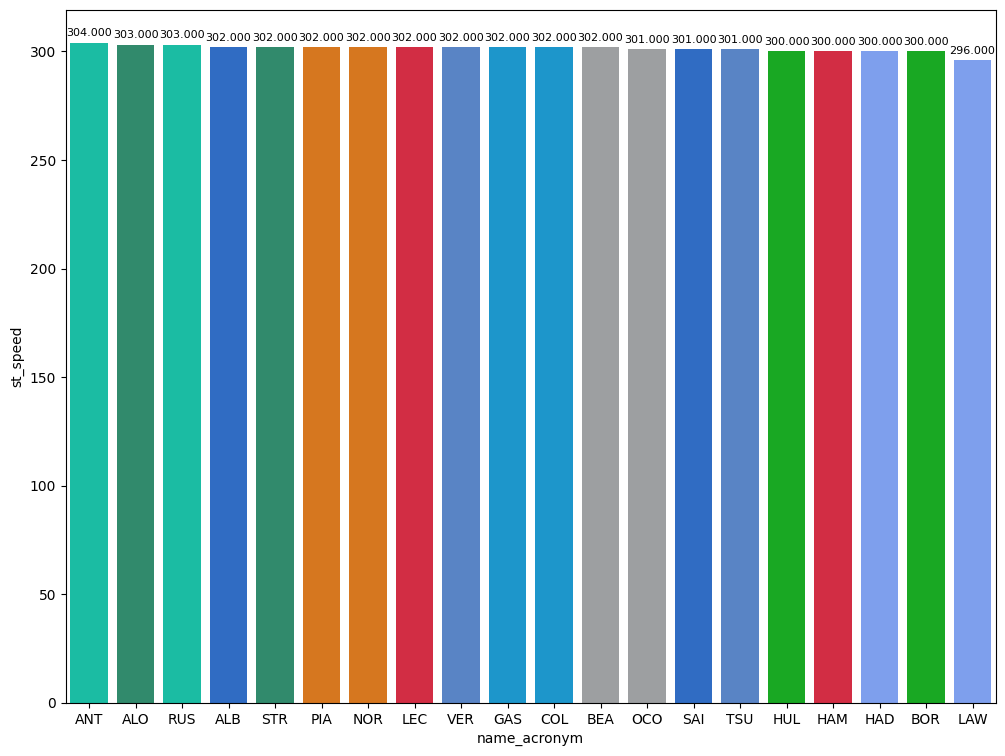

In [116]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax().dropna()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

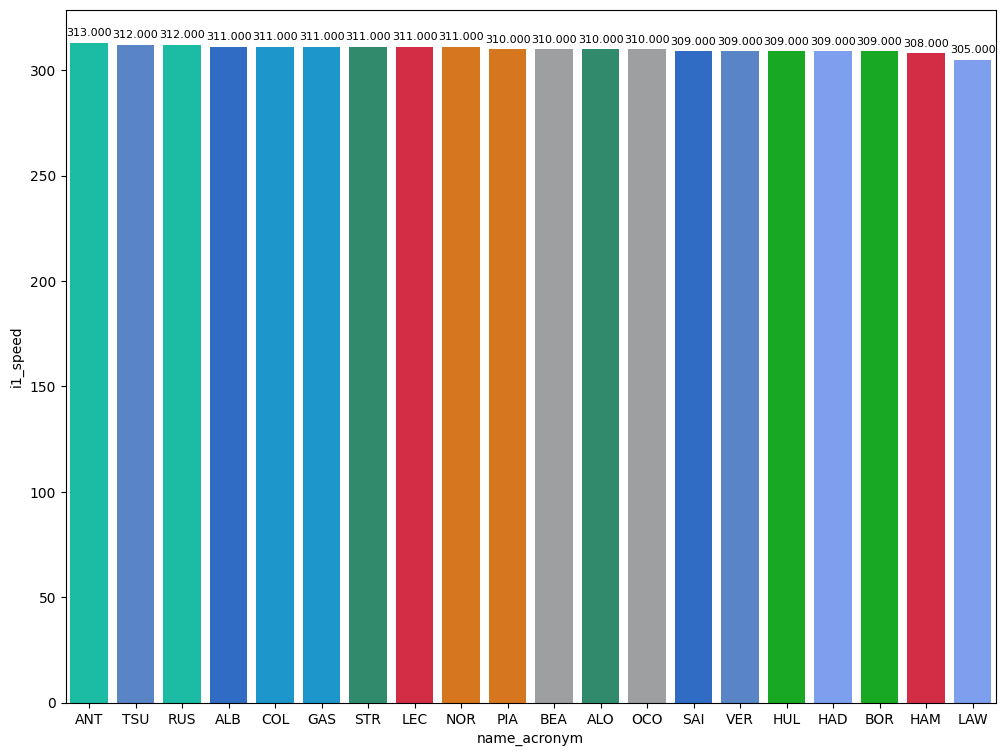

In [117]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

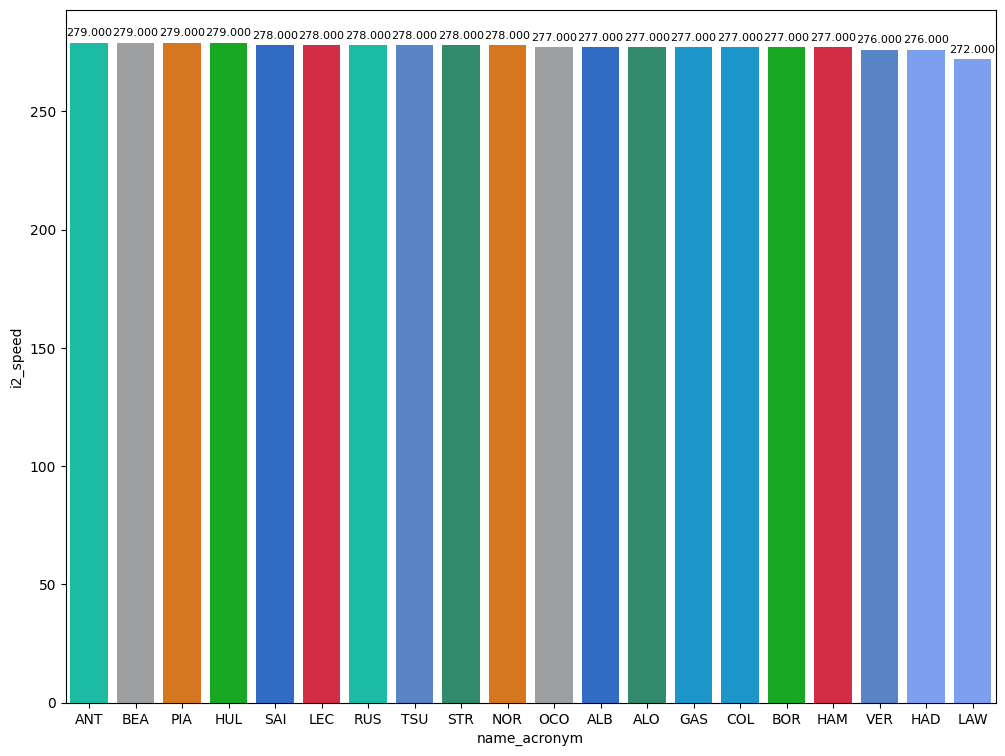

In [118]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [119]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin().dropna()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

full_name compound  duration_sector_1  duration_sector_2  \
65     Lando NORRIS   MEDIUM             27.066             38.222   
299  Max VERSTAPPEN     SOFT             26.823             37.844   

     duration_sector_3  lap_duration  
65              25.733        91.021  
299             25.481        90.148

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session

In [120]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


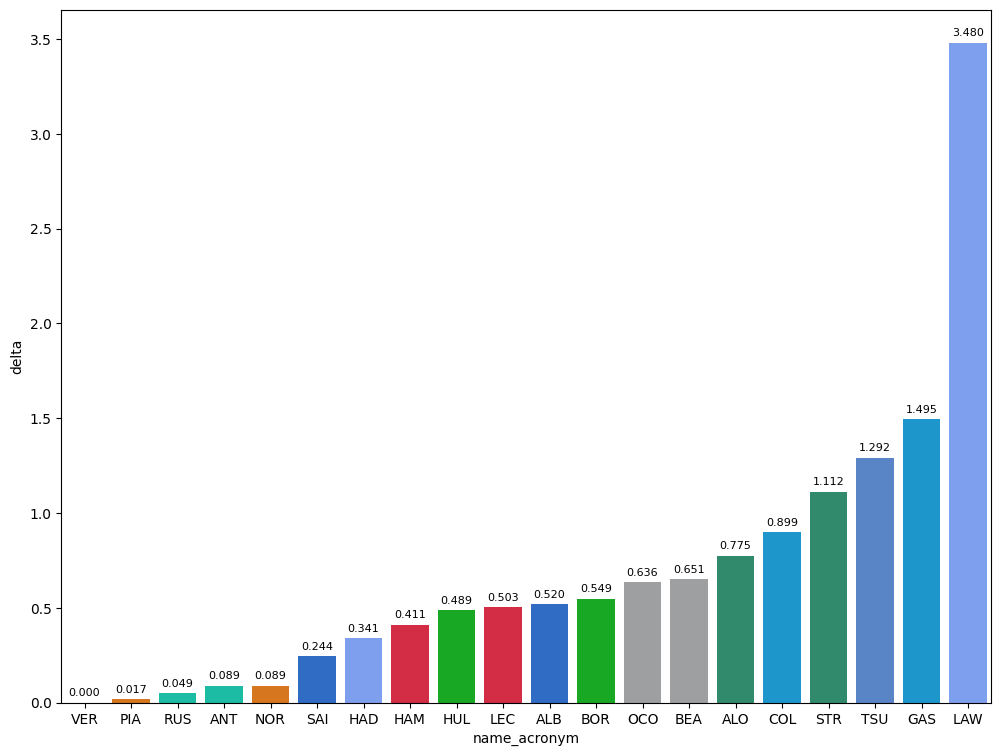

In [121]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.

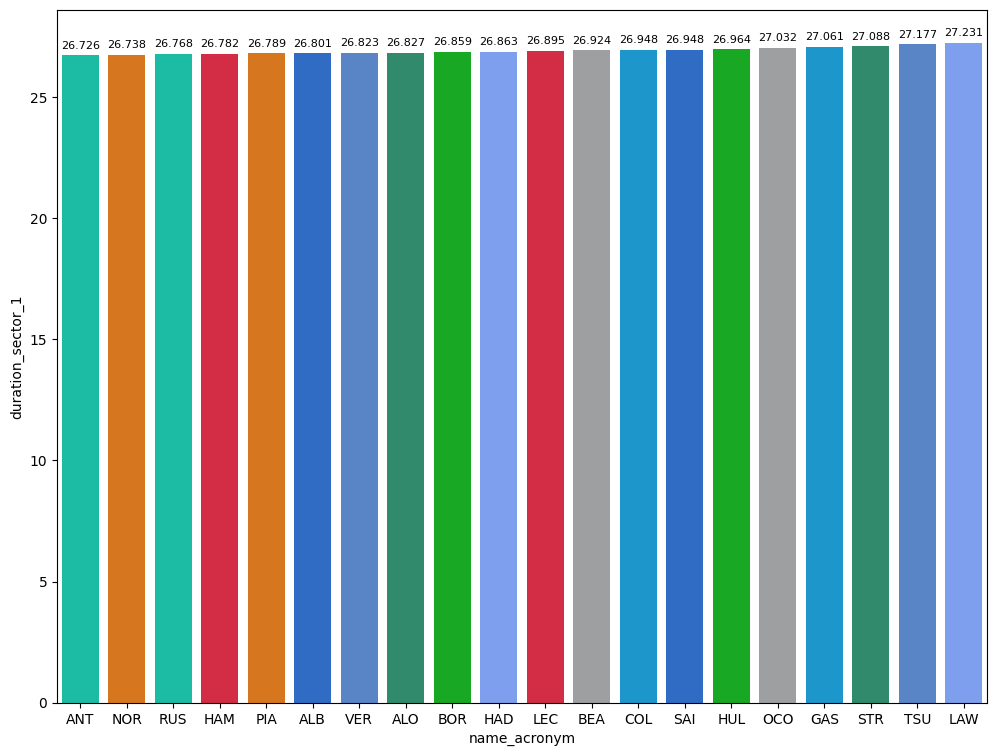

In [122]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin().dropna()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

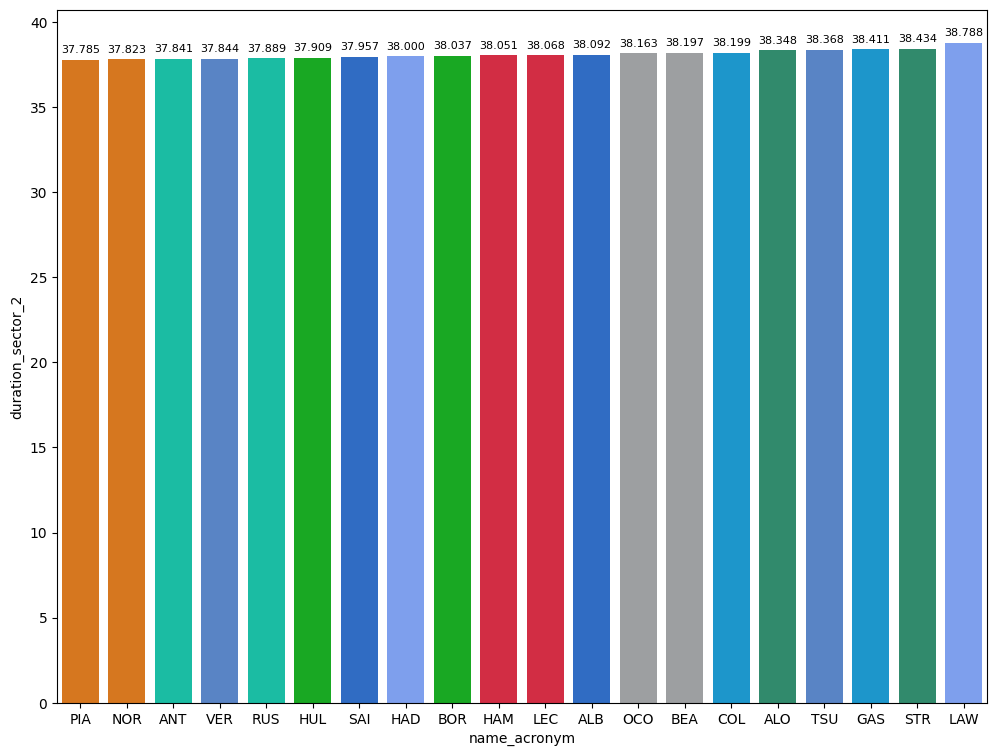

In [123]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin().dropna()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

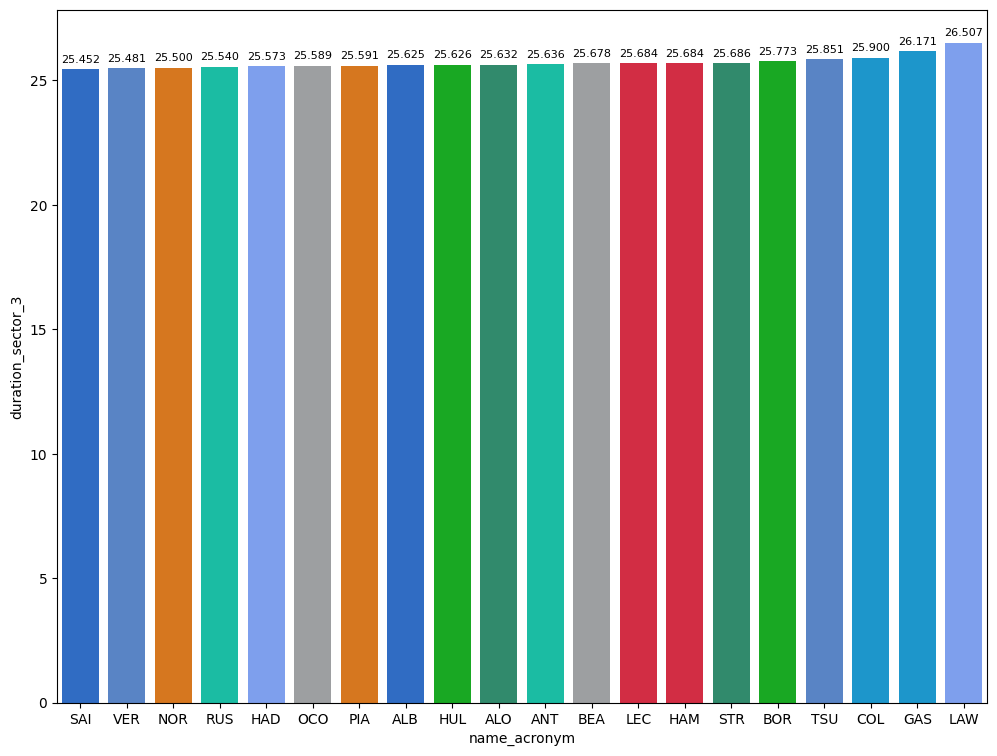

In [124]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin().dropna()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [125]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False and lap_duration <94 and lap_duration > 91.5").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
compound              
SOFT         92.041909
MEDIUM       92.927250

## Predictions

In [ ]:
# Free Practice 1
practice = libraryDataF1.obtain_information('laps',session_key=9599)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9599)
drivers = libraryDataF1.obtain_information('drivers',session_key=9599)

stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointablesfreepractice1 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])

# Free Practice 2
practice = libraryDataF1.obtain_information('laps',session_key=9600)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9600)
drivers = libraryDataF1.obtain_information('drivers',session_key=9600)


stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointablesfreepractice2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])

# Free Practice 3
# practice = libraryDataF1.obtain_information('laps',session_key=9591)
# stintInformation = libraryDataF1.obtain_information('stints',session_key=9591)
# drivers = libraryDataF1.obtain_information('drivers',session_key=9591)

# stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
# jointablesfreepractice1 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])


### Qualyfing prediction

In [ ]:
qualy_simulation = libraryDataF1.qualyfing_prediction([jointablesfreepractice1,jointablesfreepractice2],drivers,0.05,0.07,0.08)
qualy_simulation.sort_values(by='qualy_lap_time')

### Race prediction

In [ ]:
race_simulation = libraryDataF1.race_prediction(jointablesfreepractice2,drivers,96.5,100.3)
race_simulation.groupby('team').mean().sort_values(by='mean_lap_duration')

## Qualyfing
### Set up
First of all, it is neccesary to obtain the data about the qualyfing
#### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session. As every laptime that has been deleted were slow laps, none of them were removed.

In [126]:
libraryDataF1.obtain_information('race_control',session_key=9892)

meeting_key  session_key                       date driver_number  \
0          1270         9892  2025-10-04T13:00:00+00:00          None   
1          1270         9892  2025-10-04T13:04:21+00:00          None   
2          1270         9892  2025-10-04T13:04:29+00:00          None   
3          1270         9892  2025-10-04T13:05:30+00:00          None   
4          1270         9892  2025-10-04T13:06:31+00:00          None   
5          1270         9892  2025-10-04T13:09:36+00:00          None   
6          1270         9892  2025-10-04T13:09:41+00:00          None   
7          1270         9892  2025-10-04T13:10:06+00:00          None   
8          1270         9892  2025-10-04T13:12:14+00:00          None   
9          1270         9892  2025-10-04T13:12:54+00:00          None   
10         1270         9892  2025-10-04T13:16:59+00:00          None   
11         1270         9892  2025-10-04T13:17:45+00:00          None   
12         1270         9892  2025-10-04T13:18:00+00:00          None   
13         1270         9892  2025-10-04T13:18:05+00:00          None   
14         1270         9892  2025-10-04T13:18:28+00:00          None   
15         1270         9892  2025-10-04T13:18:34+00:00          None   
16         1270         9892  2025-10-04T13:20:38+00:00          None   
17         1270         9892  2025-10-04T13:21:51+00:00          None   
18         1270         9892  2025-10-04T13:22:09+00:00          None   
19         1270         9892  2025-10-04T13:22:19+00:00          None   
20         1270         9892  2025-10-04T13:23:09+00:00          None   
21         1270         9892  2025-10-04T13:27:40+00:00          None   
22         1270         9892  2025-10-04T13:27:52+00:00          None   
23         1270         9892  2025-10-04T13:28:26+00:00          None   
24         1270         9892  2025-10-04T13:28:55+00:00          None   
25         1270         9892  2025-10-04T13:29:24+00:00          None   
26         1270         9892  2025-10-04T13:31:06+00:00          None   
27         1270         9892  2025-10-04T13:31:29+00:00          None   
28         1270         9892  2025-10-04T13:32:00+00:00          None   
29         1270         9892  2025-10-04T13:36:10+00:00          None   
30         1270         9892  2025-10-04T13:37:37+00:00          None   
31         1270         9892  2025-10-04T13:37:55+00:00          None   
32         1270         9892  2025-10-04T13:37:57+00:00          None   
33         1270         9892  2025-10-04T13:43:33+00:00          None   
34         1270         9892  2025-10-04T13:47:00+00:00          None   
35         1270         9892  2025-10-04T13:47:18+00:00          None   
36         1270         9892  2025-10-04T13:49:47+00:00          None   
37         1270         9892  2025-10-04T13:49:48+00:00          None   
38         1270         9892  2025-10-04T13:50:34+00:00          None   
39         1270         9892  2025-10-04T13:50:38+00:00          None   
40         1270         9892  2025-10-04T13:50:38+00:00          None   
41         1270         9892  2025-10-04T13:55:00+00:00          None   
42         1270         9892  2025-10-04T14:07:00+00:00          None   
43         1270         9892  2025-10-04T14:07:12+00:00          None   
44         1270         9892  2025-10-04T14:10:05+00:00          None   

   lap_number category           flag   scope  sector  \
0        None     Flag          GREEN   Track     NaN   
1        None     Flag         YELLOW  Sector     2.0   
2        None     Flag          CLEAR  Sector     2.0   
3        None    Other           None    None     NaN   
4        None    Other           None    None     NaN   
5        None    Other           None    None     NaN   
6        None    Other           None    None     NaN   
7        None    Other           None    None     NaN   
8        None    Other           None    None     NaN   
9        None    Other           None    None     NaN   
10       None    O

### Obtain setup

In [127]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9892)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9892)
drivers = libraryDataF1.obtain_information('drivers',session_key=9892)

In [128]:
session = ff1.get_session(2025, 'Singapore', 'Q')
session.load()
session.laps["LapTimeSeconds"] = session.laps["LapTime"].dt.total_seconds()

core           INFO 	Loading data for Singapore Grand Prix - Qualifying [v3.3.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INF

In [129]:
laptimes_deleted = [89.824]
driver_number_lap_deleted = [12]

for ltime_deleted, dn_time_deleted in zip(laptimes_deleted,driver_number_lap_deleted):
    try:
        id_deleted = qualyfing.query("driver_number == @dn_time_deleted and lap_duration == @ltime_deleted").index[0]
        qualyfing = qualyfing.drop(id_deleted)
    except:
        print("Laptime deleted associated with the selected driver does not exist. Please, check again the order of the arrays")

In [130]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)

In this case, the fastest lap is 89.158 seconds (1.29.525= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 95.791 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [131]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration <= 95.399")

In [132]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)
print()

#### Best lap per driver compared with the best lap of the session
In this chart we can see the deltas with compared with the fastest lap of the session that it could be different than the pole.

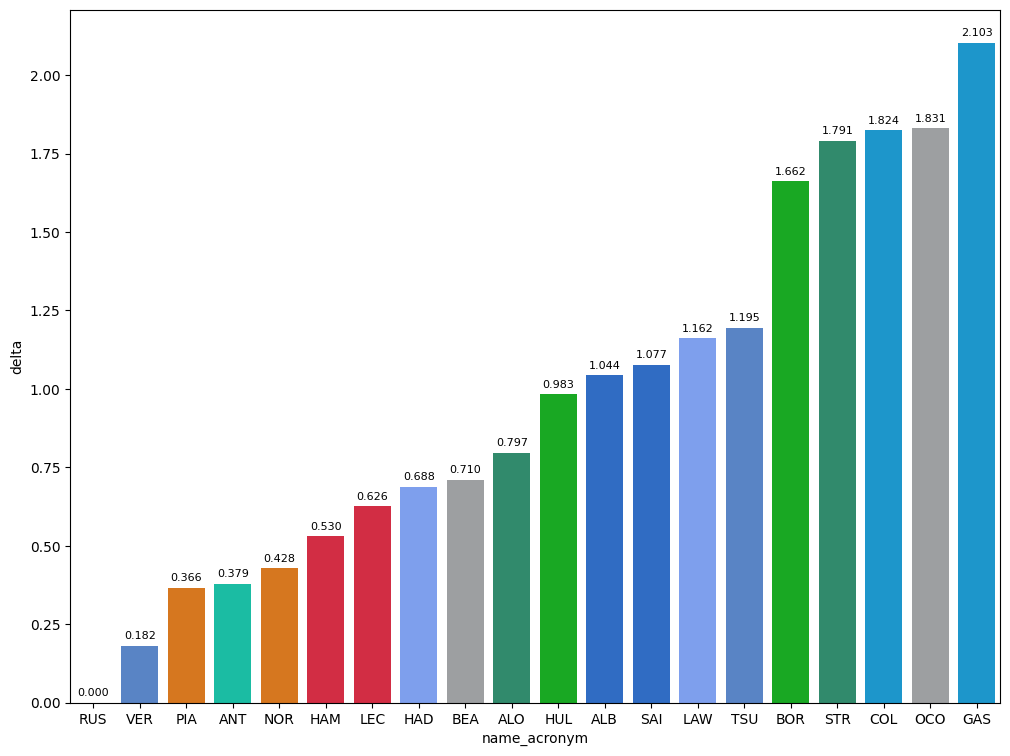

In [133]:
dt = jointables.sort_values(by=['fastest_lap'],ascending=True)
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Speed trap

#### Maximum speed per drivers

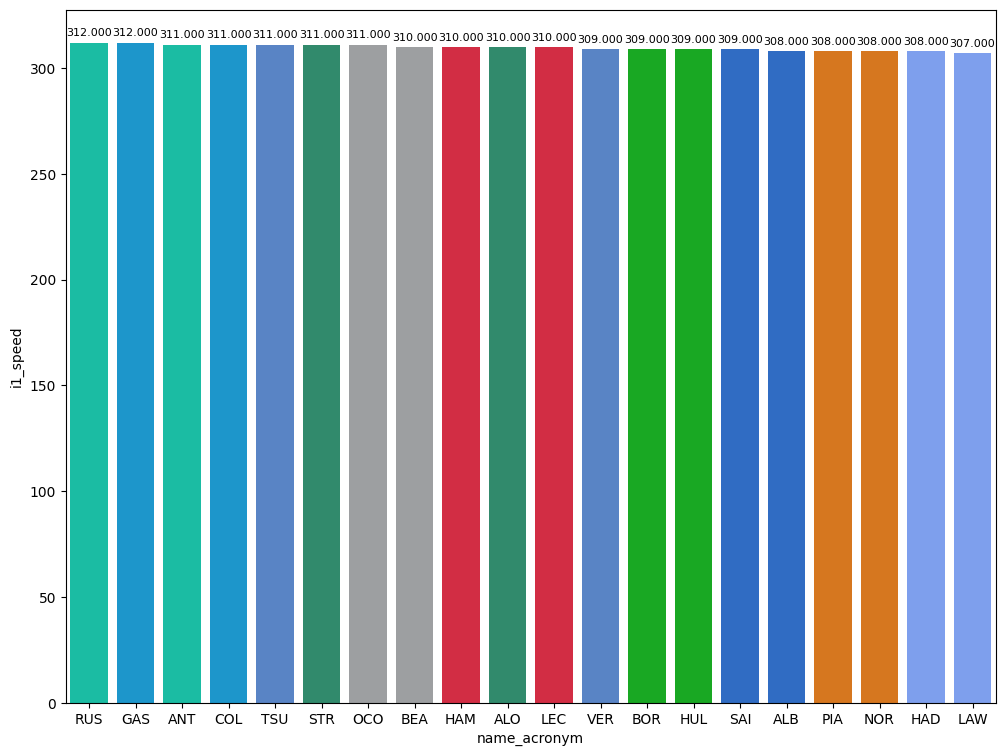

In [134]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

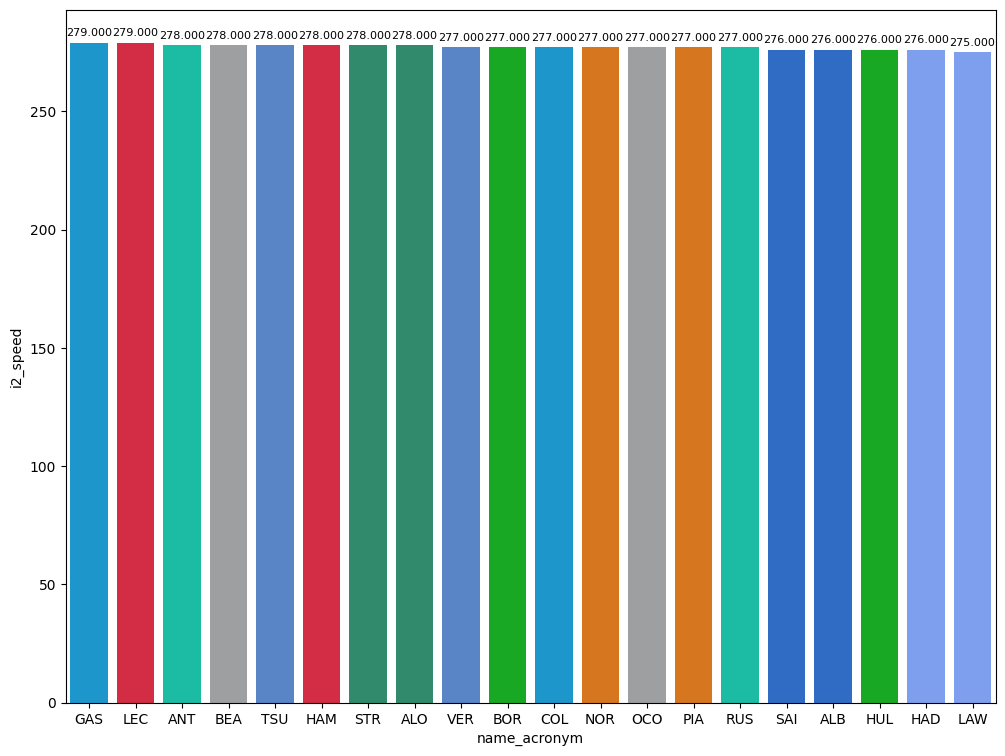

In [135]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

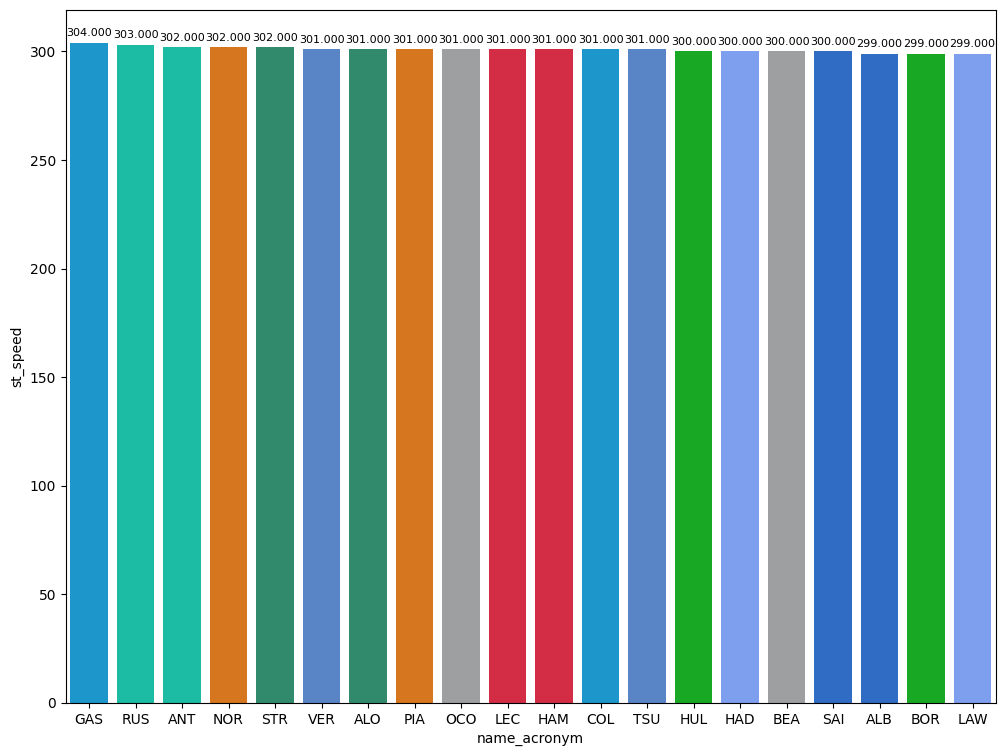

In [136]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

### Maximum speed per teams

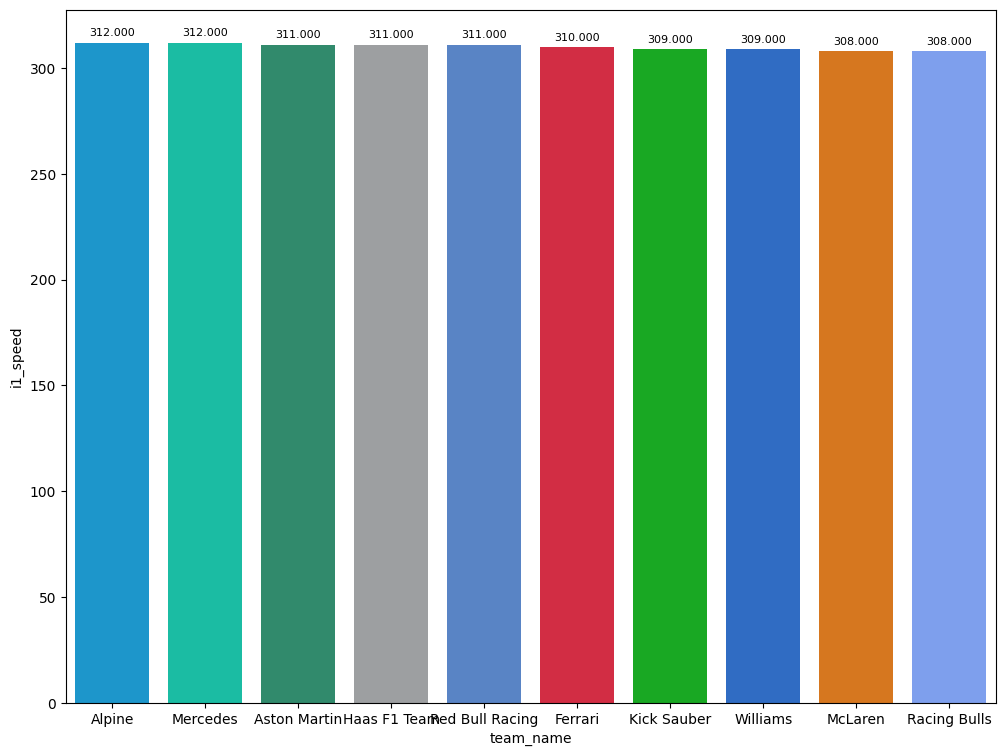

In [137]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i1_speed",top_speed)

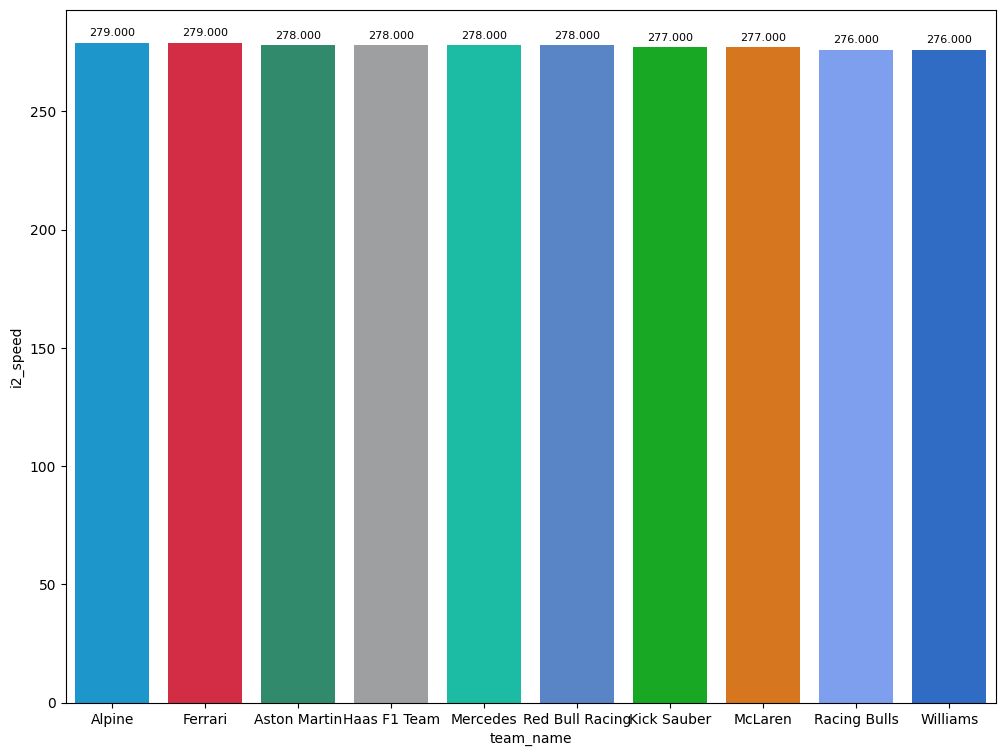

In [138]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i2_speed",top_speed)

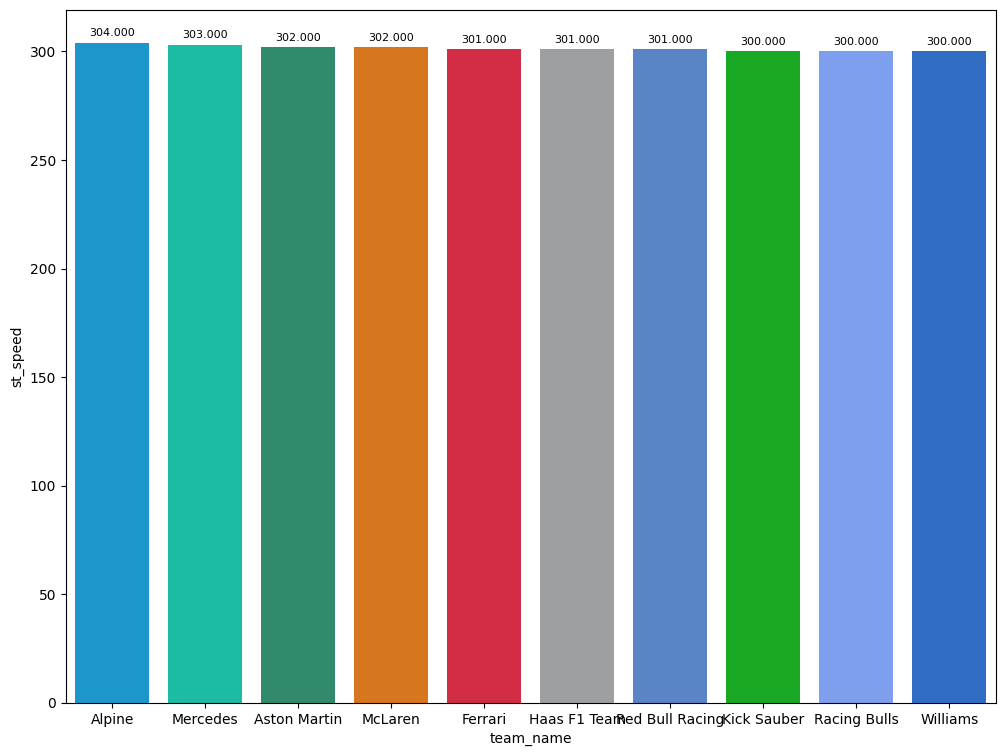

In [139]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","st_speed",top_speed)

In [142]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])

In order to know when each session finished, race control dataset will be consulted.

In [143]:
maximumDateQ1 = "date_start <'2025-10-04T13:32:00+00:00'"
maximumDateQ2 = "date_start <'2025-10-04T13:55:00+00:00' and date_start >'2025-10-04T13:32:00+00:00'"
maximumDateQ3 = "date_start >'2025-10-04T13:55:00+00:00'"

### Qualyfing 1

In [144]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver,I will do a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap. 



In [145]:
#Reference
P15 = q1Data[14:15]

In [146]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

Driver: Alexander ALBON Sector 1:  26.946 Sector 2:  38.22 Sector 3:  25.609


In [147]:
q1Data[15::]

meeting_key_x  session_key_x  driver_number  lap_number  \
26           1270           9892              5           7   
10           1270           9892             18           8   
2            1270           9892             43           8   
64           1270           9892             31           5   
77           1270           9892             10           5   

                          date_start  duration_sector_1  duration_sector_2  \
26  2025-10-04T13:17:37.590000+00:00             26.952             38.250   
10  2025-10-04T13:15:24.942000+00:00             26.911             38.102   
2   2025-10-04T13:16:28.397000+00:00             26.776             38.309   
64  2025-10-04T13:17:48.242000+00:00             26.931             38.465   
77  2025-10-04T13:08:34.069000+00:00             27.022             38.521   

    duration_sector_3  i1_speed  i2_speed  ...  broadcast_name  \
26             25.618     310.0     279.0  ...     G BORTOLETO   
10             25.936     314.0     279.0  ...        L STROLL   
2              25.897     314.0     279.0  ...     F COLAPINTO   
64             25.593     312.0     277.0  ...          E OCON   
77             25.718     312.0     279.0  ...         P GASLY   

            full_name name_acronym     team_name team_colour  first_name  \
26  Gabriel BORTOLETO          BOR   Kick Sauber      01C00E     Gabriel   
10       Lance STROLL          STR  Aston Martin      229971       Lance   
2    Franco COLAPINTO          COL        Alpine      00A1E8      Franco   
64       Esteban OCON          OCO  Haas F1 Team      9C9FA2     Esteban   
77       Pierre GASLY          GAS        Alpine      00A1E8      Pierre   

    last_name                                       headshot_url country_code  \
26  Bortoleto  https://media.formula1.com/d_driver_fallback_i...         None   
10     Stroll  https://media.formula1.com/d_driver_fallback_i...         None   
2   Colapinto                                               None         None   
64       Ocon  https://media.formula1.com/d_driver_fallback_i...         None   
77      Gasly  https://media.formula1.com/d_driver_fallback_i...         None   

   isFastestLap  
26         True  
10         True  
2          True  
64         True  
77         True  

[5 rows x 28 columns]

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [148]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0              5         0.045                0.006                0.030   
1             18         0.174               -0.035               -0.118   
2             43         0.207               -0.170                0.089   
3             31         0.214               -0.015                0.245   
4             10         0.486                0.076                0.301   

   difference_sector_3 name_acronym  
0                0.009          BOR  
1                0.327          STR  
2                0.288          COL  
3               -0.016          OCO  
4                0.109          GAS

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: Futur

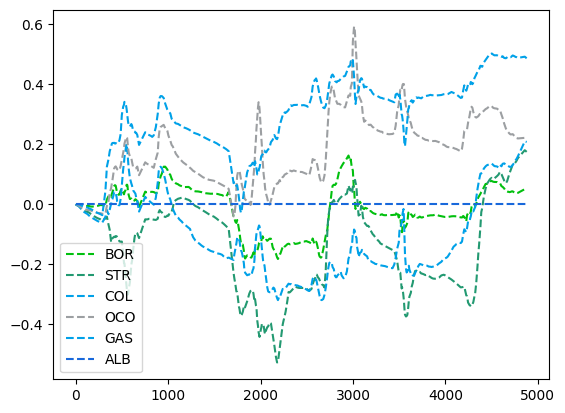

In [149]:
libraryDataF1.draw_gap(P15,15,20,q1Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk
I bring this section in order to know where the driver at risk lost his chances to improve in the qualyfing.

In [150]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[0:14].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0              44        -1.010               -0.195               -0.551   
1              63        -0.847               -0.242               -0.380   
2               4        -0.843               -0.246               -0.515   
3               1        -0.747               -0.151               -0.393   
4              12        -0.739               -0.337               -0.563   
5               6        -0.561               -0.120               -0.326   
6              81        -0.462               -0.235               -0.055   
7              16        -0.405               -0.062               -0.373   
8              87        -0.355               -0.077               -0.179   
9              22        -0.201               -0.105               -0.023   
10             55        -0.135                0.067               -0.088   
11             30        -0.094               -0.042               -0.112   
12             27        -0.060               -0.030                0.007   
13             14        -0.030               -0.172                0.027   

    difference_sector_3 name_acronym  
0                -0.264          HAM  
1                -0.225          RUS  
2                -0.082          NOR  
3                -0.203          VER  
4                 0.161          ANT  
5                -0.115          HAD  
6                -0.172          PIA  
7                 0.030          LEC  
8                -0.099          BEA  
9                -0.073          TSU  
10               -0.114          SAI  
11                0.060          LAW  
12               -0.037          HUL  
13                0.115          ALO

#### Best sector per driver
In this section we can see the best sector of the session

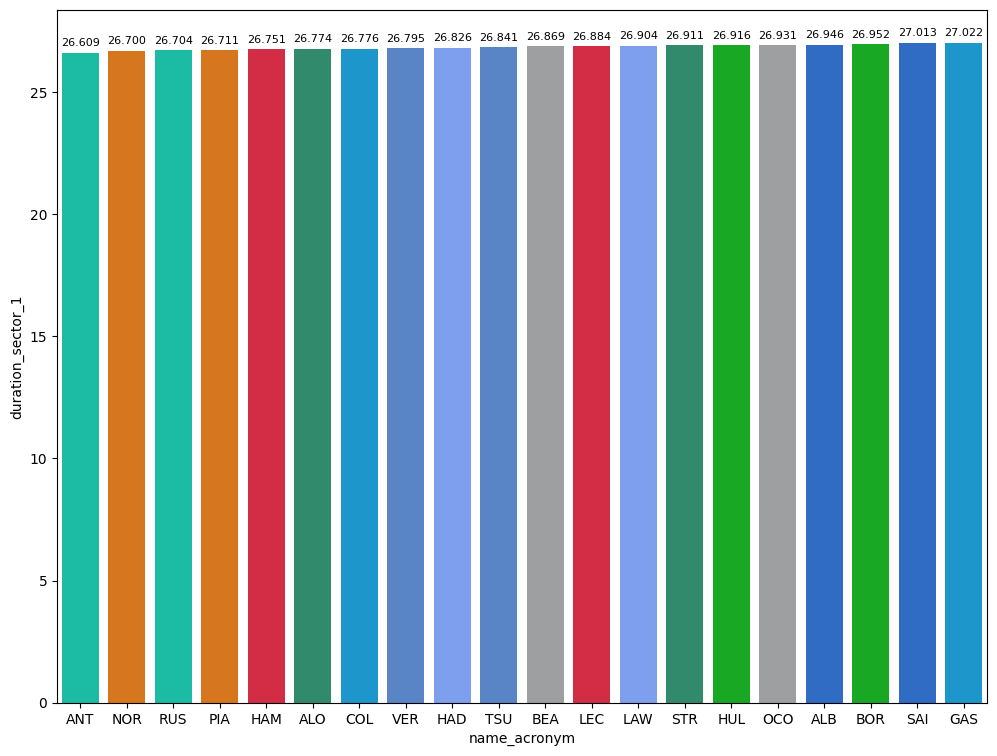

In [151]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q1Data.sort_values(by=['duration_sector_1'],ascending=True))

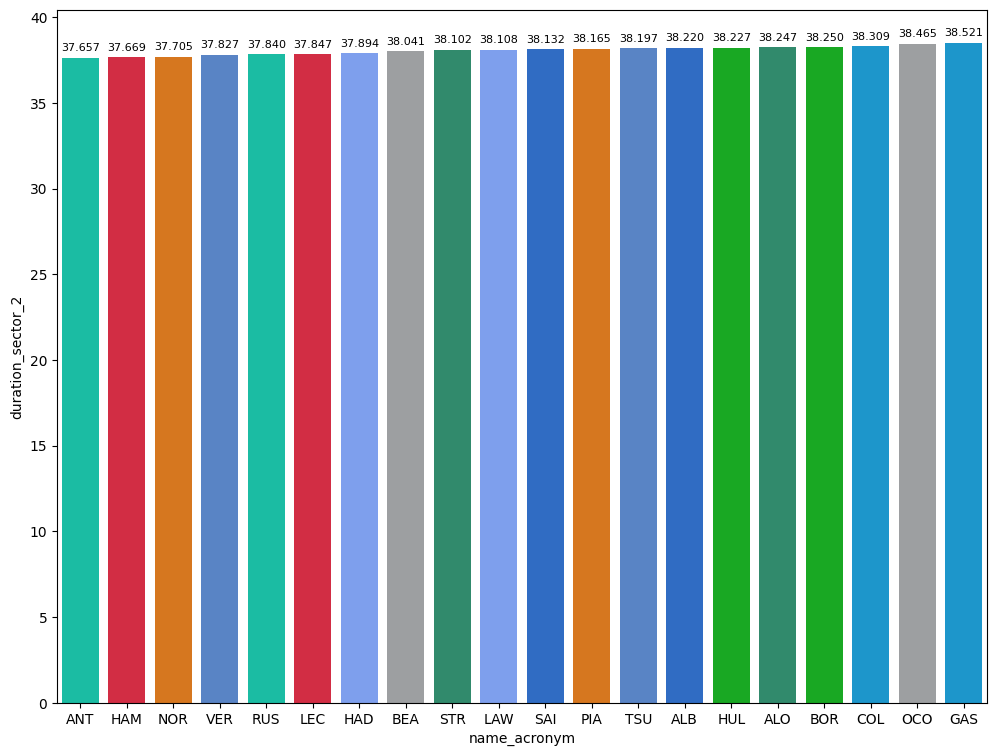

In [152]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q1Data.sort_values(by=['duration_sector_2'],ascending=True))

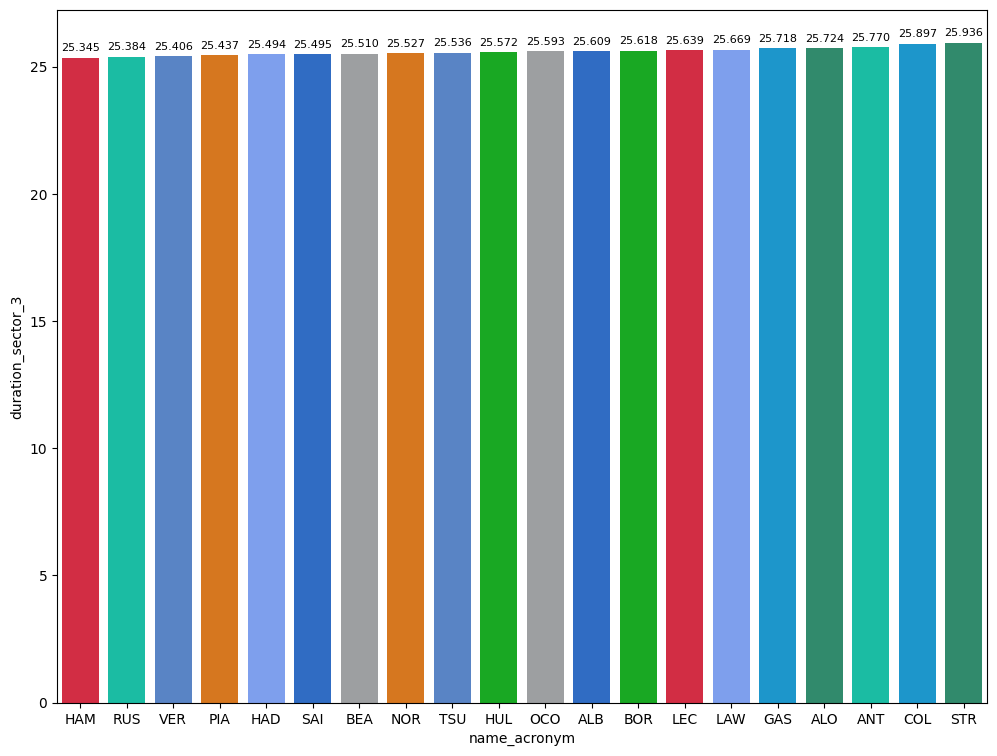

In [153]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q1Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 2

In [154]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [155]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

Driver: Oliver BEARMAN Sector 1:  26.764 Sector 2:  37.97 Sector 3:  25.342


##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [156]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0             27         0.065               -0.043               -0.106   
1             23         0.126               -0.038                0.050   
2             55         0.159                0.049               -0.025   
3             30         0.244                0.100               -0.067   
4             22         0.277                0.186               -0.035   

   difference_sector_3 name_acronym  
0                0.214          HUL  
1                0.114          ALB  
2                0.135          SAI  
3                0.211          LAW  
4                0.126          TSU

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: Futur

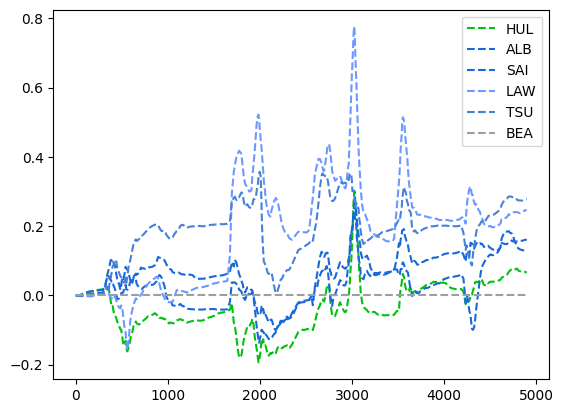

In [157]:

libraryDataF1.draw_gap(P10,10,15,q2Data,drivers,session)
    

##### Analysis with the drivers that finished better than the driver at risk

In [158]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[0:9].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0             63        -0.514               -0.165               -0.394   
1              1        -0.504               -0.088               -0.392   
2             12        -0.427                0.030               -0.557   
3              4        -0.267               -0.097               -0.296   
4             81        -0.263               -0.010               -0.346   
5             16        -0.162               -0.057               -0.241   
6             44        -0.140                0.011               -0.329   
7              6        -0.060               -0.021               -0.158   
8             14        -0.022                0.133               -0.158   

   difference_sector_3 name_acronym  
0                0.045          RUS  
1               -0.024          VER  
2                0.100          ANT  
3                0.126          NOR  
4                0.093          PIA  
5                0.136          LEC  
6                0.178          HAM  
7                0.119          HAD  
8                0.003          ALO

#### Best sector per driver
In this section we can see the best sector of the session

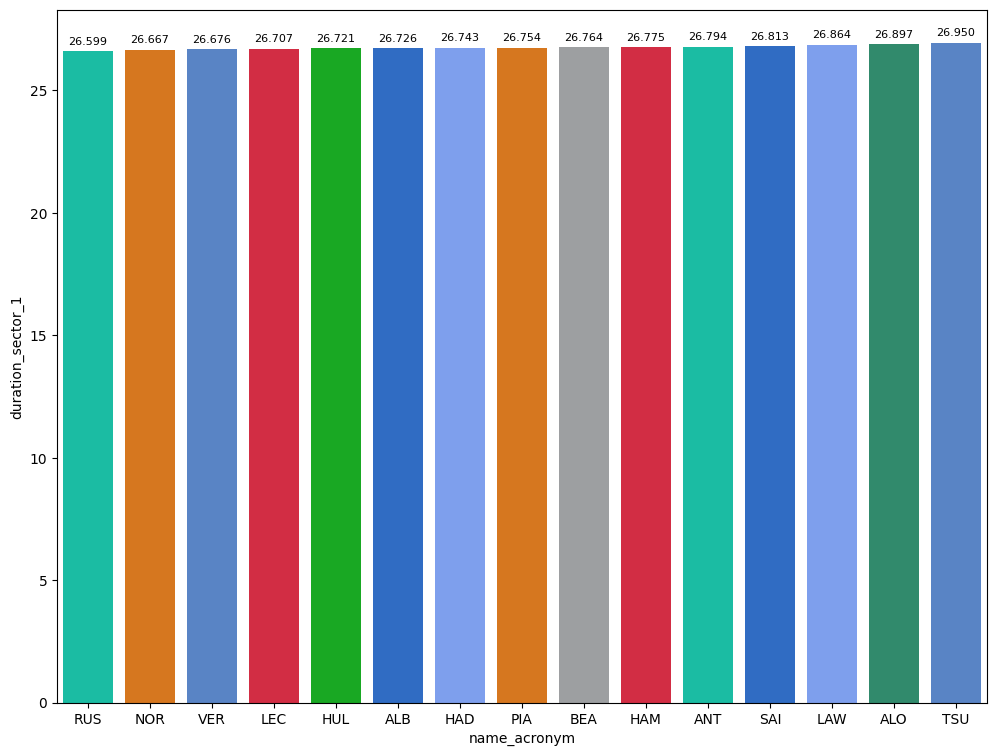

In [159]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q2Data.sort_values(by=['duration_sector_1'],ascending=True))

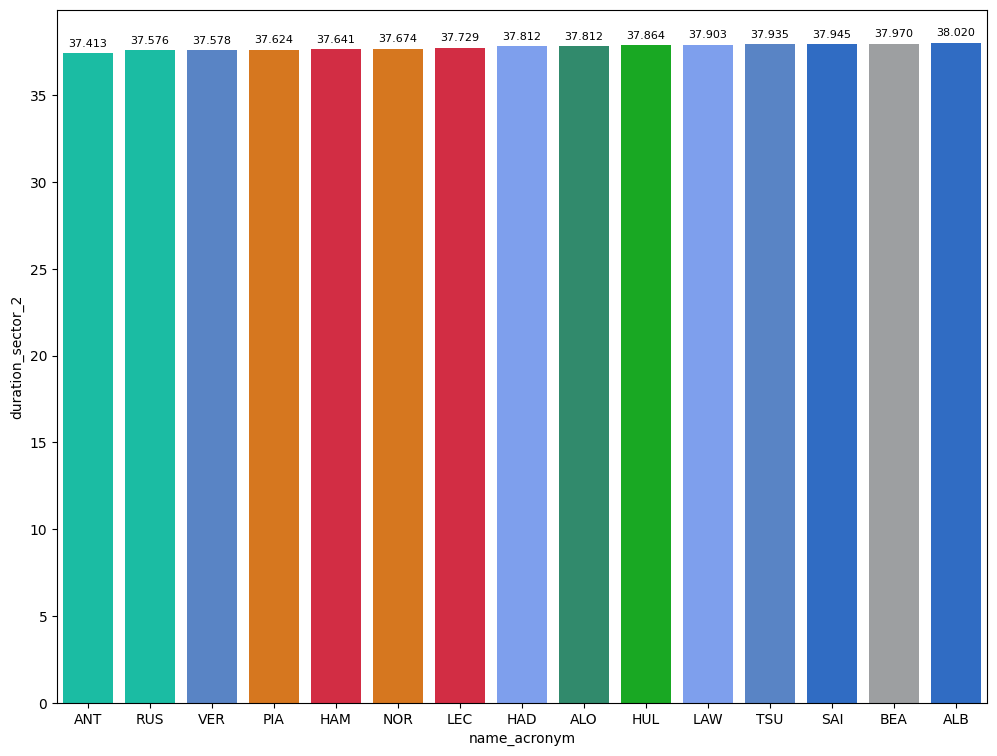

In [160]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q2Data.sort_values(by=['duration_sector_2'],ascending=True))

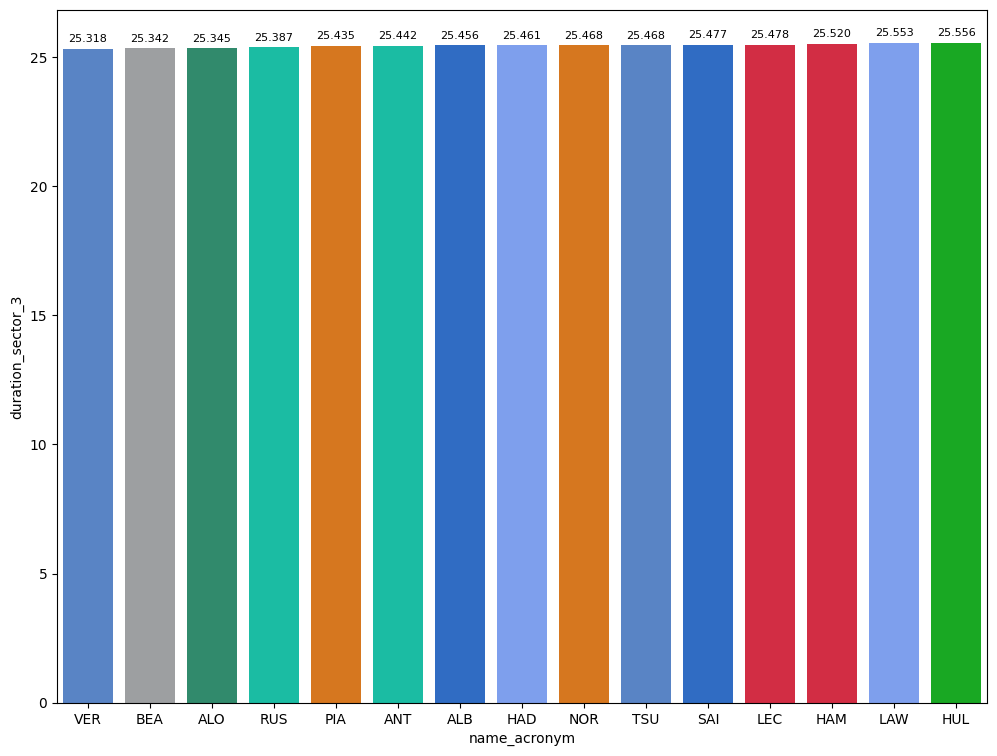

In [161]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q2Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 3

In [162]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [163]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

Driver: George RUSSELL Sector 1:  26.475 Sector 2:  37.329 Sector 3:  25.354


##### Analysis of each sector of the poleman compared to the drivers eliminated.



In [164]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0              1         0.182                0.226                0.090   
1             81         0.366                0.081                0.280   
2             12         0.379                0.088                0.153   
3              4         0.428                0.170                0.122   
4             44         0.530                0.270                0.263   
5             16         0.626                0.294                0.353   
6              6         0.688                0.219                0.381   
7             87         0.710                0.228                0.495   
8             14         0.797                0.266                0.498   

   difference_sector_3 name_acronym  
0               -0.134          VER  
1                0.005          PIA  
2                0.138          ANT  
3                0.136          NOR  
4               -0.003          HAM  
5               -0.021          LEC  
6                0.088          HAD  
7               -0.013          BEA  
8                0.033          ALO

#### Best sector per driver
In this section we can see the best sector of the session

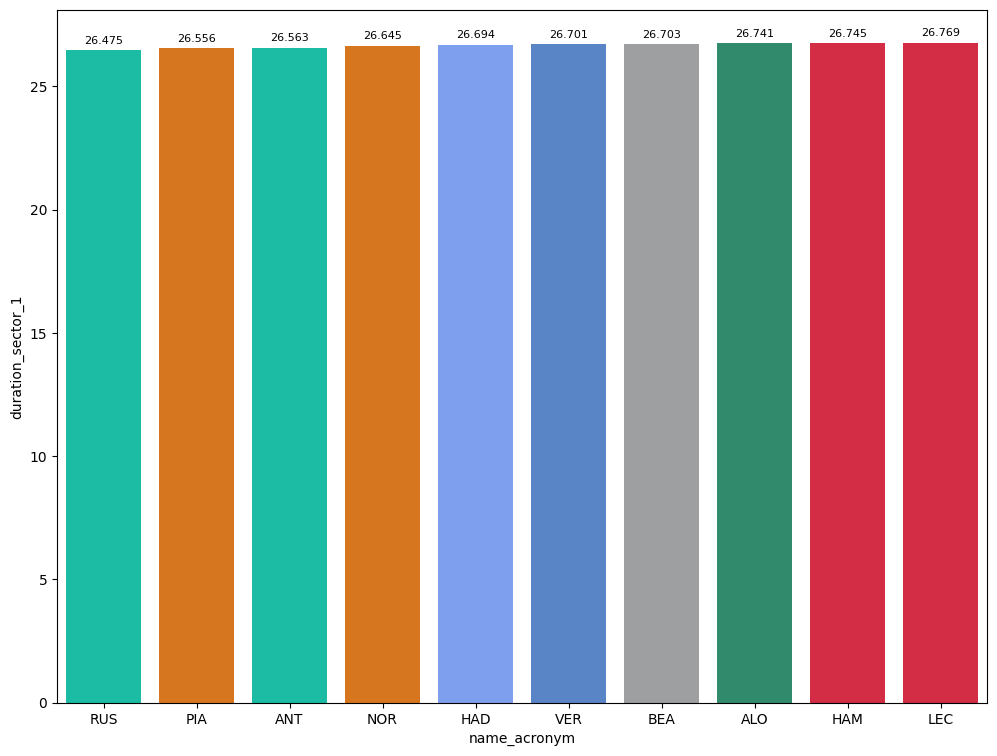

In [165]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q3Data.sort_values(by=['duration_sector_1'],ascending=True))

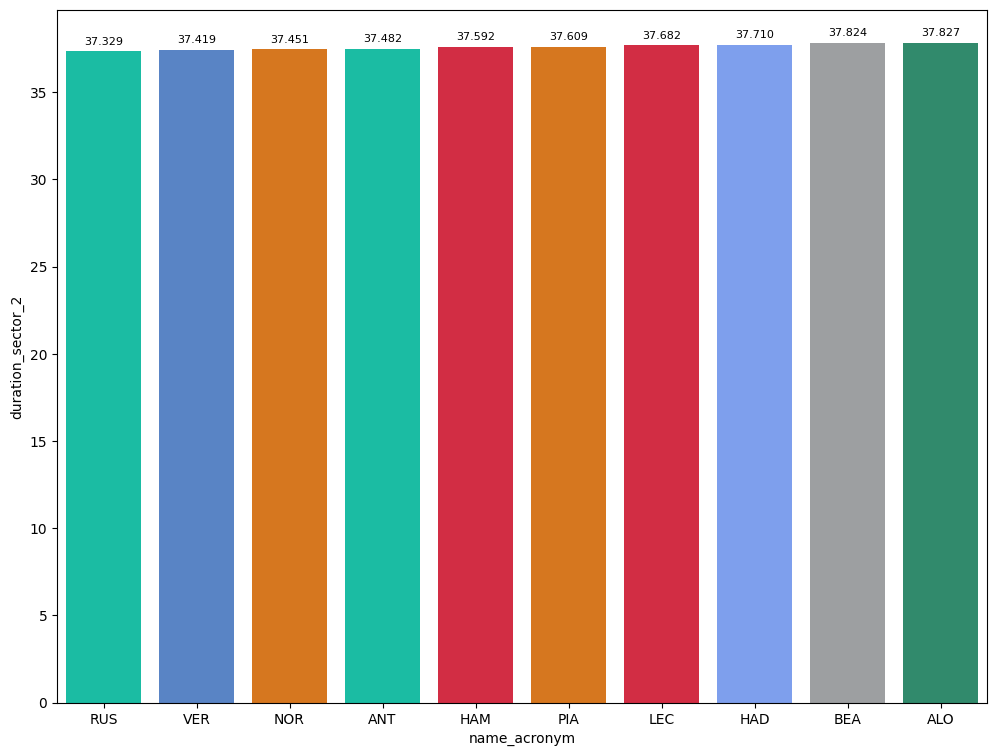

In [166]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q3Data.sort_values(by=['duration_sector_2'],ascending=True))

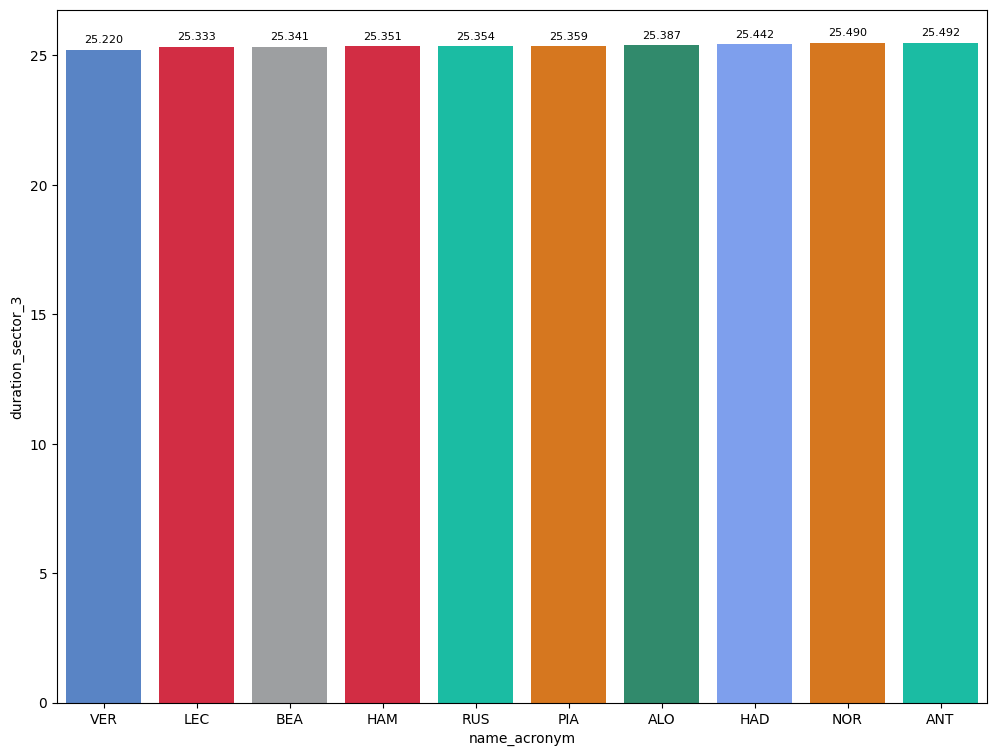

In [167]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q3Data.sort_values(by=['duration_sector_3'],ascending=True))

#### Best sector per driver of the session (in general)

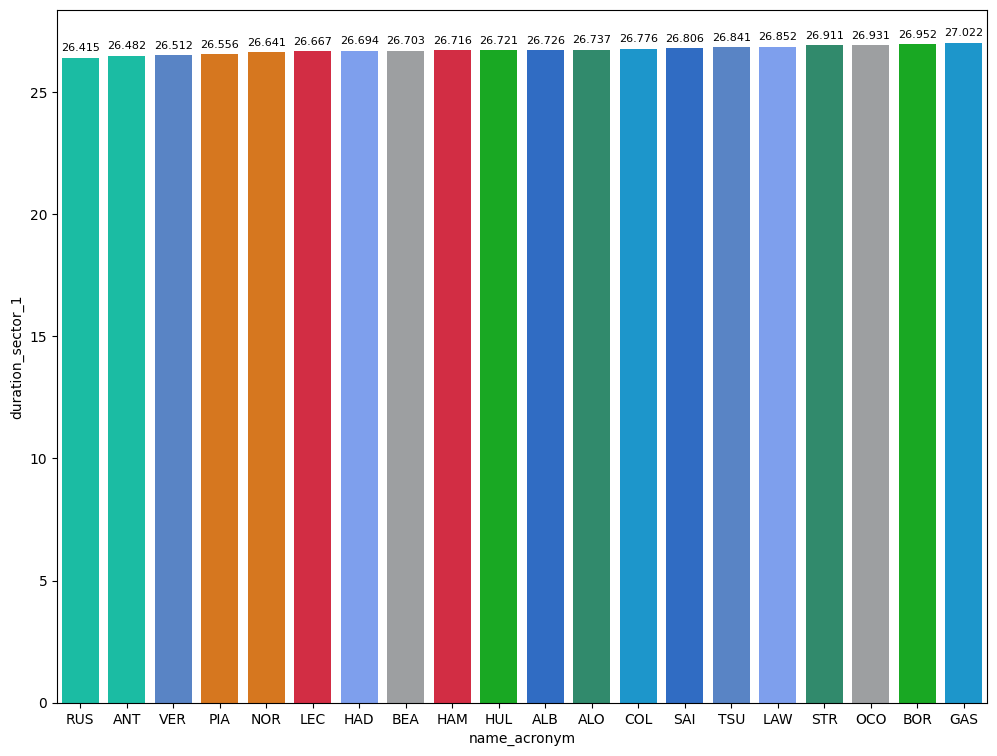

In [168]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True)).reset_index())

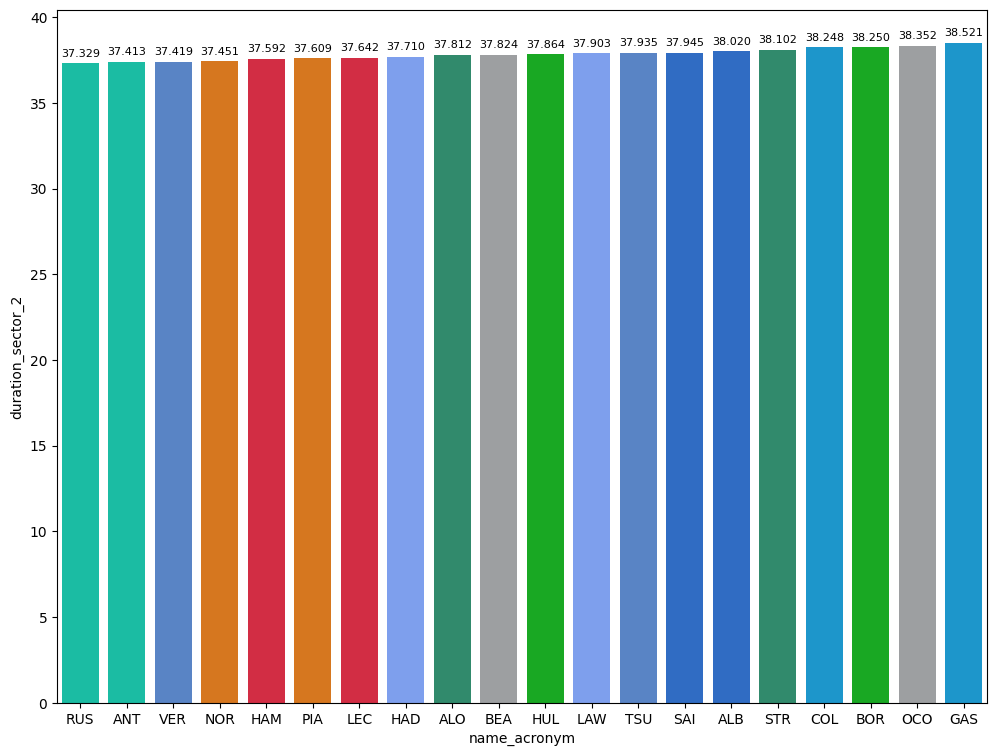

In [169]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True)).reset_index())

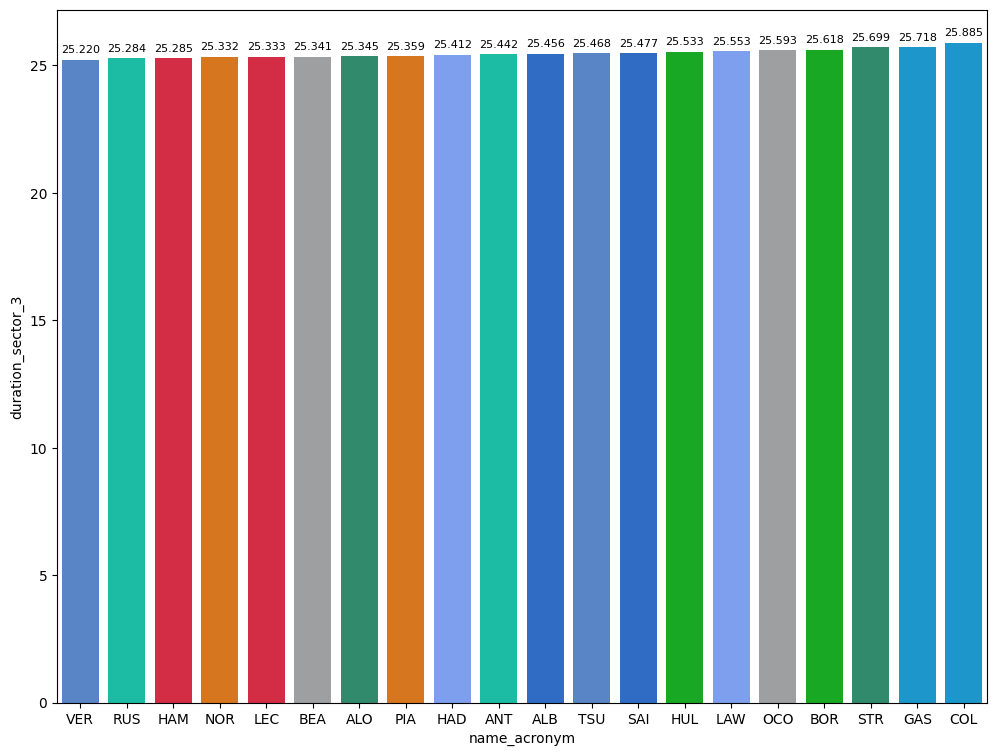

In [170]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True)).reset_index())

### Comparaison between the poleman and the second

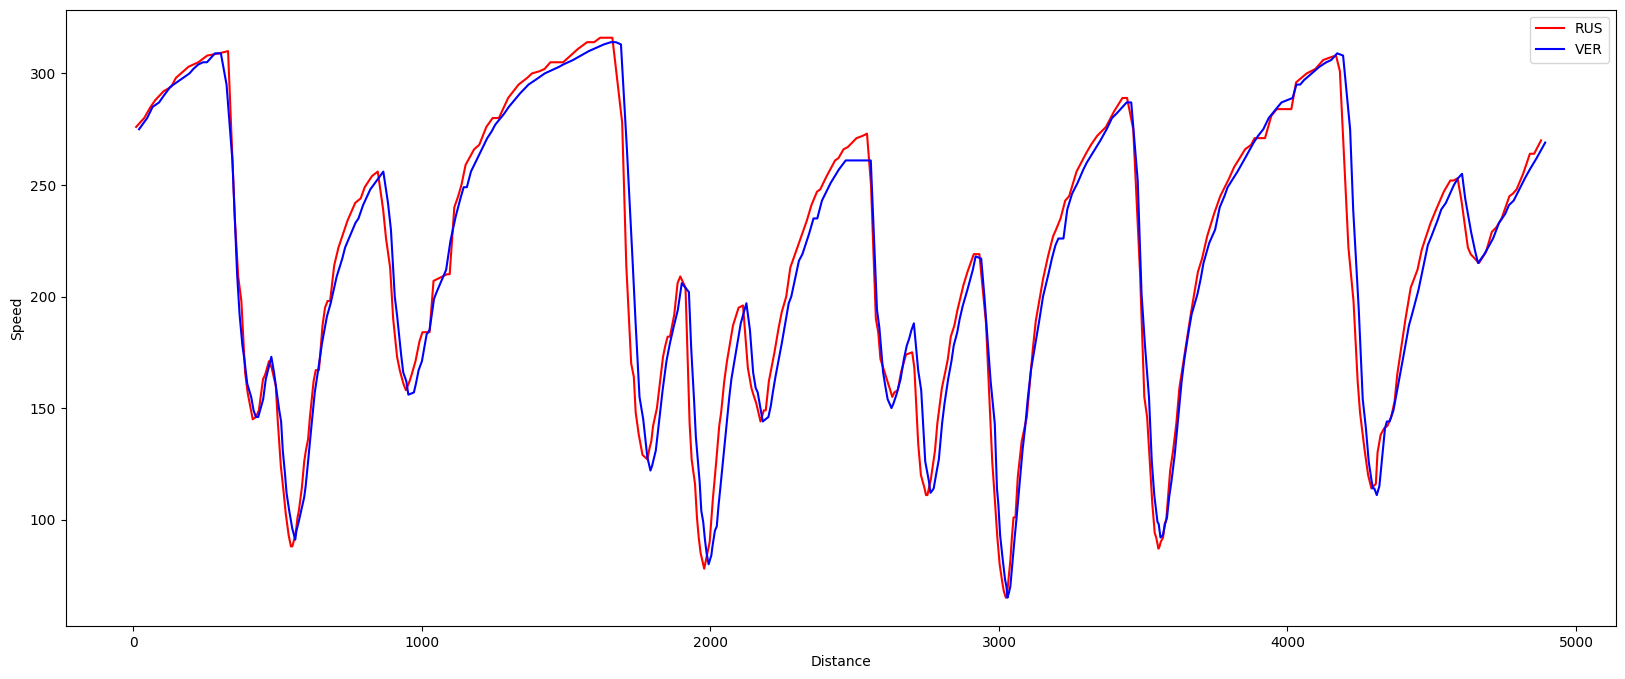

In [171]:
libraryDataF1.plot_telemetry("Distance","Speed",dt,session)

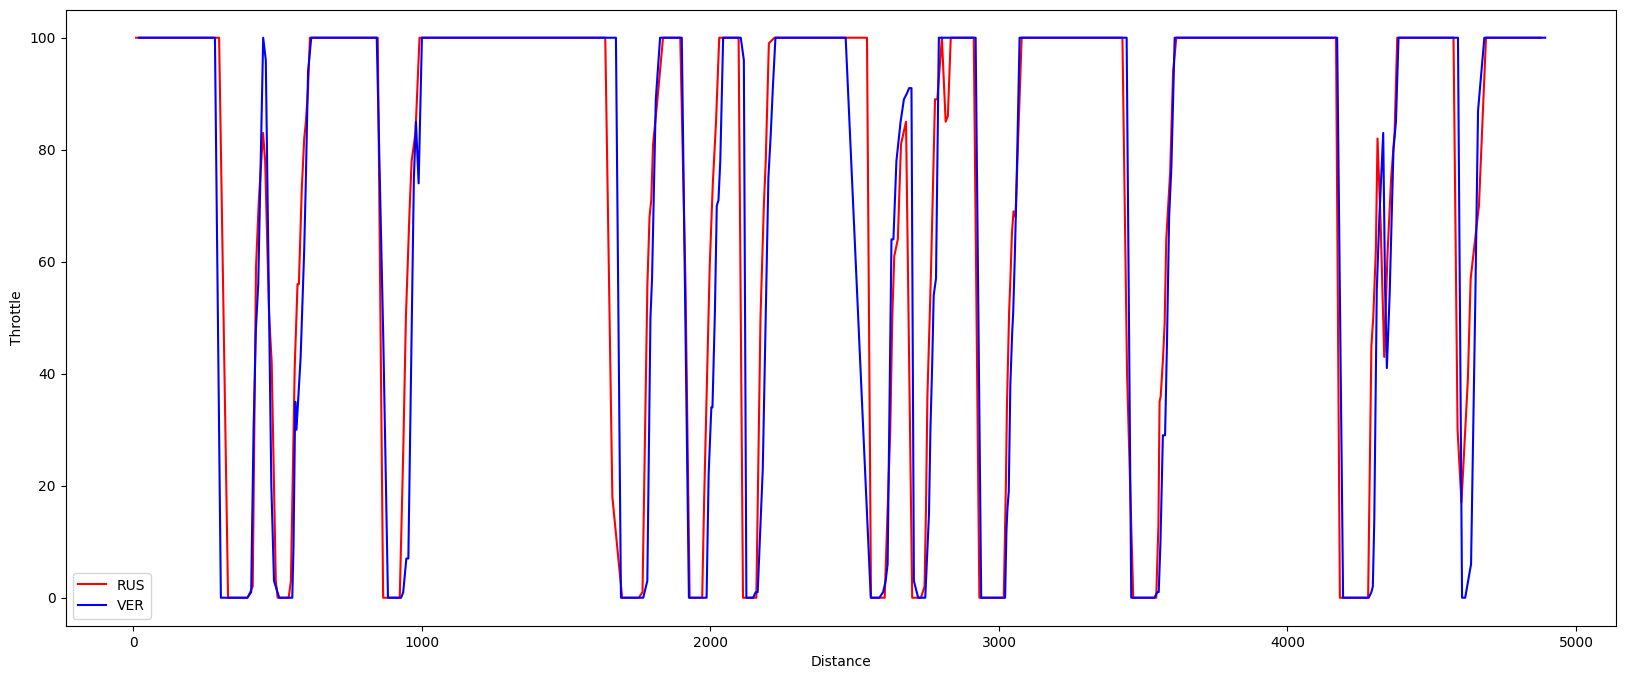

In [172]:
libraryDataF1.plot_telemetry("Distance","Throttle",dt,session)

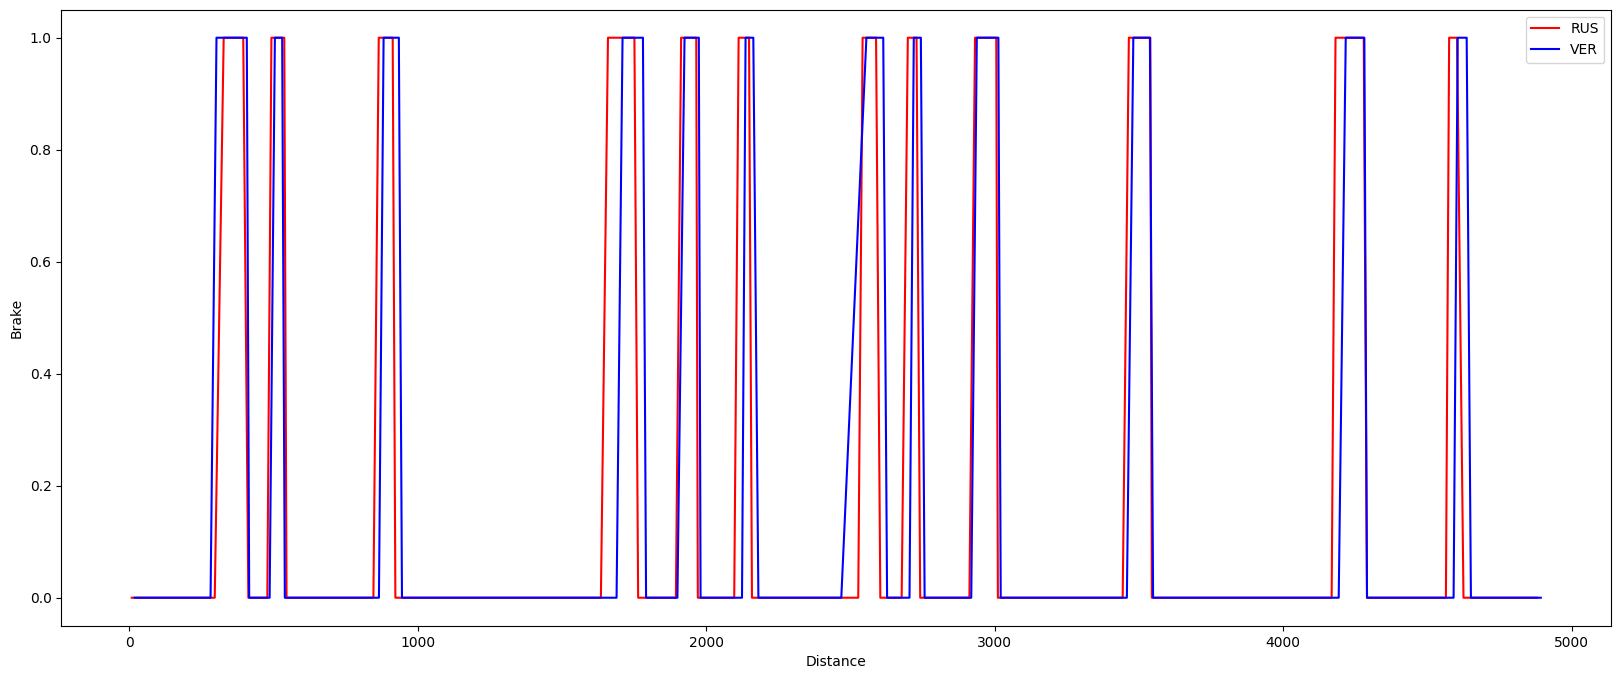

In [173]:
libraryDataF1.plot_telemetry("Distance","Brake",dt,session)

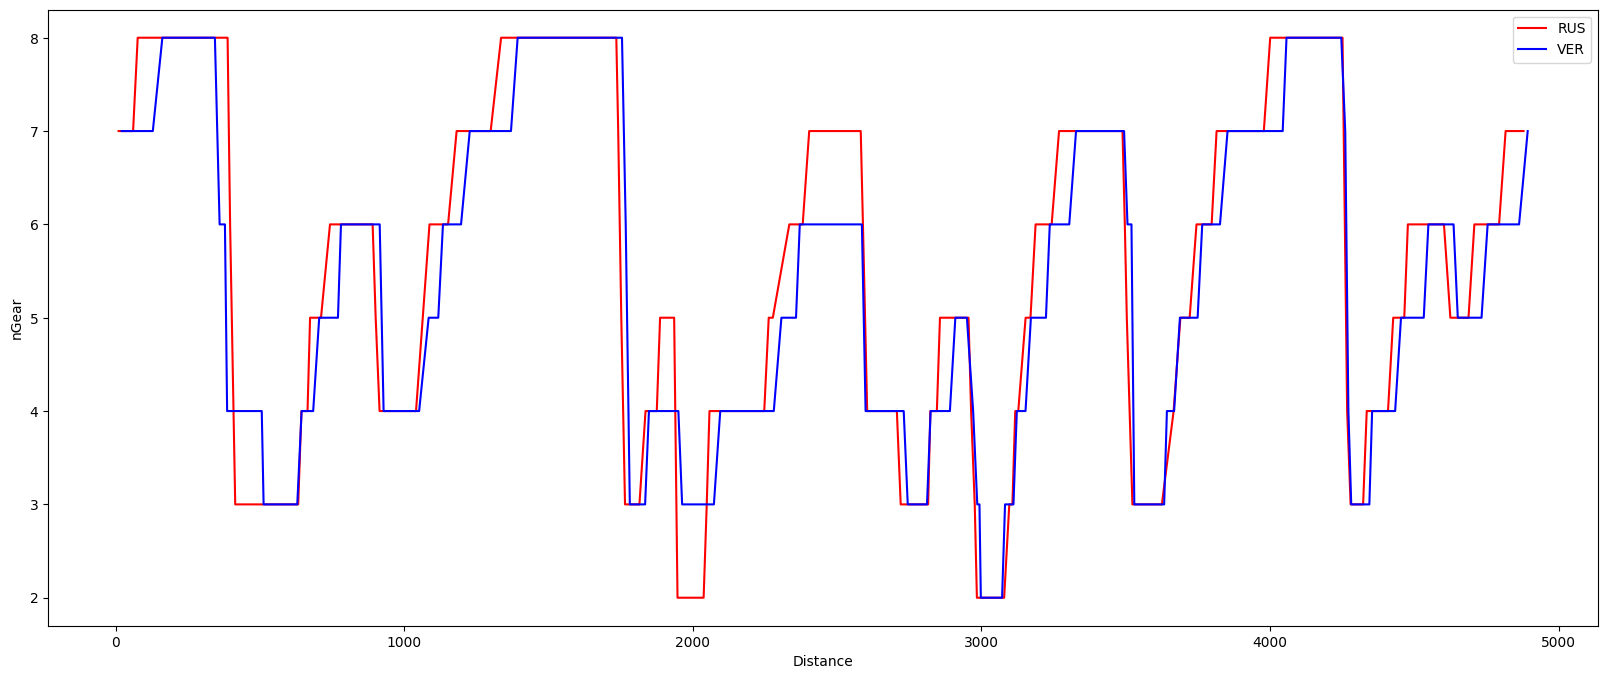

In [174]:
libraryDataF1.plot_telemetry("Distance","nGear",dt,session)

## Race
### Obtain setup

In [ ]:
race = libraryDataF1.obtain_information('laps',session_key=9606)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9606)
drivers = libraryDataF1.obtain_information('drivers',session_key=9606)
libraryDataF1.obtain_drivers_colours(drivers)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)

In [ ]:
raceLaps = race.query("is_pit_out_lap == False")
jointables = pd.merge(raceLaps,stintsDataFrame,on=['lap_number','driver_number'])

### Speed trap

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >96 and lap_duration <=100").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Race pace

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >96 and lap_duration <=100").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

#### Mean race pace per sector
In this section, we can see the pace shown per each team in each sector sorted ascending.

#### Sector 1

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >96 and lap_duration <=100").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

#### Sector 2

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >96 and lap_duration <=100").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

#### Sector 3

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False and lap_duration >96 and lap_duration <=100").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Long runs

In [ ]:
MINIMUN_SECONDS = 96
MAXIMUM_SECONDS = 100

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 55 or driver_number == 16')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 63 or driver_number == 44')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 81 or driver_number == 4')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 18 or driver_number == 14')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [ ]:
stintInformation.query('driver_number == 3 or driver_number == 22')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,3,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [ ]:
stintInformation.query('driver_number == 20 or driver_number == 27')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
data =libraryDataF1.getinfolongruns(jointables,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [ ]:
stintInformation.query('driver_number == 43 or driver_number == 23')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data= libraryDataF1.getinfolongruns(jointables,43,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

### Pits
Before to finish the analysis, I added the Pits sections where it can see how much time teams spent in the box.

In [ ]:
pit = libraryDataF1.obtain_information('pit',session_key=9606)

In [ ]:
jointables = pd.merge(drivers,pit,on=['driver_number']).query("pit_duration<120")
jointables
pit_duration = pd.DataFrame(jointables.groupby('team_name')['pit_duration'].mean().sort_values(ascending=True))
pit_duration